Análisis de la hoja: Acc_vel_loc_sinrangos 

EXPLORACION INICIAL
----------------

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Cargar el archivo Excel
df = pd.read_excel('data/Internet.xlsx')

# Exploración inicial
print("Primeras filas del dataset:")
display(df.head())





Primeras filas del dataset:


Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0

En las primeras filas del Dataset puedo observar que los datos  tienen errores aparentes, como por ejemplo que en la Provincia aparecen numeros y en el link Indec aparecen Localidades, lo que ya me deja en claro que voy a tener que renombrar esas columnas.

In [2]:
print("\nInformación del dataset:")
display(df.info())




Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


None

En este paso puedo detectar que los valores nulos son relativamente pocos.

In [3]:
print("\nEstadísticas descriptivas:")
display(df.describe())




Estadísticas descriptivas:


Provincia        Accesos
count  18864.000000   18857.000000
mean      66.866042     612.828499
std      178.987138    6283.359677
min        0.000000   -5582.000000
25%        3.000000       3.000000
50%       10.000000      26.000000
75%       30.000000     180.000000
max     1024.000000  576789.000000

En este paso no puedo hacer un analisis muy certero ya que es evidente que tengo que renombrar las columnas ya que la columna Provincias no deberia tener numeros

In [4]:
# Renombramos las columnas 
df.rename(columns={
    'Partido': 'Provincia',
    'Localidad': 'Partido',
    'link Indec': 'Localidad',
    'Velocidad (Mbps)': 'link Indec',
    'Provincia': 'Velocidad (Mbps)',
    'Accesos': 'Accesos'
}, inplace=True)  # inplace=True aplica los cambios directamente al DataFrame
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


Provincia     Partido   Localidad link Indec  Velocidad (Mbps)  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.50    145.0

In [5]:
print("\nEstadísticas descriptivas:")
display(df.describe())


Estadísticas descriptivas:


Velocidad (Mbps)        Accesos
count      18864.000000   18857.000000
mean          66.866042     612.828499
std          178.987138    6283.359677
min            0.000000   -5582.000000
25%            3.000000       3.000000
50%           10.000000      26.000000
75%           30.000000     180.000000
max         1024.000000  576789.000000

ANALISIS DE VALORES FALTANTES
----------------


Valores faltantes por columna:


Localidad    1
Accesos      7
dtype: int64

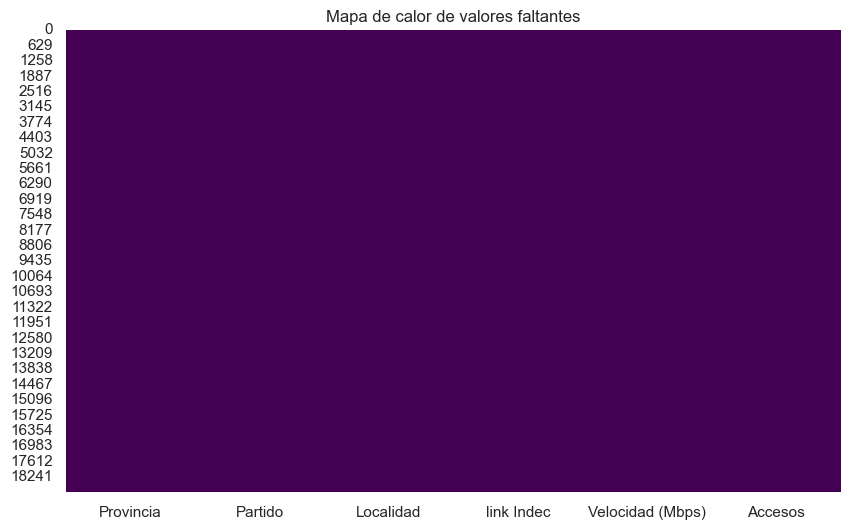

In [6]:
# Paso 2: Análisis de Valores Faltantes
print("\nValores faltantes por columna:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values)

# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

Los valores nulos son pocos , pero me gustaria visualizarlos para comprender su magnitud, asi que voy explorar otras formas de visualizar.


Valores faltantes por columna en las columnas específicas:


Localidad    1
Accesos      7
dtype: int64

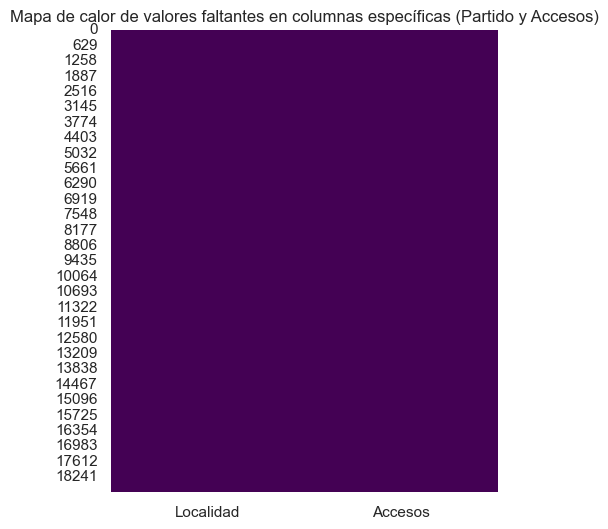

In [7]:
# Paso 2: Análisis de Valores Faltantes en columnas específicas
columnas_especificas = ['Localidad', 'Accesos']

print("\nValores faltantes por columna en las columnas específicas:")
missing_values = df[columnas_especificas].isnull().sum()
missing_values = missing_values[missing_values > 0]
display(missing_values)

# Visualización de valores nulos solo en las columnas específicas
plt.figure(figsize=(5, 6))  # Ajusta el tamaño para enfocarse en dos columnas
sns.heatmap(df[columnas_especificas].isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes en columnas específicas (Partido y Accesos)")
plt.show()


Aca intente visualizar solo las columnas en donde estan los faltantes , pero a verdad no cumplio mis expectativas el gráfico. Voy a seguir explorando.

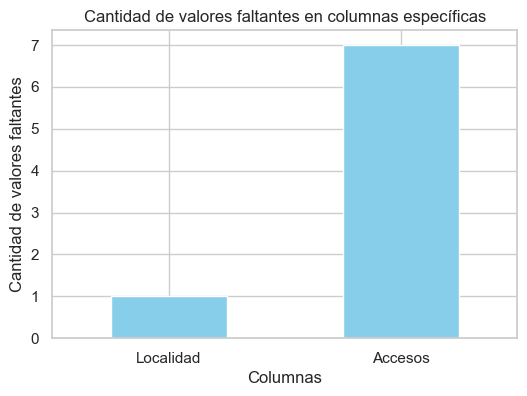

In [8]:
# Gráfico de barras para visualizar la cantidad de valores faltantes en cada columna específica
missing_values.plot(kind='bar', figsize=(6, 4), color='skyblue')
plt.title("Cantidad de valores faltantes en columnas específicas")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores faltantes")
plt.xticks(rotation=0)
plt.show()


En esta ocasion logro visualizar un poco mejor que hay mas archivos faltantes es acceso que en localidad, y que en las demas columnas aparentemente no hay valores faltantes. De momento esta cantidad de nulos no me parece llamativo ni que afecte mucho en la interpretacion de los datos. 

CONVERSION DE DATOS Y DETECCION DE OUTLIERS 
------------------------------------------

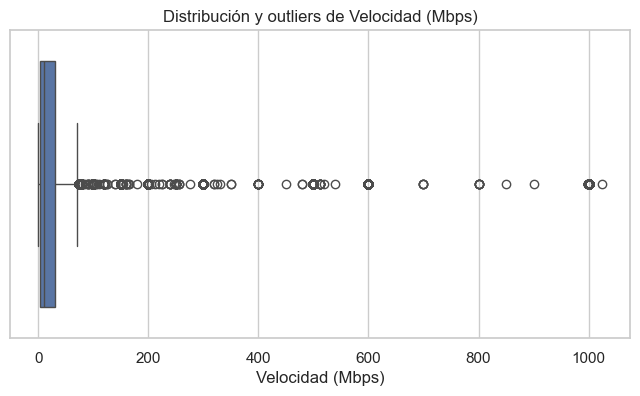

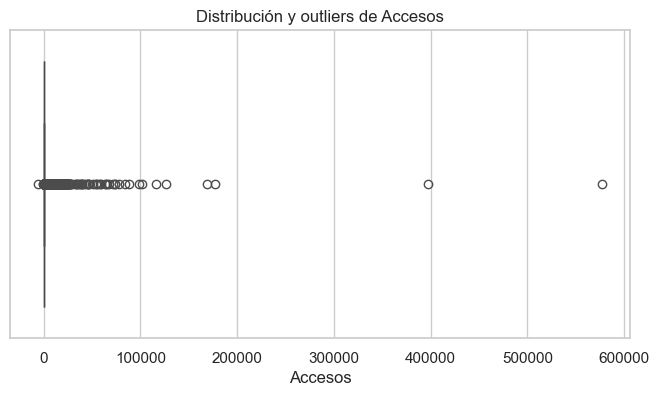

In [ ]:
# Paso 3: Detección y Análisis de Outliers
# Convertir "Velocidad (Mbps)" a numérico si es necesario

# Boxplot de variables numéricas
num_columns = ['Velocidad (Mbps)', 'Accesos']

for column in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Distribución y outliers de {column}')
    plt.show()


Distribucion y Outliers de Velocidad 
En este Grafico podemos ver que la mayoria de los datos se encuentran concentrados entre las velocidades mas bajas, lo que indica que la mayoria de los usuarios tienen servicios de velocidad baja, y una minoria(Outliers) los servicios de alta velocidad.
Distribucion y Outliers de Accesos 
La mayoría de los registros tienen un número de accesos bajo, lo que sugiere que en la mayoría de los partidos y provincias, el número de conexiones por ubicación es bajo. Esto podría representar áreas residenciales o pequeñas empresas donde el acceso a internet es básico.
Esto también podría estar relacionado con la infraestructura disponible en estas áreas, donde el número de conexiones es limitado debido a factores de demanda o disponibilidad tecnológica.

Outliers Significativos en "Accesos":

Los valores altos (outliers) que llegan hasta los 600,000 accesos podrían estar vinculados a localidades con alta densidad de población o a centros urbanos importantes dentro de las provincias. Estos puntos de acceso elevados pueden indicar áreas comerciales o industriales donde la demanda de conexiones es mayor.
También es posible que estos outliers representen infraestructuras que ofrecen servicios a gran escala, como centros de datos, universidades, o zonas con alta penetración de internet debido a una infraestructura avanzada, como la fibra óptica.

Posible Relación con "Velocidad (Mbps)":

Sería interesante explorar si hay una relación entre el número de accesos y la velocidad promedio en diferentes regiones. Podría ser que las áreas con más accesos también tiendan a tener velocidades más altas debido a la infraestructura de fibra óptica o a las demandas de usuarios de alto consumo, como empresas o servicios públicos.
Si hay una correlación entre los accesos altos y las velocidades mayores, esto podría reflejar una concentración de recursos tecnológicos en ciertas áreas.

Análisis de Disparidades Regionales:

La variabilidad en los accesos sugiere una posible desigualdad en la infraestructura de internet entre diferentes provincias y partidos. Algunas áreas pueden tener una infraestructura mucho más desarrollada, lo que les permite tener una mayor cantidad de conexiones, mientras que en otras zonas los accesos son limitados.
Esto puede reflejar una brecha digital donde ciertas regiones están mejor conectadas que otras, posiblemente debido a factores económicos, geográficos o de política pública

ANALISIS DE DISTRIBUCIONES DE VARIABLES
----------------------------

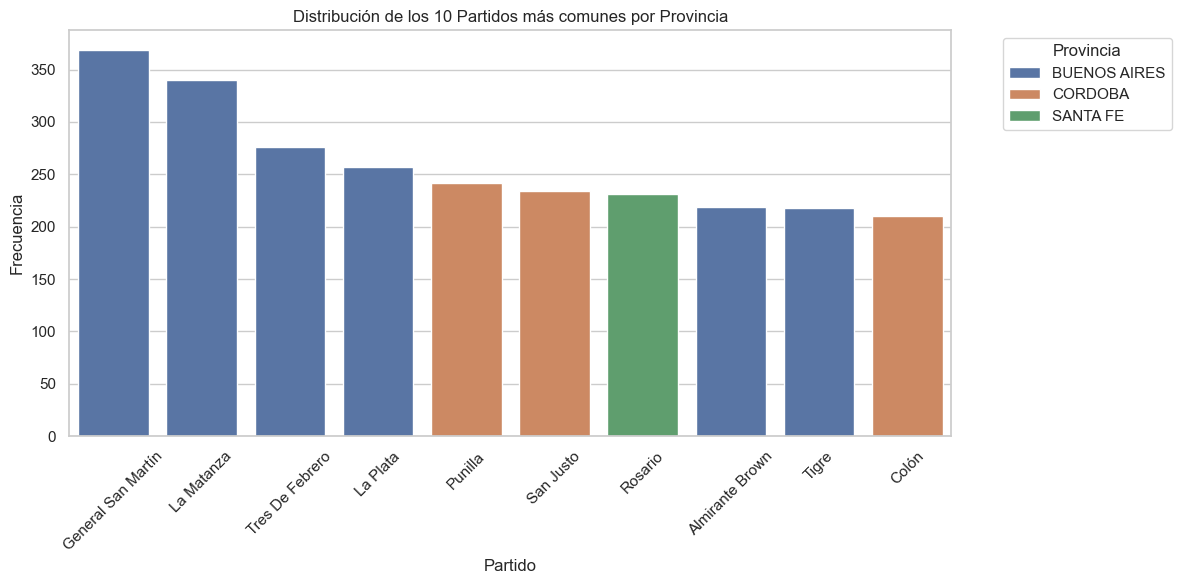

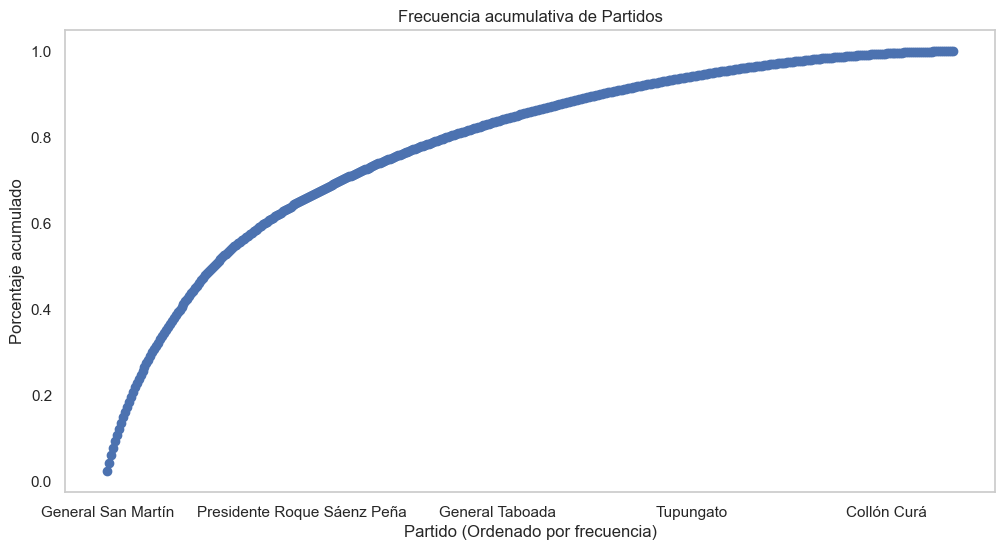

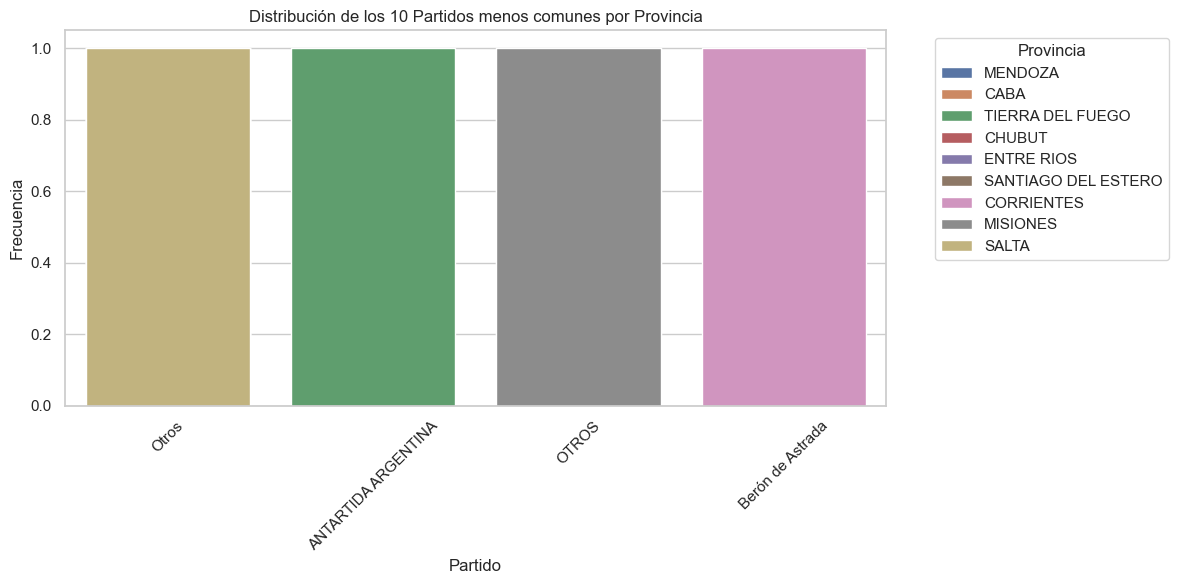

Los 10 partidos más comunes representan el 13.76% del total.


In [37]:
# Agrupar por 'Partido' y 'Provincia' y calcular la frecuencia
partidos_provincia = df.groupby(['Provincia', 'Partido']).size().reset_index(name='Frecuencia')

# Ordenar por frecuencia y seleccionar los más comunes
partidos_ordenados = partidos_provincia.sort_values(by='Frecuencia', ascending=False)

# 1. Distribución de Partidos (con Provincias)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=partidos_ordenados.head(10), 
    x='Partido', 
    y='Frecuencia', 
    hue='Provincia', 
    dodge=False
)
plt.title('Distribución de los 10 Partidos más comunes por Provincia')
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Frecuencia acumulativa de Partidos (sin Provincias para simplicidad)
partido_frecuencias = df['Partido'].value_counts()
partido_cumsum = partido_frecuencias.cumsum() / partido_frecuencias.sum()

plt.figure(figsize=(12, 6))
partido_cumsum.plot(kind='line', marker='o')
plt.title('Frecuencia acumulativa de Partidos')
plt.xlabel('Partido (Ordenado por frecuencia)')
plt.ylabel('Porcentaje acumulado')
plt.grid()
plt.show()

# 3. Los 10 partidos menos frecuentes (con Provincias)
partidos_menos_comunes = partidos_ordenados.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=partidos_menos_comunes, 
    x='Partido', 
    y='Frecuencia', 
    hue='Provincia', 
    dodge=False
)
plt.title('Distribución de los 10 Partidos menos comunes por Provincia')
plt.xlabel('Partido')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Frecuencia de los 50 partidos más comunes con Plotly
top50 = partidos_ordenados.head(50)
fig = px.bar(
    top50, 
    x='Partido', 
    y='Frecuencia', 
    color='Provincia', 
    title='Frecuencia de los 50 partidos más comunes por Provincia'
)
fig.show()

# Calcular porcentaje que representan los 10 partidos más comunes
top10_percentage = partidos_ordenados.head(10)['Frecuencia'].sum() / partidos_ordenados['Frecuencia'].sum() * 100
print(f"Los 10 partidos más comunes representan el {top10_percentage:.2f}% del total.")

ANALISIS 
-------
GRAFICO 1 :
Buenos Aires domina el gráfico con partidos como General San Martín, La Matanza y Tres de Febrero. Esto indica una mayor densidad de datos en esta provincia.
Córdoba y Santa Fe también están representadas con partidos como Punilla y Rosario, respectivamente.
La presencia de otras provincias indica que el dataset incluye variedad geográfica, aunque Buenos Aires es claramente dominante.

GRAFICO 2:

La distribución de los datos está sesgada hacia un grupo pequeño de partidos con alta frecuencia. Esto puede implicar que las conclusiones generales del análisis podrían estar influenciadas principalmente por estos partidos más frecuentes

GRAFICO 3:

 Los partidos menos comunes son más dispersos geográficamente, estan en Tierra del Fuego, Corrientes, Misiones.

 Se confirma nuevamente que Buenos Aires es la provincia predominante, pero también se nota la contribución de otras provincias como Córdoba, Santa Fe, Rio Negro, Salta y Neuquén.


 A nivel General vemos que los partidos con mas peso en frecuencia  son General San Martin, La Matanza, Tres de Febrero, La Plata (Buenos Aires), Punilla, San Justo, Colón (Córdoba), y Rosario (Santa Fe). 
 y los que menos frecuencia tienen se encuentran en Antartida Argentina (Tierra del Fuego) y Betron de Astrada (Corrientes)

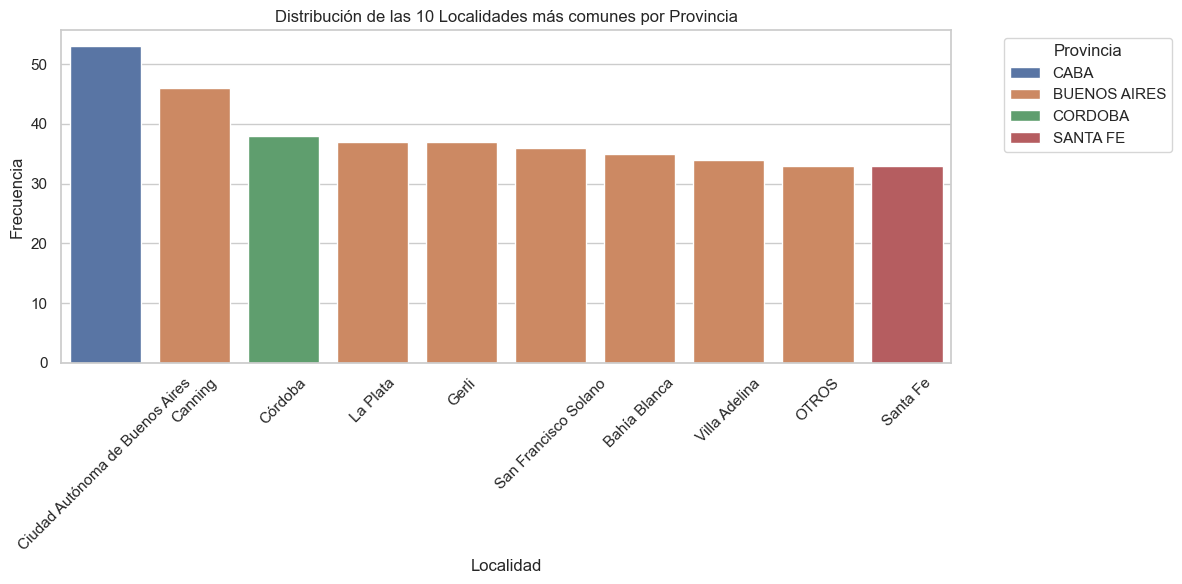

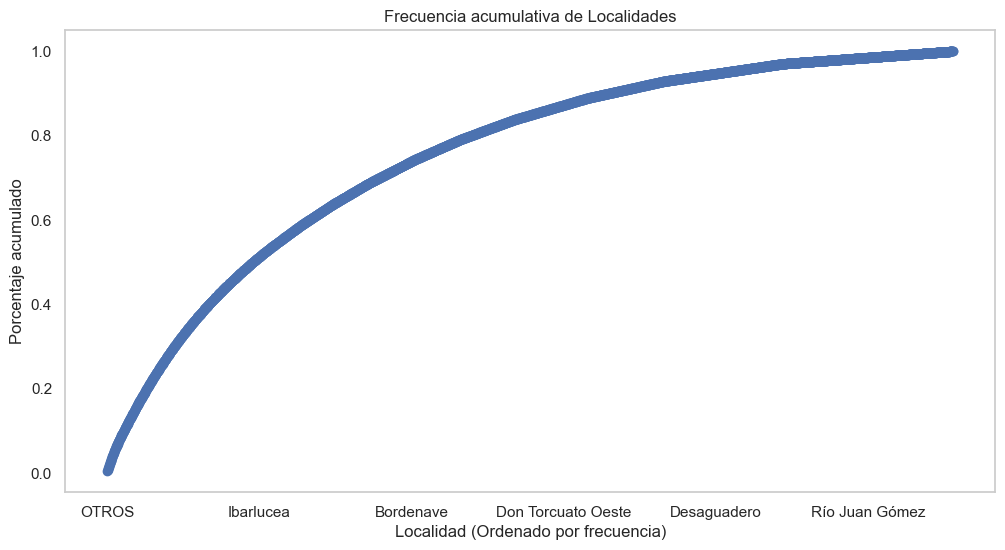

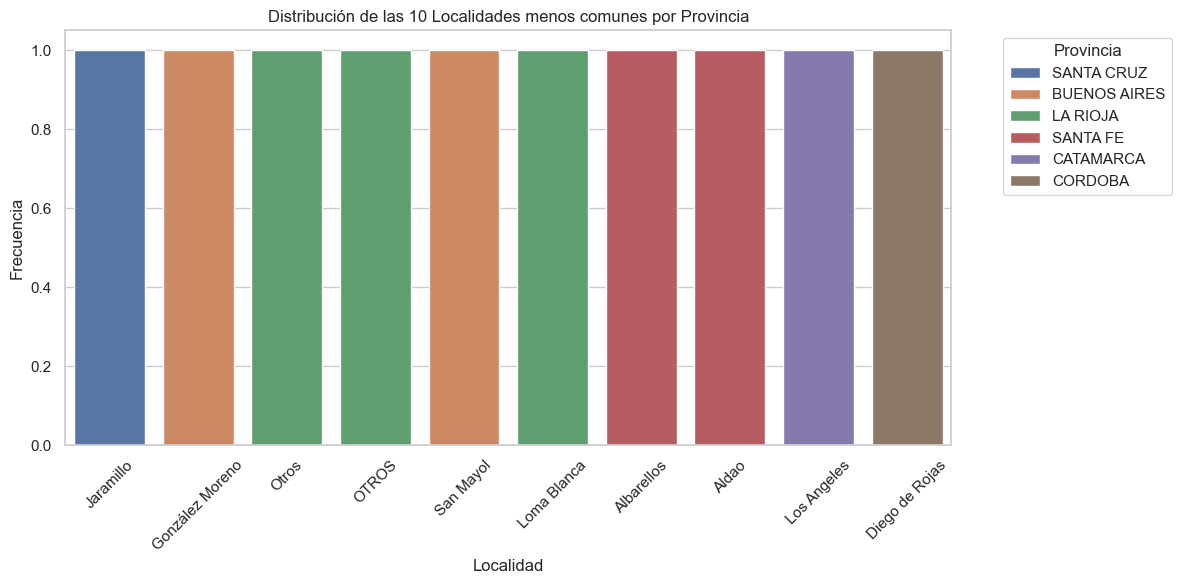

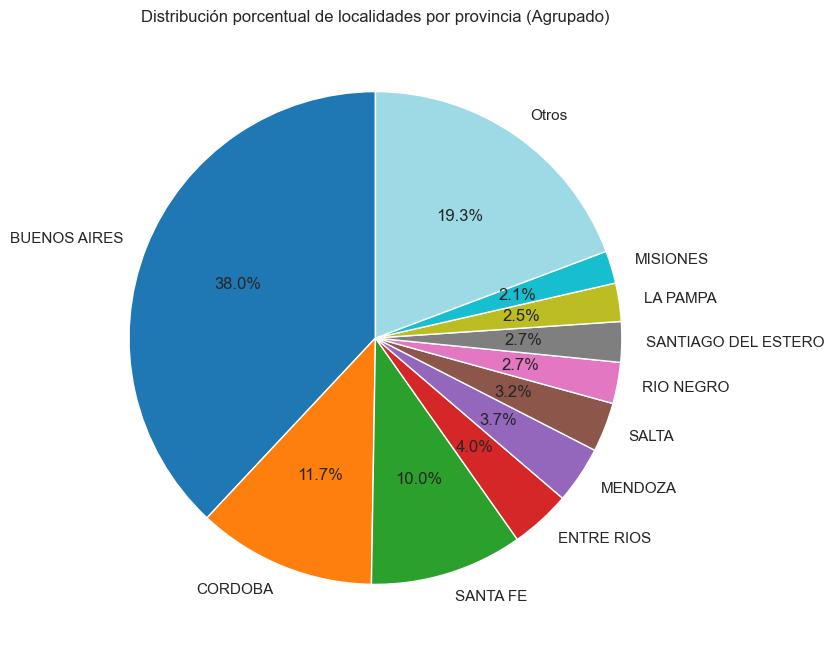

Las 10 localidades más comunes representan el 2.03% del total.


In [40]:
# Agrupar por 'Provincia' y 'Localidad' y calcular la frecuencia
localidades_provincia = df.groupby(['Provincia', 'Localidad']).size().reset_index(name='Frecuencia')

# Ordenar por frecuencia y seleccionar las localidades más comunes
localidades_ordenadas = localidades_provincia.sort_values(by='Frecuencia', ascending=False)

# 1. Distribución de las 10 Localidades más comunes por Provincia
plt.figure(figsize=(12, 6))
sns.barplot(
    data=localidades_ordenadas.head(10),
    x='Localidad',
    y='Frecuencia',
    hue='Provincia',
    dodge=False
)
plt.title('Distribución de las 10 Localidades más comunes por Provincia')
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Frecuencia acumulativa de Localidades
localidad_frecuencias = df['Localidad'].value_counts()
localidad_cumsum = localidad_frecuencias.cumsum() / localidad_frecuencias.sum()

plt.figure(figsize=(12, 6))
localidad_cumsum.plot(kind='line', marker='o')
plt.title('Frecuencia acumulativa de Localidades')
plt.xlabel('Localidad (Ordenado por frecuencia)')
plt.ylabel('Porcentaje acumulado')
plt.grid()
plt.show()

# 3. Las 10 Localidades menos comunes por Provincia
localidades_menos_comunes = localidades_ordenadas.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=localidades_menos_comunes,
    x='Localidad',
    y='Frecuencia',
    hue='Provincia',
    dodge=False
)
plt.title('Distribución de las 10 Localidades menos comunes por Provincia')
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Frecuencia de las 50 localidades más comunes con Plotly
top50_localidades = localidades_ordenadas.head(50)
fig = px.bar(
    top50_localidades,
    x='Localidad',
    y='Frecuencia',
    color='Provincia',
    title='Frecuencia de las 50 Localidades más comunes por Provincia'
)
fig.show()


# Agrupar las provincias menos representativas como "Otros"
top_provincias = provincia_frecuencias.head(10)  # Seleccionar las 10 más representativas
otros = provincia_frecuencias.iloc[10:].sum()  # Sumar las frecuencias de las demás
top_provincias['Otros'] = otros

# Redibujar el gráfico
plt.figure(figsize=(8, 8))
top_provincias.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Distribución porcentual de localidades por provincia (Agrupado)')
plt.ylabel('')
plt.show()



# Calcular el porcentaje que representan las 10 localidades más comunes
top10_localidades_percentage = localidades_ordenadas.head(10)['Frecuencia'].sum() / localidades_ordenadas['Frecuencia'].sum() * 100
print(f"Las 10 localidades más comunes representan el {top10_localidades_percentage:.2f}% del total.")


ANALISIS
-------------
Nuevamente en Localidades podemos ver que la mayor frecuencia de datos se encuentran en Buenos Aires 

1 lugar: Buenos Aires  con las localidades de:
            CABA    
            Canning
            La Plata 
            Gerli 
            San Francisco Solano 
            Bahia Blanca 

2 lugar Cordoba con la localidad de:
        Córdoba 

3 lugar Santa fe con la localidad de:
        Santa Fe


 a lo largo del analisis se repiten los mismos datos, a nivel general, tomando  poco protagonismo las demas provincias.
        

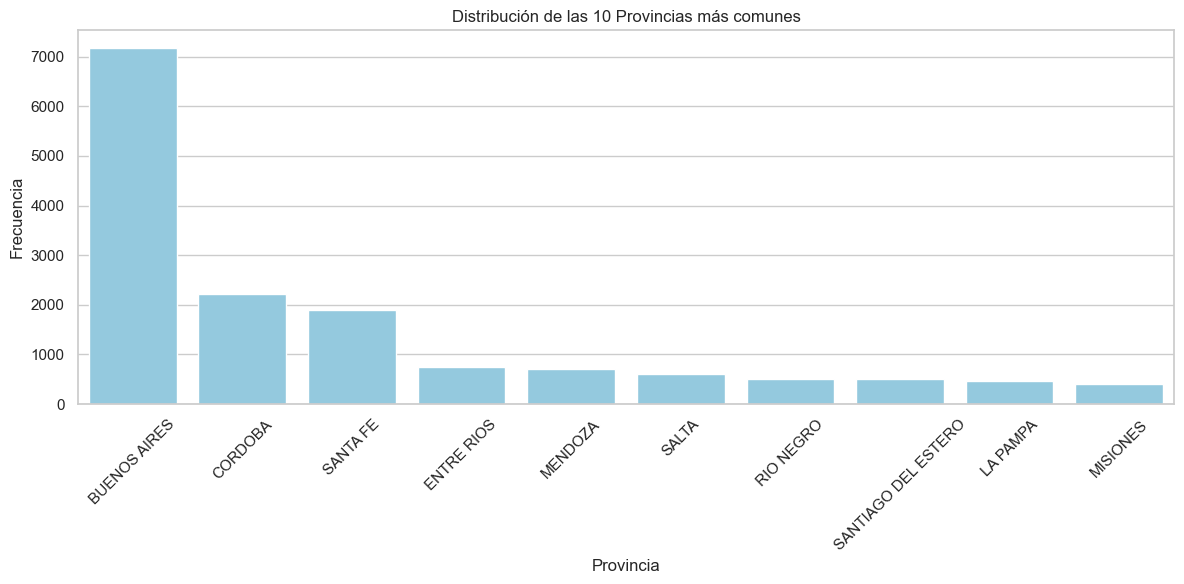

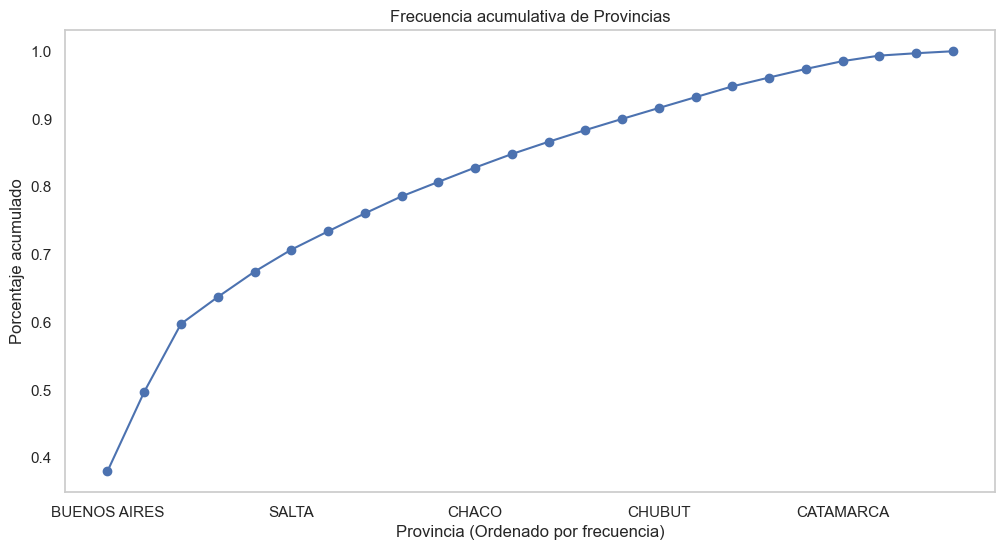

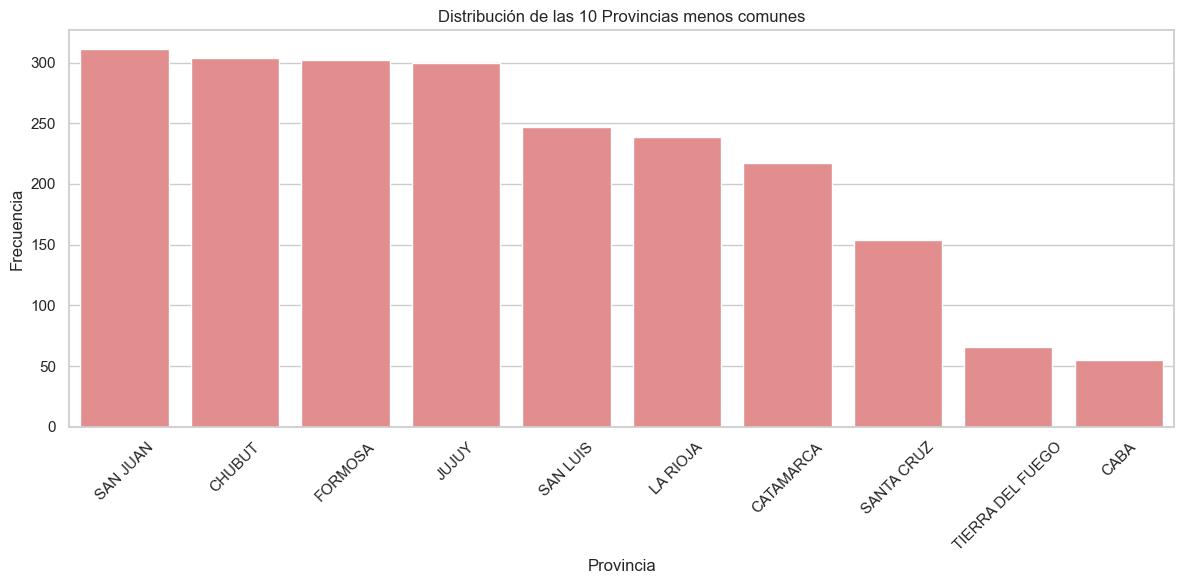

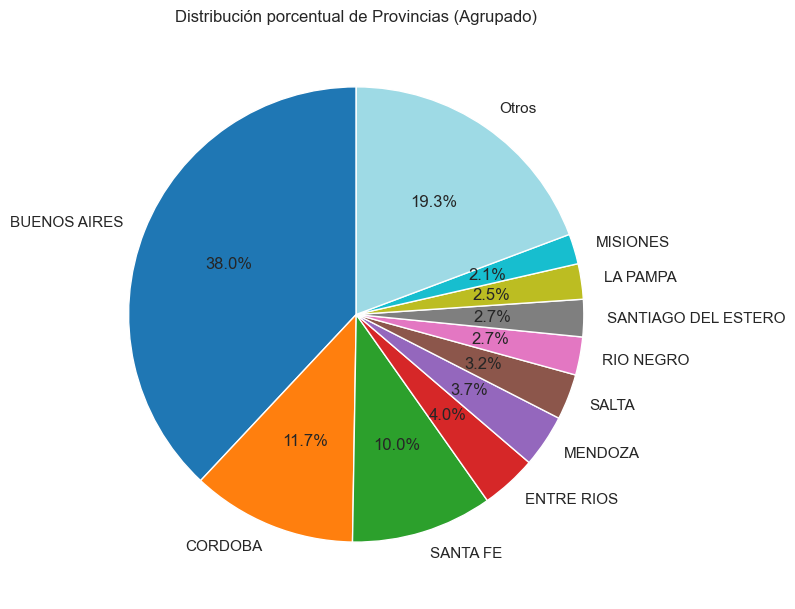

Las 10 provincias más comunes representan el 80.72% del total.


In [44]:
# Agrupar por 'Provincia' y calcular la frecuencia
provincias_frecuencia = df.groupby('Provincia').size().reset_index(name='Frecuencia')

# Ordenar por frecuencia
provincias_ordenadas = provincias_frecuencia.sort_values(by='Frecuencia', ascending=False)

# 1. Distribución de las 10 Provincias más comunes
plt.figure(figsize=(12, 6))
sns.barplot(
    data=provincias_ordenadas.head(10),
    x='Provincia',
    y='Frecuencia',
    color='skyblue'
)
plt.title('Distribución de las 10 Provincias más comunes')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Frecuencia acumulativa de Provincias
provincia_frecuencias = df['Provincia'].value_counts()
provincia_cumsum = provincia_frecuencias.cumsum() / provincia_frecuencias.sum()

plt.figure(figsize=(12, 6))
provincia_cumsum.plot(kind='line', marker='o')
plt.title('Frecuencia acumulativa de Provincias')
plt.xlabel('Provincia (Ordenado por frecuencia)')
plt.ylabel('Porcentaje acumulado')
plt.grid()
plt.show()

# 3. Las 10 Provincias menos comunes
provincias_menos_comunes = provincias_ordenadas.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=provincias_menos_comunes,
    x='Provincia',
    y='Frecuencia',
    color='lightcoral'
)
plt.title('Distribución de las 10 Provincias menos comunes')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Frecuencia de las 50 Provincias más comunes con Plotly
fig = px.bar(
    provincias_ordenadas.head(50),
    x='Provincia',
    y='Frecuencia',
    title='Frecuencia de las 50 Provincias más comunes',
    color='Frecuencia',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()

# 5. Agrupar las provincias menos representativas como "Otros"
top_provincias = provincia_frecuencias.head(10)  # Seleccionar las 10 provincias más representativas
otros = provincia_frecuencias.iloc[10:].sum()  # Sumar las frecuencias de las demás
top_provincias = pd.concat([top_provincias, pd.Series({'Otros': otros})])  # Agregar "Otros"

# Redibujar el gráfico de torta
plt.figure(figsize=(8, 8))
top_provincias.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Distribución porcentual de Provincias (Agrupado)')
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.tight_layout()
plt.show()


# 6. Calcular el porcentaje que representan las 10 Provincias más comunes
top10_provincias_percentage = provincias_ordenadas.head(10)['Frecuencia'].sum() / provincias_ordenadas['Frecuencia'].sum() * 100
print(f"Las 10 provincias más comunes representan el {top10_provincias_percentage:.2f}% del total.")



1. Distribución de las 10 Provincias más comunes
En este gráfico de barras, podemos observar que Buenos Aires es la provincia con mayor representación en los datos, alcanzando más de 7000 registros, seguida por Córdoba y Santa Fe, aunque con una frecuencia mucho menor. Esto muestra que la mayoría de los datos se concentran en estas tres provincias, con Buenos Aires destacándose significativamente.

Conclusión: Existe una fuerte concentración de datos en Buenos Aires, lo cual puede influir en cualquier análisis posterior, ya que esta provincia domina en términos de representatividad.


2. Frecuencia acumulativa de Provincias
Este gráfico de líneas nos muestra cómo se acumula la representación de las provincias en los datos. Vemos que un pequeño número de provincias (como Buenos Aires, Córdoba y Santa Fe) acumulan rápidamente un alto porcentaje de los registros, mientras que el resto contribuyen marginalmente.

Conclusión: Las primeras provincias en el gráfico representan una gran proporción del total, lo que sugiere una alta concentración en pocas provincias. Esto podría indicar desigualdades en la distribución de los datos.


Aquí tienes el análisis detallado de los gráficos relacionados con las provincias:

1. Distribución de las 10 Provincias más comunes
En este gráfico de barras, podemos observar que Buenos Aires es la provincia con mayor representación en los datos, alcanzando más de 7000 registros, seguida por Córdoba y Santa Fe, aunque con una frecuencia mucho menor. Esto muestra que la mayoría de los datos se concentran en estas tres provincias, con Buenos Aires destacándose significativamente.

Conclusión: Existe una fuerte concentración de datos en Buenos Aires, lo cual puede influir en cualquier análisis posterior, ya que esta provincia domina en términos de representatividad.

2. Frecuencia acumulativa de Provincias
Este gráfico de líneas nos muestra cómo se acumula la representación de las provincias en los datos. Vemos que un pequeño número de provincias (como Buenos Aires, Córdoba y Santa Fe) acumulan rápidamente un alto porcentaje de los registros, mientras que el resto contribuyen marginalmente.

Conclusión: Las primeras provincias en el gráfico representan una gran proporción del total, lo que sugiere una alta concentración en pocas provincias. Esto podría indicar desigualdades en la distribución de los datos.

3. Distribución de las 10 Provincias menos comunes
Este gráfico de barras muestra que las provincias con menor representación incluyen CABA, Tierra del Fuego y Santa Cruz, cada una con menos de 100 registros. Estas provincias tienen una participación significativamente baja en comparación con las principales.

Conclusión: Es importante tener en cuenta esta baja representación, ya que podría sesgar cualquier análisis en el que se busque igualdad o balance entre provincias.

4. Frecuencia de las 50 Provincias más comunes
Este gráfico, generado con Plotly, muestra la frecuencia de las 50 provincias más comunes. Nuevamente, Buenos Aires es la provincia dominante, seguida por un descenso notable en la representación de las demás provincias.

Conclusión: Este gráfico refuerza el dominio de Buenos Aires, mientras que las demás provincias muestran una distribución más uniforme entre ellas.


Aquí tienes el análisis detallado de los gráficos relacionados con las provincias:

1. Distribución de las 10 Provincias más comunes
En este gráfico de barras, podemos observar que Buenos Aires es la provincia con mayor representación en los datos, alcanzando más de 7000 registros, seguida por Córdoba y Santa Fe, aunque con una frecuencia mucho menor. Esto muestra que la mayoría de los datos se concentran en estas tres provincias, con Buenos Aires destacándose significativamente.

Conclusión: Existe una fuerte concentración de datos en Buenos Aires, lo cual puede influir en cualquier análisis posterior, ya que esta provincia domina en términos de representatividad.

2. Frecuencia acumulativa de Provincias
Este gráfico de líneas nos muestra cómo se acumula la representación de las provincias en los datos. Vemos que un pequeño número de provincias (como Buenos Aires, Córdoba y Santa Fe) acumulan rápidamente un alto porcentaje de los registros, mientras que el resto contribuyen marginalmente.

Conclusión: Las primeras provincias en el gráfico representan una gran proporción del total, lo que sugiere una alta concentración en pocas provincias. Esto podría indicar desigualdades en la distribución de los datos.

3. Distribución de las 10 Provincias menos comunes
Este gráfico de barras muestra que las provincias con menor representación incluyen CABA, Tierra del Fuego y Santa Cruz, cada una con menos de 100 registros. Estas provincias tienen una participación significativamente baja en comparación con las principales.

Conclusión: Es importante tener en cuenta esta baja representación, ya que podría sesgar cualquier análisis en el que se busque igualdad o balance entre provincias.

4. Frecuencia de las 50 Provincias más comunes
Este gráfico, muestra la frecuencia de las 50 provincias más comunes. Nuevamente, Buenos Aires es la provincia dominante, seguida por un descenso notable en la representación de las demás provincias.

Conclusión: Este gráfico refuerza el dominio de Buenos Aires, mientras que las demás provincias muestran una distribución más uniforme entre ellas.

5. Distribución porcentual de Provincias (Agrupado)
El gráfico de torta presenta una perspectiva porcentual, agrupando a las provincias menos representadas bajo la categoría de "Otros". Buenos Aires representa el 38% de los datos, seguida por Córdoba (11.7%) y Santa Fe (10%). El grupo de "Otros" representa un 19.3%, lo que sugiere que muchas provincias tienen una representación marginal.

Conclusión: Este gráfico destaca visualmente el dominio de unas pocas provincias en los datos. Agrupar las provincias menos representativas como "Otros" permite simplificar la interpretación.

 Consideraciones:

Destacar sesgos en la distribución: Buenos Aires domina en todos los gráficos, lo que puede afectar la representatividad en un análisis nacional.
Realizar análisis separados para las provincias menos representadas: Esto podría evitar que se diluyan patrones importantes en provincias con pocos registros.
Considerar normalizar los datos: Para mitigar el efecto del dominio de Buenos Aires y lograr un análisis más equilibrado entre provincias.


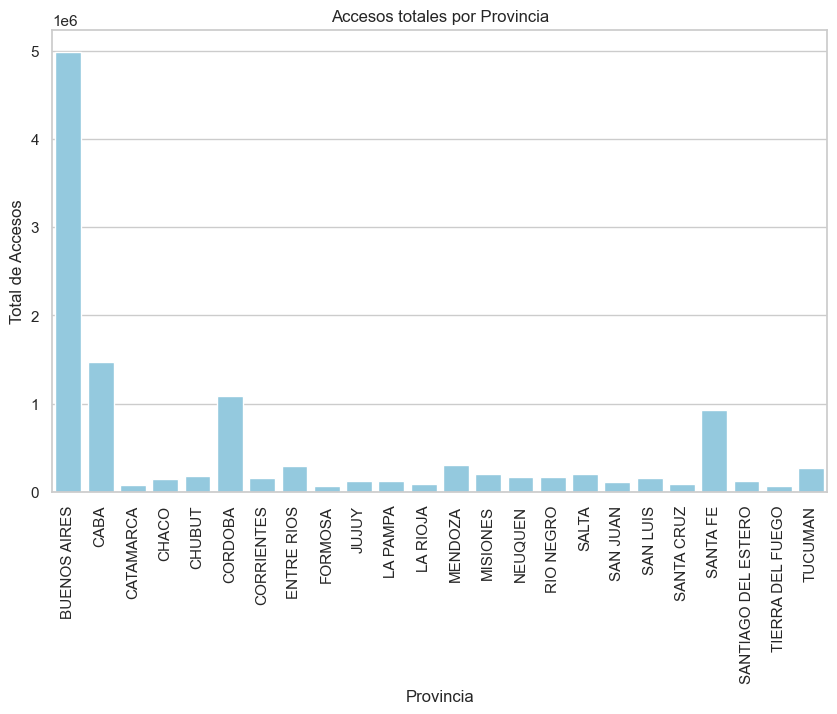

In [48]:

# Sumar accesos por Provincia
accesos_por_provincia = df.groupby('Provincia')['Accesos'].sum().reset_index()

# Crear el gráfico de barras para visualizar los accesos por Provincia
plt.figure(figsize=(10, 6))
sns.barplot(data=accesos_por_provincia, x='Provincia', y='Accesos', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Provincia")
plt.ylabel("Total de Accesos")
plt.title("Accesos totales por Provincia")
plt.show()


import pandas as pd
import plotly.express as px

# Crear un DataFrame con coordenadas corregidas de cada capital de provincia
coordenadas_provincias = pd.DataFrame({
    'Provincia': ['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA', 
                  'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA', 'LA RIOJA',
                  'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA', 'SAN JUAN',
                  'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO', 
                  'TIERRA DEL FUEGO', 'TUCUMAN'],
    'Latitud': [-34.61315, -34.607568, -28.46958, -27.46056, -43.29833, -31.41667,
                -27.4806, -32.4825, -26.17753, -24.18578, -36.61667, -29.41306,
                -32.89084, -27.36243, -38.95161, -39.03, -24.78212, -31.5375,
                -33.29501, -51.62261, -31.63306, -27.78241, -54.80191, -26.82414],
    'Longitud': [-58.37723, -58.437089, -65.77954, -58.99028, -65.10228, -64.18333,
                 -58.8341, -60.17639, -58.17814, -65.29712, -64.28333, -66.85578,
                 -68.84584, -55.89608, -68.0591, -67.5833, -65.42323, -68.53836,
                 -66.33601, -69.21813, -60.70001, -64.26612, -68.30295, -65.2226]
})

# Unir los datos de accesos con las coordenadas de cada provincia
accesos_por_provincia = df.groupby('Provincia')['Accesos'].sum().reset_index()
map_data = pd.merge(accesos_por_provincia, coordenadas_provincias, on='Provincia')

# Crear el mapa de burbujas mejorado
fig = px.scatter_mapbox(
    map_data,
    lat="Latitud",
    lon="Longitud",
    size="Accesos",
    color="Accesos",
    hover_name="Provincia",
    color_continuous_scale=px.colors.diverging.Spectral,  # Escala de colores más amigable
    size_max=50,
    zoom=4,  # Ajustar zoom para una mejor vista general
    mapbox_style="open-street-map",  # Cambiar estilo del mapa
    title="Distribución de Accesos por Provincia en Argentina"
)

# Mostrar el mapa
fig.show()



Análisis del Gráfico de Accesos Totales por Provincia
Diferencias Notables en la Cantidad de Accesos:

Buenos Aires destaca claramente con la mayor cantidad de accesos, superando por un amplio margen a las demás provincias. Esto es comprensible, ya que Buenos Aires es la provincia con mayor población y densidad urbana, lo que incrementa la demanda de conexiones a internet.
CABA (Ciudad Autónoma de Buenos Aires) y Córdoba también presentan un número significativo de accesos, aunque mucho menor en comparación con la provincia de Buenos Aires. Estas áreas son importantes centros urbanos y económicos, con una gran cantidad de usuarios residenciales y comerciales.
Provincias con Accesos Moderados:

Otras provincias como Santa Fe y Mendoza muestran cantidades de accesos moderadas. Estas provincias tienen ciudades importantes (como Rosario y Mendoza capital) que contribuyen a su demanda de conectividad.
Este nivel de accesos puede reflejar una mezcla de áreas urbanas y rurales, donde la demanda es alta en las ciudades principales, pero más baja en las zonas rurales.
Provincias con Bajos Niveles de Acceso:

La mayoría de las otras provincias, especialmente aquellas con menor población o en zonas más alejadas (como La Rioja, Catamarca, Formosa, y Tierra del Fuego), muestran cantidades de accesos significativamente menores.
Esto podría estar indicando una menor demanda de internet o una infraestructura menos desarrollada, lo cual es común en áreas con menor densidad de población o en regiones geográficamente aisladas.
Desigualdad en el Acceso a Internet:

El gráfico evidencia una posible brecha digital entre las provincias más urbanizadas y densamente pobladas y las regiones menos pobladas. Provincias como Buenos Aires y CABA tienen una infraestructura de telecomunicaciones avanzada, mientras que otras provincias más pequeñas pueden tener limitaciones en cuanto a la cobertura y la velocidad de internet.
Esto puede tener implicaciones importantes en términos de acceso a la información, oportunidades económicas y desarrollo en general, ya que las provincias con menos accesos pueden enfrentar desafíos para beneficiarse de los servicios digitales.
Posibles Causas y Factores
Densidad Poblacional: La cantidad de accesos a internet tiende a ser mayor en las provincias con mayor densidad de población, donde hay más hogares y empresas con necesidad de conectividad.
Infraestructura de Telecomunicaciones: Las provincias con altos niveles de accesos probablemente tienen una mejor infraestructura de telecomunicaciones, permitiendo mayores niveles de conectividad. Las zonas menos desarrolladas o rurales suelen tener menos acceso a tecnologías avanzadas como la fibra óptica.
Factores Económicos: Las áreas con mayor actividad económica tienden a tener una mayor demanda de internet, tanto a nivel residencial como comercial. Esto se observa en los centros urbanos y provincias económicamente activas.
Conclusión
Este gráfico muestra claramente la desigualdad en la distribución de accesos a internet en las provincias argentinas, con una concentración muy alta en Buenos Aires y CABA, mientras que las provincias más pequeñas o rurales tienen menos accesos. Este tipo de análisis es útil para identificar áreas con alta demanda de conectividad y aquellas que podrían beneficiarse de una inversión en infraestructura de telecomunicaciones para mejorar la igualdad de acceso a internet en todo el país.

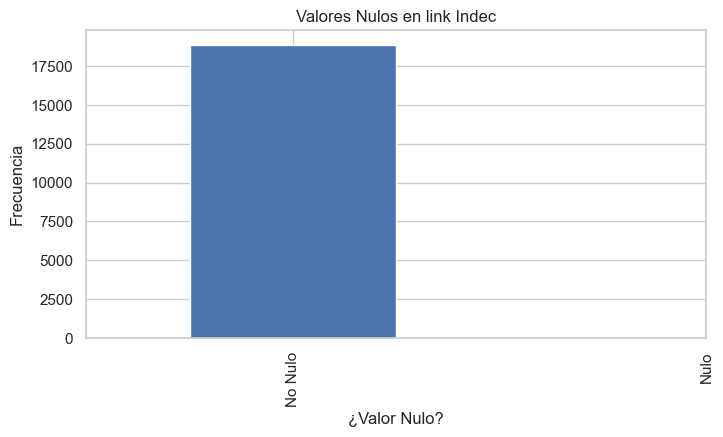

In [50]:
# 3. Análisis de 'link Indec' (Texto - Valores Nulos)
plt.figure(figsize=(8, 4))
df['link Indec'].isnull().value_counts().plot(kind='bar')
plt.title('Valores Nulos en link Indec')
plt.xlabel('¿Valor Nulo?')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Nulo', 'Nulo'])
plt.show()






variable
VELOCIDAD
----------

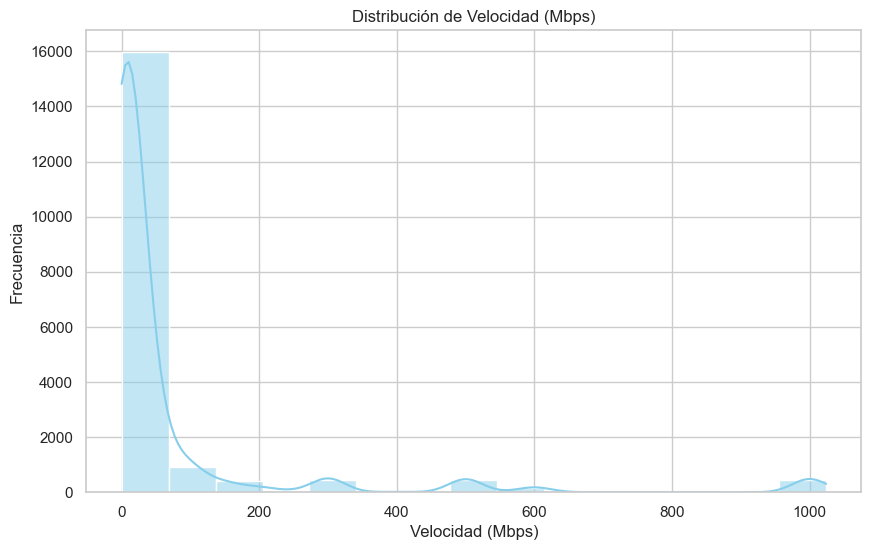

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Velocidad (Mbps)'], kde=True, bins=15, color='skyblue')
plt.title('Distribución de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las velocidades se concentran en valores bajos (menores a 50 Mbps).
La distribución tiene una cola larga hacia la derecha, indicando la presencia de valores extremos (altas velocidades) que son poco comunes.
Este gráfico evidencia una distribución sesgada hacia la izquierda.

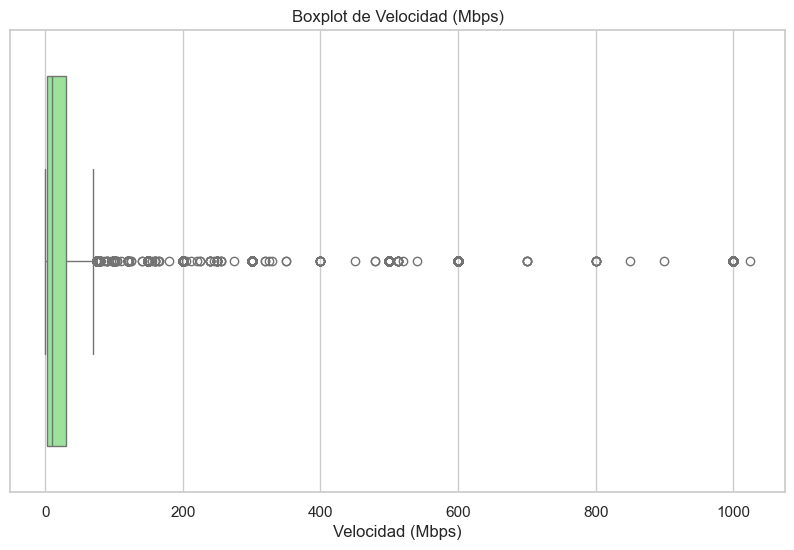

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Velocidad (Mbps)'], color='lightgreen')
plt.title('Boxplot de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.show()



Hay una gran cantidad de valores atípicos a la derecha, lo que sugiere la presencia de velocidades mucho mayores a las comunes.
Este gráfico es útil para confirmar la asimetría observada en el histograma.

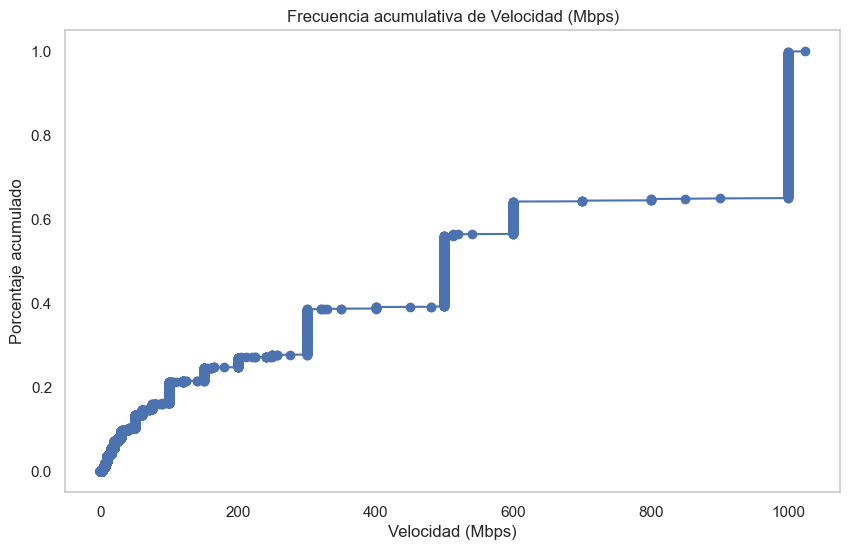

In [53]:
velocidad_sorted = df['Velocidad (Mbps)'].sort_values()
velocidad_cumsum = velocidad_sorted.cumsum() / velocidad_sorted.sum()

plt.figure(figsize=(10, 6))
plt.plot(velocidad_sorted, velocidad_cumsum, marker='o')
plt.title('Frecuencia acumulativa de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Porcentaje acumulado')
plt.grid()
plt.show()



3. Frecuencia acumulativa (Gráfico 3):
Descripción: Gráfico de línea que muestra el porcentaje acumulado de datos en función de la velocidad.
Observaciones:
Aproximadamente el 60% de las observaciones tienen velocidades inferiores a 50 Mbps.
Hay saltos más grandes en la acumulación de frecuencias a velocidades mayores, lo que confirma que estas son menos frecuentes pero impactantes en el total.

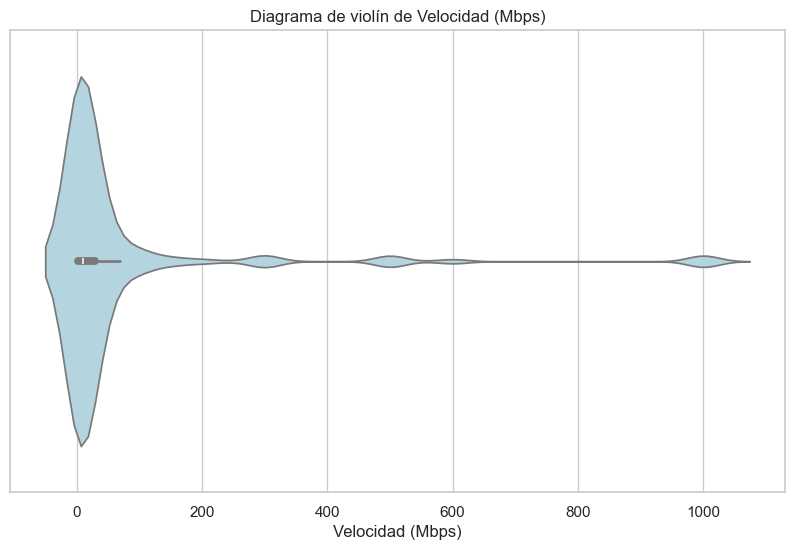

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Velocidad (Mbps)'], color='lightblue')
plt.title('Diagrama de violín de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.show()


4. Violin Plot (Gráfico 4):

Descripción: Combina características de un boxplot y una curva KDE para visualizar la distribución y densidad.

Observaciones:

La mayor densidad de datos se concentra en velocidades bajas, especialmente por debajo de 50 Mbps.
Las áreas alargadas y delgadas hacia la derecha confirman la presencia de valores extremos y una cola larga en la distribución.
Este gráfico ofrece una visualización más rica de la distribución en comparación con el boxplot, mostrando tanto la densidad como los valores atípicos.

In [55]:
percentiles = df['Velocidad (Mbps)'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
print(percentiles)


count    18864.000000
mean        66.866042
std        178.987138
min          0.000000
10%          0.512000
25%          3.000000
50%         10.000000
75%         30.000000
90%        150.000000
max       1024.000000
Name: Velocidad (Mbps), dtype: float64


Cantidad de datos (count):

Hay un total de 18,864 observaciones para la variable Velocidad (Mbps).
Media (mean):

El valor promedio de la velocidad es de 66.87 Mbps.
Este valor es significativamente mayor que los percentiles inferiores (10%, 25%, 50%), lo que sugiere que los valores extremos (altas velocidades) están influyendo y elevando la media.
Desviación estándar (std):

La desviación estándar es de 178.99 Mbps, indicando una alta variabilidad en los datos. La amplitud de las velocidades, que incluye valores extremos, contribuye a este resultado.
Mínimo (min):

El valor más bajo de velocidad registrado es 0 Mbps, lo cual podría corresponder a casos de conexiones inactivas o datos faltantes. Este valor podría requerir mayor investigación.
Máximo (max):

El valor máximo es 1,024 Mbps (1 Gbps). Este es un valor esperado para conexiones de alta velocidad (como fibra óptica), aunque está muy lejos de los valores típicos en el dataset.
Percentiles:

10%: El 10% de las velocidades son inferiores a 0.512 Mbps, indicando que una pequeña proporción de usuarios tiene velocidades extremadamente bajas.
25% (Primer cuartil): El 25% de las velocidades son menores o iguales a 3 Mbps, reflejando que un cuarto de los usuarios tienen velocidades limitadas, posiblemente relacionadas con conexiones básicas o de zonas rurales.
50% (Mediana): La mediana es de 10 Mbps, indicando que la mitad de los datos están por debajo de este valor. Esto refuerza la idea de que la mayoría de los datos se concentran en velocidades bajas.
75% (Tercer cuartil): El 75% de las velocidades están por debajo de 30 Mbps, lo cual confirma que solo una cuarta parte de los usuarios accede a velocidades superiores a este valor.
90%: El 90% de las velocidades están por debajo de 150 Mbps, lo que resalta que las velocidades muy altas (por ejemplo, superiores a 150 Mbps) están limitadas a una pequeña proporción de usuarios.
Conclusiones:
Distribución sesgada:

La media (66.87 Mbps) está muy influenciada por los valores extremos en la cola derecha de la distribución, ya que la mediana es mucho menor (10 Mbps).
Esto confirma que la mayoría de los usuarios tienen velocidades bajas, y las velocidades altas son poco comunes pero influyentes.
Velocidades comunes:

Entre el 25% y el 75% de los datos (rango intercuartílico), las velocidades se encuentran entre 3 Mbps y 30 Mbps, lo que puede considerarse un rango típico para la mayoría de los usuarios.
Valores extremos:

Las velocidades muy altas (superiores a 150 Mbps) representan menos del 10% de los datos, mientras que el valor máximo (1,024 Mbps) es un claro outlier.
Los valores extremadamente bajos (como 0 Mbps) podrían indicar datos faltantes o registros de conexiones no funcionales.
Implicaciones:

La alta variabilidad y los valores extremos sugieren que podría ser útil segmentar el análisis por grupos de velocidades (bajas, medias y altas) o eliminar los valores extremos para cálculos estadísticos más representativos.
Este análisis podría ser complementado investigando las razones detrás de las velocidades extremadamente bajas (0 Mbps) y las velocidades extremadamente altas (>150 Mbps).

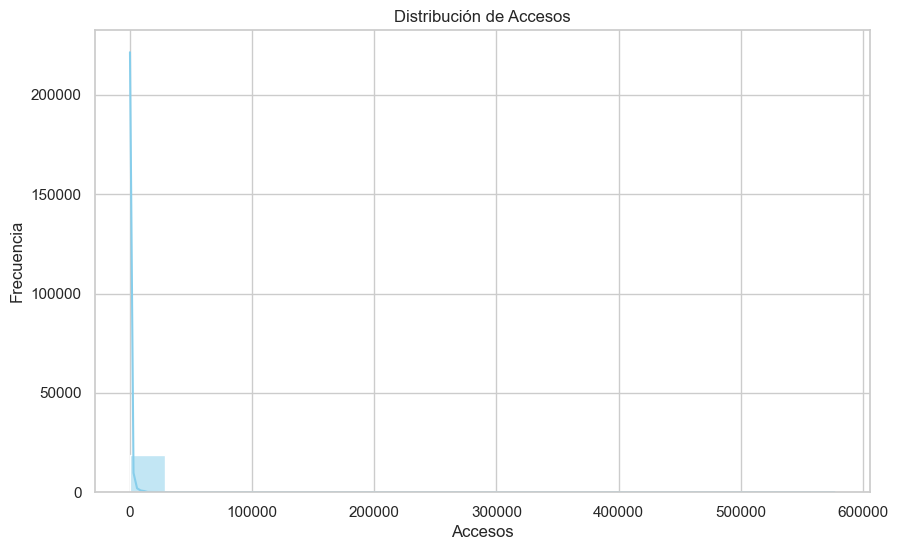

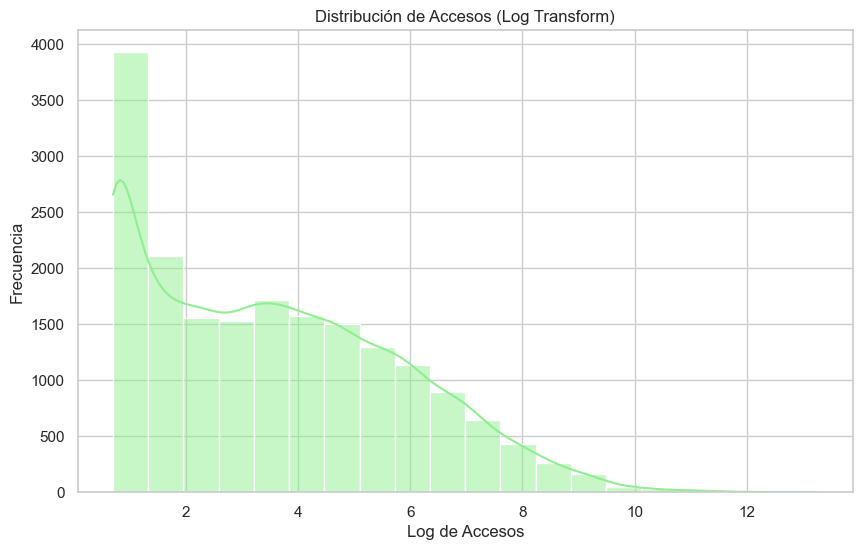

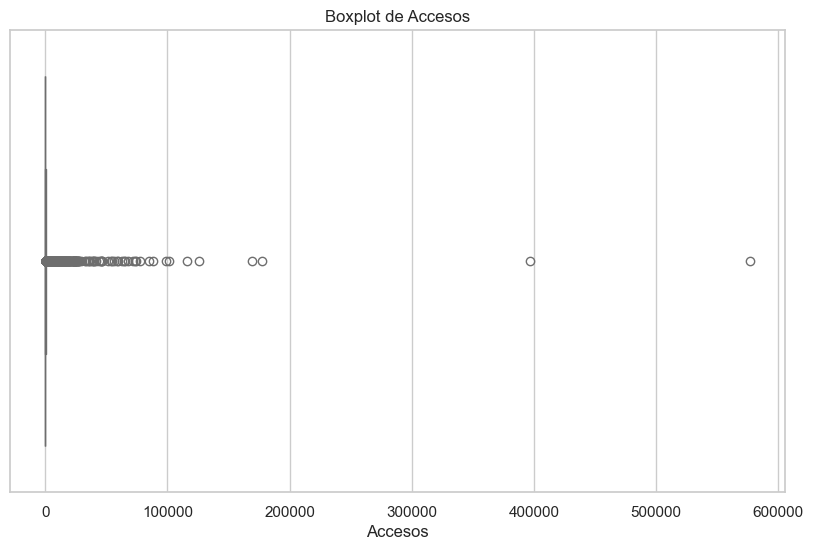

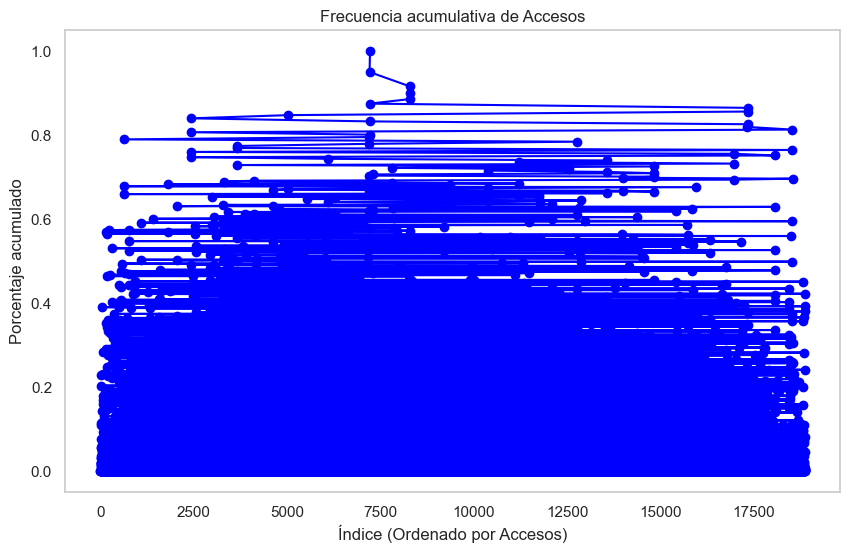

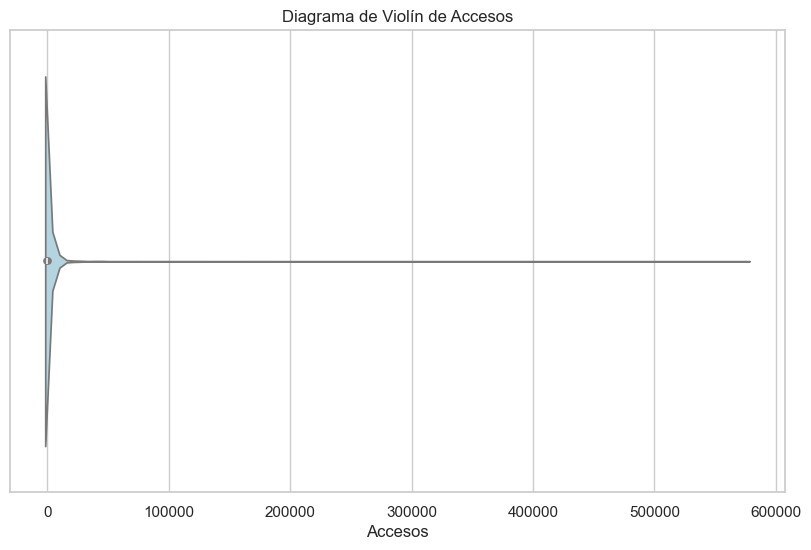

Estadísticos descriptivos de 'Accesos':
count     18813.000000
mean        614.634030
std        6290.461187
min           1.000000
10%           1.000000
25%           4.000000
50%          27.000000
75%         181.000000
90%         877.800000
max      576789.000000
Name: Accesos, dtype: float64
El 3.65% de los accesos están dentro del rango intercuartílico (Q1-Q3).


In [56]:


# 1. Distribución de 'Accesos' (Numérica)
plt.figure(figsize=(10, 6))
sns.histplot(df['Accesos'], kde=True, bins=20, color="skyblue")
plt.title('Distribución de Accesos')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

# 2. Filtrar valores no válidos y reemplazarlos con NaN
df['Accesos'] = df['Accesos'].apply(lambda x: x if x > 0 else np.nan)

# 3. Aplicar transformación logarítmica (log(x + 1) para manejar ceros)
df['Accesos_log'] = df['Accesos'].apply(lambda x: np.log(x + 1) if not pd.isnull(x) else np.nan)

# 4. Histograma de la variable transformada (Log Transform)
plt.figure(figsize=(10, 6))
sns.histplot(df['Accesos_log'], kde=True, bins=20, color="lightgreen")
plt.title('Distribución de Accesos (Log Transform)')
plt.xlabel('Log de Accesos')
plt.ylabel('Frecuencia')
plt.show()

# 5. Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Accesos', color="lightcoral")
plt.title('Boxplot de Accesos')
plt.xlabel('Accesos')
plt.show()

# 6. Frecuencia acumulativa de Accesos
sorted_accesos = df['Accesos'].dropna().sort_values()
cumsum_accesos = sorted_accesos.cumsum() / sorted_accesos.sum()

plt.figure(figsize=(10, 6))
plt.plot(sorted_accesos.index, cumsum_accesos, marker='o', linestyle='-', color="blue")
plt.title('Frecuencia acumulativa de Accesos')
plt.xlabel('Índice (Ordenado por Accesos)')
plt.ylabel('Porcentaje acumulado')
plt.grid()
plt.show()

# 7. Diagrama de violín para analizar la densidad y los valores atípicos
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Accesos', color="lightblue")
plt.title('Diagrama de Violín de Accesos')
plt.xlabel('Accesos')
plt.show()

# 8. Percentiles y estadísticos descriptivos
percentiles_accesos = df['Accesos'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
print("Estadísticos descriptivos de 'Accesos':")
print(percentiles_accesos)

# 9. Calcular el porcentaje de accesos que representan los valores en el rango intercuartílico
q1 = df['Accesos'].quantile(0.25)
q3 = df['Accesos'].quantile(0.75)
iqr_percentage = df[(df['Accesos'] >= q1) & (df['Accesos'] <= q3)]['Accesos'].sum() / df['Accesos'].sum() * 100
print(f"El {iqr_percentage:.2f}% de los accesos están dentro del rango intercuartílico (Q1-Q3).")


1. Histograma de Accesos

El histograma muestra que la mayoría de los valores de la variable Accesos están concentrados en el rango bajo, cercano a 0. Esto sugiere que la mayoría de las localidades tienen un número reducido de accesos.
Se observa una cola derecha pronunciada, lo que indica la presencia de localidades con accesos significativamente altos en comparación con la mayoría.
Interpretación:

La distribución es altamente asimétrica, con muchos valores bajos y pocos valores extremos altos.

2. Transformación Logarítmica

El histograma de la variable transformada logarítmicamente muestra una distribución mucho más simétrica, aunque aún con una ligera asimetría positiva.
La transformación logarítmica fue útil para mitigar el efecto de los valores extremos y permite una mejor visualización de la distribución subyacente.
Interpretación:

La transformación logarítmica permite identificar tendencias y patrones en los datos que no eran evidentes en la escala original.

Guiar para interpretar los valores del grafico

2 (~6)
4 (~53)
6 (~403)
8 (~2980)
10 (~22026)

3. Boxplot de Accesos

El boxplot revela una gran cantidad de valores atípicos (outliers) por encima del límite superior (Q3 + 1.5*IQR).
Estos valores atípicos corresponden a localidades con accesos extremadamente altos.
Interpretación:

La presencia de valores atípicos sugiere la existencia de localidades con una alta concentración de accesos, probablemente asociadas con áreas metropolitanas o regiones de alta densidad poblacional.

4. Frecuencia Acumulativa

La curva de frecuencia acumulativa muestra que un pequeño porcentaje de localidades concentra una gran proporción de los accesos.
La mayor parte de las localidades tiene un número reducido de accesos, lo que confirma la asimetría de la distribución.
Interpretación:

Este gráfico enfatiza la desigualdad en la distribución de accesos entre las localidades.

5. Diagrama de Violín

El diagrama de violín muestra claramente la concentración de valores bajos y destaca la presencia de localidades con accesos significativamente altos.
Refuerza la información visual del boxplot pero incluye la densidad estimada de los datos.
Interpretación:

La densidad de la mayoría de los valores está cerca de 0, con una cola extendida hacia valores más altos.

6. Estadísticos Descriptivos

Estadístico	Valor
Media	614.63
Mediana	27.0
Mínimo	1
Máximo	576,789
Desviación Estándar	6,290.46
Percentil 10%	1
Percentil 25%	4
Percentil 75%	181
Percentil 90%	877.8
La media es mucho mayor que la mediana, lo que confirma la influencia de los valores atípicos.
El rango intercuartílico (IQR) muestra que el 50% central de los datos está entre 4 y 181 accesos, lo que refleja que la mayoría de las localidades tiene una cantidad moderada de accesos.
Solo el 3.65% de los valores está dentro del rango intercuartílico (Q1-Q3), indicando una gran dispersión.
Conclusión General
La variable Accesos tiene una distribución altamente asimétrica con muchos valores bajos y unos pocos valores extremadamente altos que generan una cola larga.
La transformación logarítmica es útil para analizar patrones y realizar análisis estadísticos más detallados.
Los valores atípicos representan localidades con una alta densidad de accesos, probablemente relacionadas con centros urbanos o zonas de alta conectividad.
Es importante considerar este comportamiento al realizar modelos predictivos o análisis inferenciales, ya que estos valores extremos podrían sesgar los resultados.

CONCLUSIONES GENERALES
----------------

Concentración: Tanto las variables geográficas (provincias, localidades) como las métricas (velocidad y accesos) muestran una fuerte concentración de datos en unos pocos valores (provincias/ciudades grandes, valores bajos de velocidad/accesos).
Desafíos de sesgo: La mayoría de las variables numéricas presentan distribuciones con sesgo positivo (valores concentrados en rangos bajos con outliers altos), lo que requiere transformaciones para una mejor interpretación.
Outliers: Hay una cantidad significativa de outliers en velocidad y accesos, que destacan desigualdades en infraestructura o acceso a internet.

ANALISIS DE CORRELACIONES
-----------------

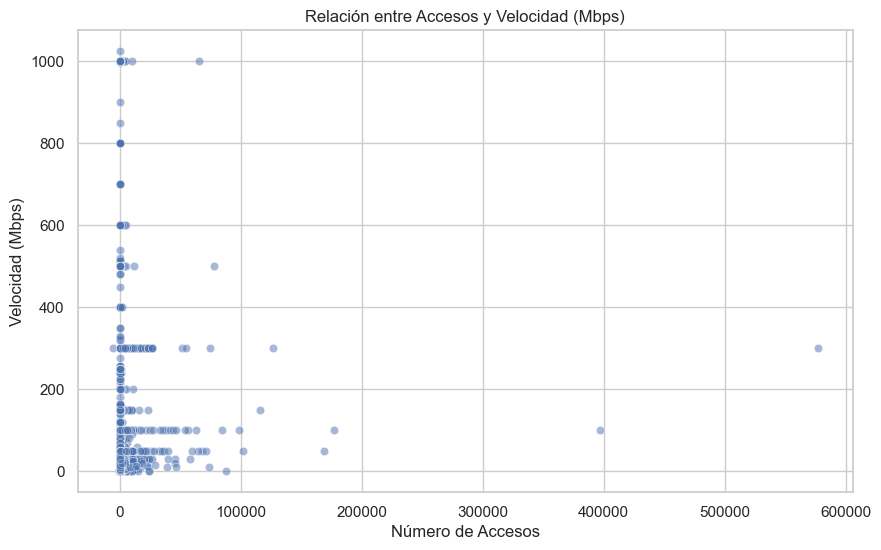

Correlación entre Accesos y Velocidad (Mbps): 0.04


In [12]:
# Scatter plot para mostrar la relación entre Accesos y Velocidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Accesos', y='Velocidad (Mbps)', alpha=0.5)
plt.xlabel("Número de Accesos")
plt.ylabel("Velocidad (Mbps)")
plt.title("Relación entre Accesos y Velocidad (Mbps)")
plt.show()

# Calcular la correlación entre Accesos y Velocidad
correlacion = df['Accesos'].corr(df['Velocidad (Mbps)'])
print(f"Correlación entre Accesos y Velocidad (Mbps): {correlacion:.2f}")


Análisis del Gráfico de Relación entre Accesos y Velocidad
Concentración de Datos en Velocidades Bajas y Número de Accesos Bajo:

La mayoría de los puntos en el gráfico se concentran en la parte inferior izquierda, donde tanto el número de accesos como la velocidad son bajos. Esto sugiere que la mayoría de las conexiones en el dataset tienen velocidades moderadas a bajas y representan lugares o usuarios con pocos accesos.
Esta tendencia es común en áreas residenciales o pequeñas empresas, donde las velocidades de internet son suficientes para uso personal o pequeñas operaciones, y el número de accesos es limitado.

Valores Atípicos (Outliers):

Hay varios puntos dispersos que representan valores muy altos en términos de velocidad o número de accesos. Estos son los outliers y pueden indicar conexiones especiales o infraestructuras de gran escala.
Algunos de estos puntos tienen velocidades que superan los 600 Mbps y otros hasta los 1000 Mbps, lo cual sugiere que podrían estar asociados con infraestructuras avanzadas como centros de datos, redes empresariales de alta capacidad, o servicios de fibra óptica en áreas urbanas.
También se observa que algunos puntos tienen un número de accesos extremadamente alto, por ejemplo, cercanos a 400,000 y 600,000. Estos valores probablemente representan infraestructuras públicas o comerciales, como proveedores de servicios de internet (ISP) que agrupan una gran cantidad de accesos.

Falta de Correlación Fuerte entre Accesos y Velocidad:

No parece haber una correlación clara entre el número de accesos y la velocidad. Es decir, tener un número alto de accesos no necesariamente implica una mayor velocidad de conexión, y viceversa.
Esto puede sugerir que la velocidad de conexión depende más de la infraestructura tecnológica disponible (como ADSL, fibra óptica, cable módem) que de la cantidad de usuarios o accesos en una región.
Variabilidad en la Infraestructura de Conexión:

La dispersión de los puntos indica que hay una gran variabilidad en las velocidades de conexión, incluso para un mismo rango de accesos. Esto puede reflejar las diferencias en infraestructura entre regiones, donde algunas áreas con pocos accesos pueden tener conexiones de alta velocidad (como fibra óptica), mientras que otras con muchos accesos pueden estar limitadas a tecnologías de menor capacidad (como ADSL).

Conclusiones
Concentración de Usuarios: La mayoría de los accesos en el dataset tienen una velocidad relativamente baja, lo que es común en infraestructuras residenciales o de pequeñas empresas.

Presencia de Conexiones Especiales: Los outliers reflejan la existencia de conexiones de alta velocidad o con una gran cantidad de accesos, probablemente pertenecientes a grandes empresas, ISP, o áreas urbanas con tecnología avanzada.
Ausencia de Correlación Directa: La falta de una relación clara entre la velocidad y el número de accesos sugiere que estos factores están influenciados por condiciones independientes, como la tecnología disponible y el tipo de usuarios en la región.

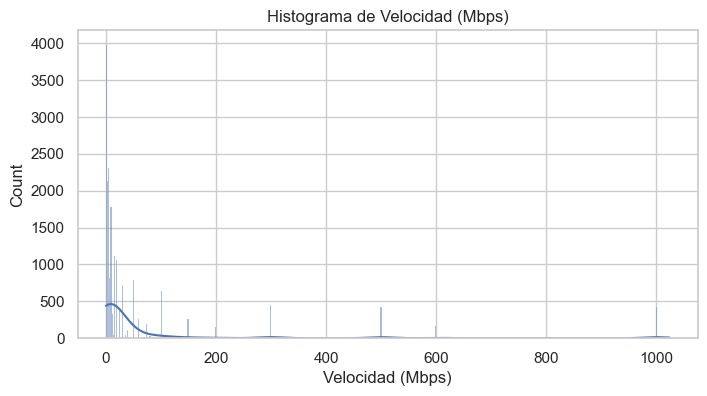

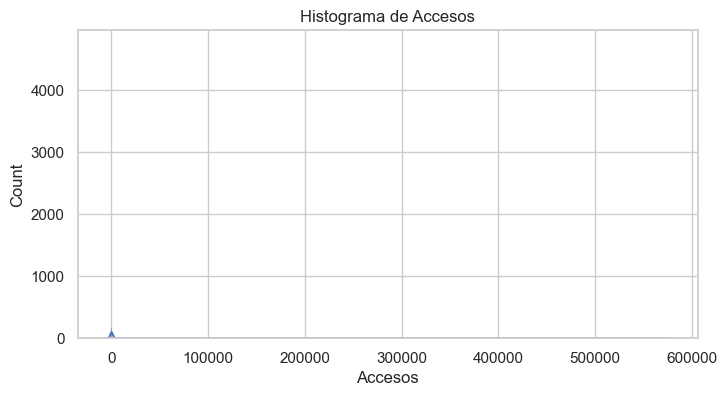

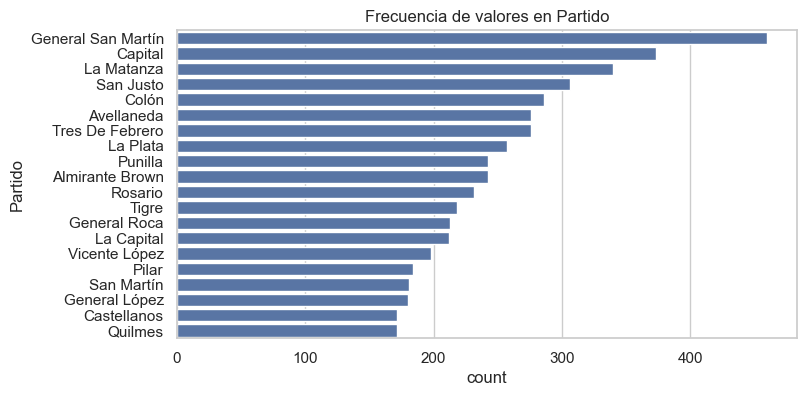

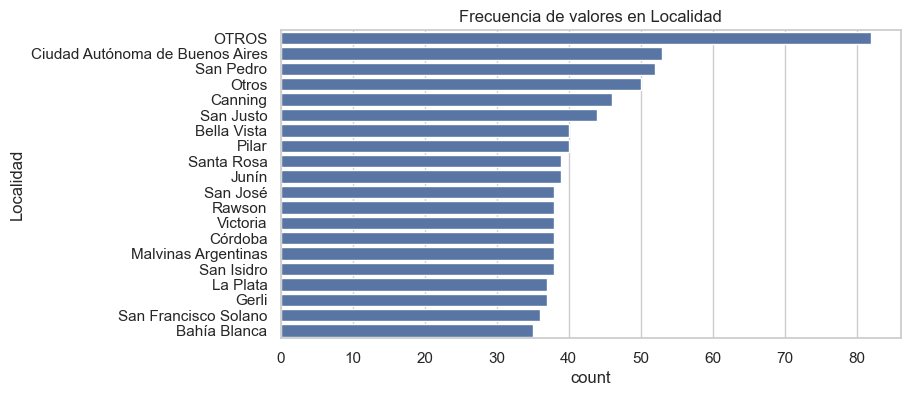

In [13]:

# Paso 4: Análisis de Distribución de Variables
# Histogramas de variables numéricas
for column in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histograma de {column}')
    plt.show()

# Gráficos de barras para variables categóricas
cat_columns = ['Partido', 'Localidad']

for column in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=column, order=df[column].value_counts().index[:20])  # Top 10 valores
    plt.title(f'Frecuencia de valores en {column}')
    plt.show()


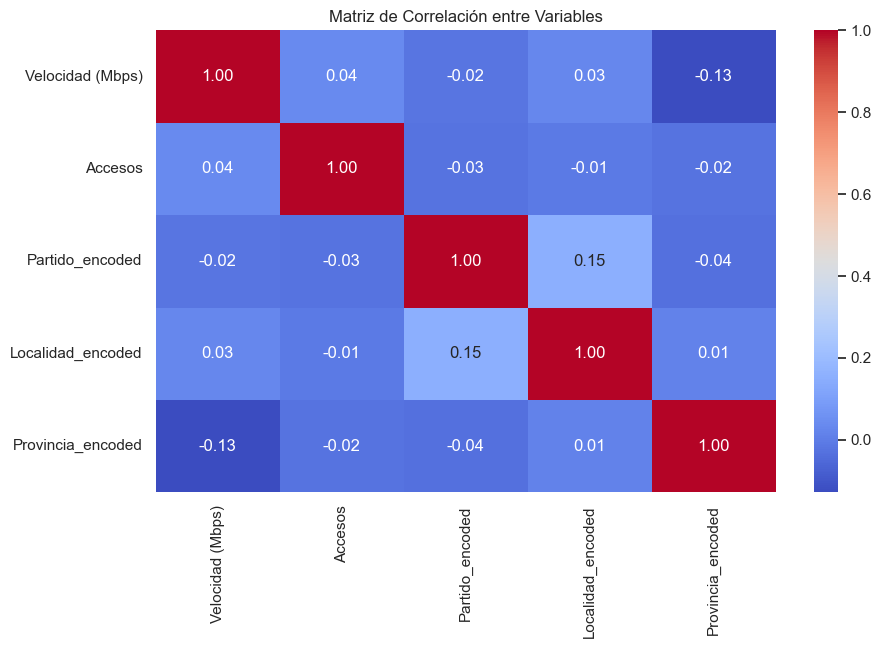

Cramer's V (Partido vs Accesos): 0.30
Cramer's V (Localidad vs Accesos): 0.28


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar y preparar datos
df['Velocidad (Mbps)'] = pd.to_numeric(df['Velocidad (Mbps)'], errors='coerce')  # Asegurarse que sea numérica
df.dropna(subset=['Accesos', 'Velocidad (Mbps)'], inplace=True)

# Codificar variables categóricas (Label Encoding)
label_encoder = LabelEncoder()
df['Partido_encoded'] = label_encoder.fit_transform(df['Partido'])
df['Localidad_encoded'] = label_encoder.fit_transform(df['Localidad'])
df['Provincia_encoded'] = label_encoder.fit_transform(df['Provincia'])

# Seleccionar columnas numéricas para calcular correlaciones
numerical_columns = ['Velocidad (Mbps)', 'Accesos', 'Partido_encoded', 'Localidad_encoded', 'Provincia_encoded']
correlation_matrix = df[numerical_columns].corr()

# Visualizar matriz de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación entre Variables')
plt.show()

# Análisis de correlación categórica (e.g., Cramer V para Partido/Provincia con Accesos)
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Correlaciones categóricas
cramers_v_partido_accesos = cramers_v(df['Partido'], df['Accesos'])
cramers_v_localidad_accesos = cramers_v(df['Localidad'], df['Accesos'])

print(f"Cramer's V (Partido vs Accesos): {cramers_v_partido_accesos:.2f}")
print(f"Cramer's V (Localidad vs Accesos): {cramers_v_localidad_accesos:.2f}")


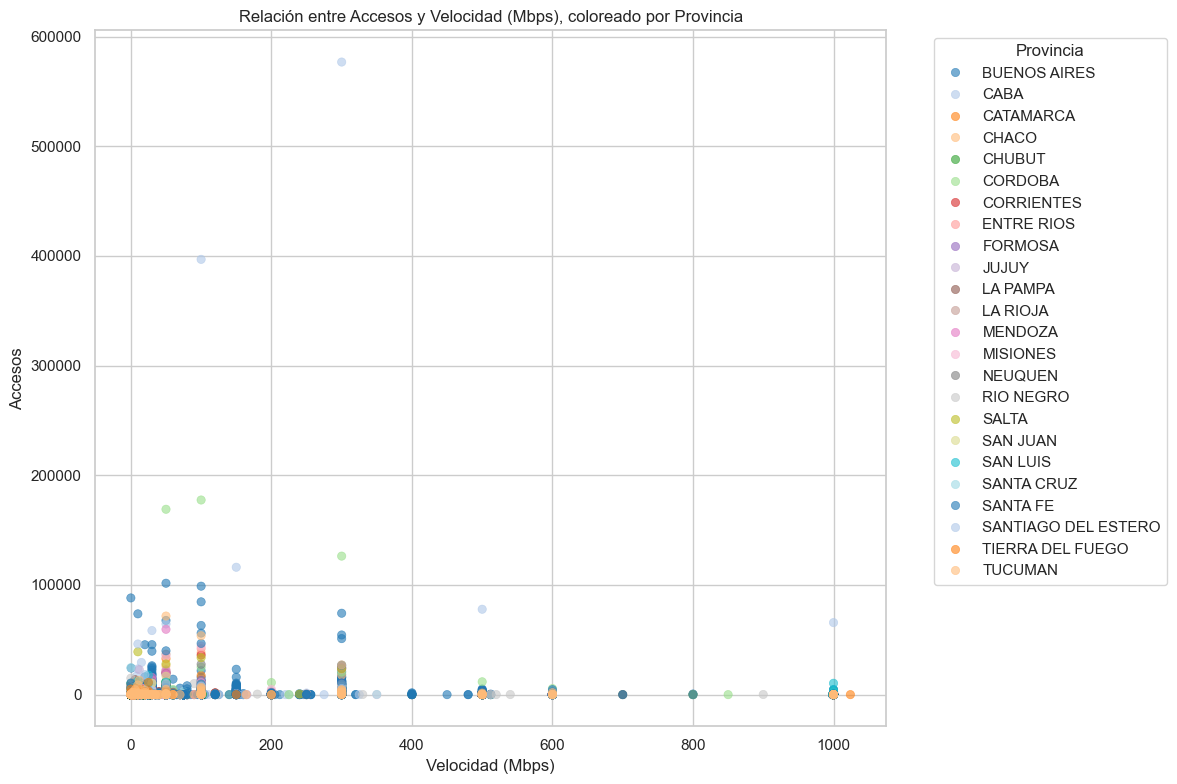

In [60]:

# Gráfico de dispersión (Accesos vs Velocidad (Mbps))
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='Velocidad (Mbps)', 
    y='Accesos', 
    hue='Provincia',  # Cambiar a 'Partido' si se desea analizar por Partido
    palette='tab20', 
    alpha=0.6, 
    edgecolor=None
)
plt.title('Relación entre Accesos y Velocidad (Mbps), coloreado por Provincia')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Accesos')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


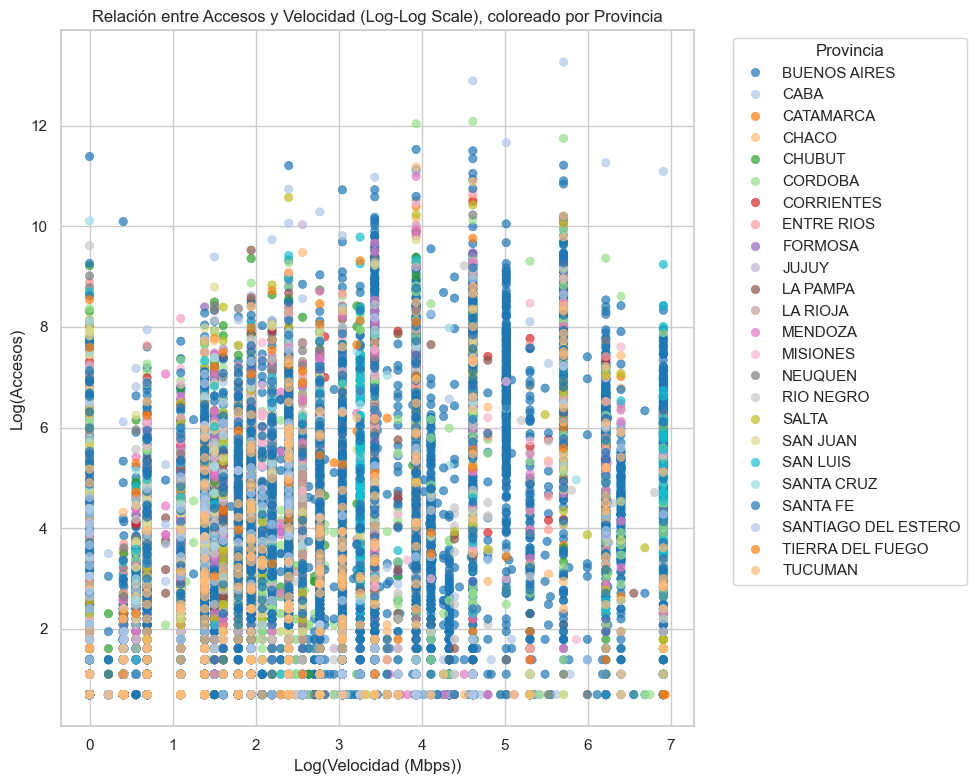

In [61]:
# Crear un gráfico de dispersión con escala logarítmica
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x=np.log1p(df['Velocidad (Mbps)']), 
    y=np.log1p(df['Accesos']), 
    hue='Provincia', 
    palette='tab20', 
    alpha=0.7, 
    edgecolor=None
)
plt.title('Relación entre Accesos y Velocidad (Log-Log Scale), coloreado por Provincia')
plt.xlabel('Log(Velocidad (Mbps))')
plt.ylabel('Log(Accesos)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Paso 6: Búsqueda de Registros Duplicados
# Identificación y eliminación de duplicados
duplicates = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicates}")

# Si decides eliminar duplicados
df = df.drop_duplicates()


Número de registros duplicados: 0


7) Conclusiones General 

Insights Clave
-------------
Desigualdad Regional:

Existe una notable disparidad en accesos y velocidades entre regiones. Las provincias más grandes, como Buenos Aires, presentan una clara ventaja, mientras que provincias más pequeñas tienen menor representación tanto en accesos como en velocidades.
Impacto de la Infraestructura:

La baja correlación entre accesos y velocidad sugiere que la infraestructura de internet puede no estar distribuida equitativamente, lo que resulta en áreas con alta densidad de accesos pero velocidades limitadas.

Outliers y Oportunidades:

Los puntos extremos en accesos y velocidad representan áreas de alta demanda o infraestructura avanzada. Estas zonas pueden ser prioritarias para analizar más a fondo y replicar su éxito en otras regiones.

ANALISIS GENERAL 
HOJA POR HOJA 
------------------------------


--- Análisis de la hoja: Acc_vel_loc_sinrangos ---
Primeras filas:


Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


None


Estadísticas descriptivas:


Provincia        Accesos
count  18864.000000   18857.000000
mean      66.866042     612.828499
std      178.987138    6283.359677
min        0.000000   -5582.000000
25%        3.000000       3.000000
50%       10.000000      26.000000
75%       30.000000     180.000000
max     1024.000000  576789.000000


Valores faltantes por columna:


link Indec    1
Accesos       7
dtype: int64

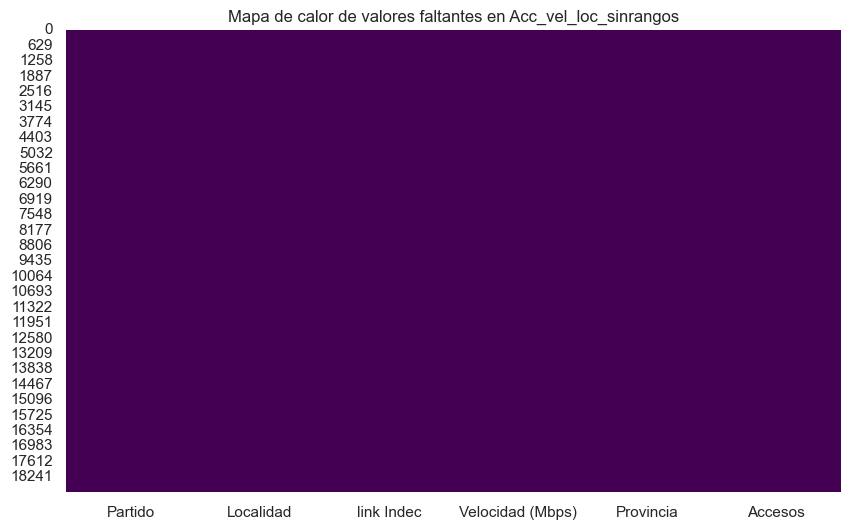

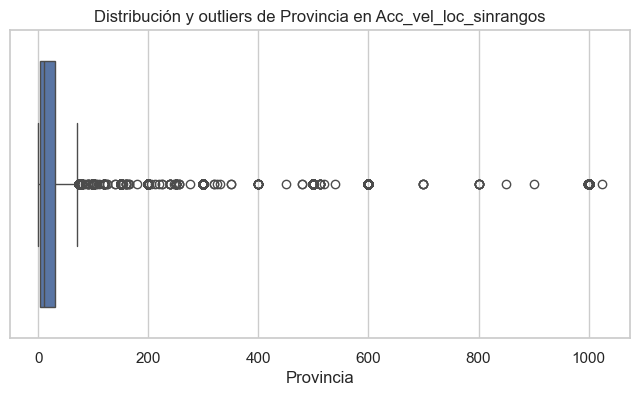

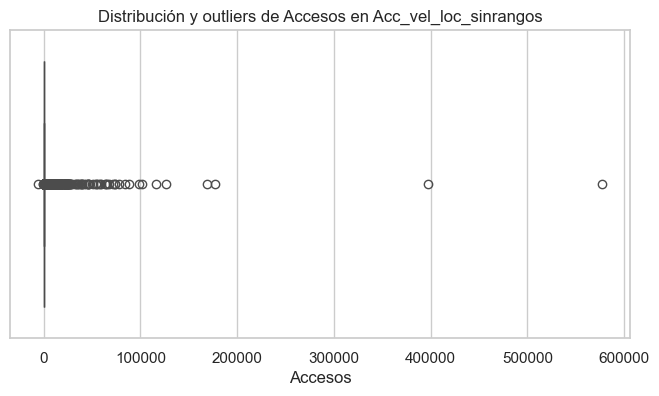

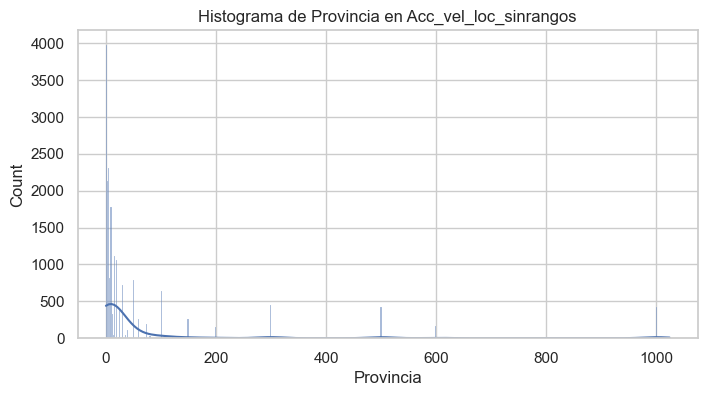

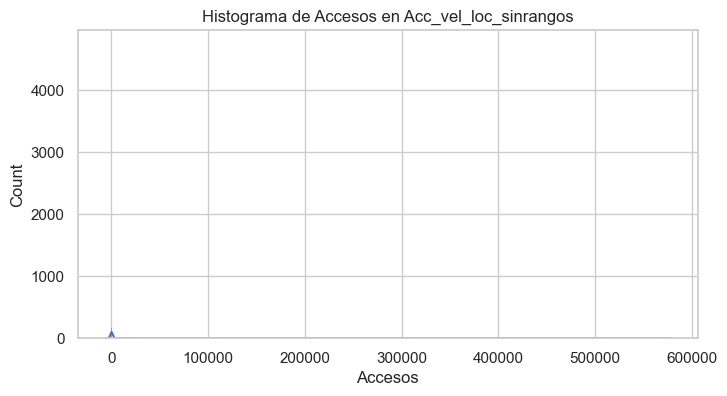


--- Análisis de la hoja: Velocidad_sin_Rangos ---
Primeras filas:


Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB


None


Estadísticas descriptivas:


Año     Trimestre     Velocidad       Accesos
count  18884.000000  18884.000000  18874.000000  1.888400e+04
mean    2021.017104      2.477653     96.171156  1.412328e+04
std        1.919740      1.126947    379.722905  6.856387e+04
min     2017.000000      1.000000      0.000000  0.000000e+00
25%     2019.000000      1.000000      4.000000  2.600000e+01
50%     2021.000000      2.000000     12.300000  6.725000e+02
75%     2023.000000      4.000000     50.100000  6.114000e+03
max     2024.000000      4.000000  10000.000000  1.346370e+06


Valores faltantes por columna:


Velocidad    10
dtype: int64

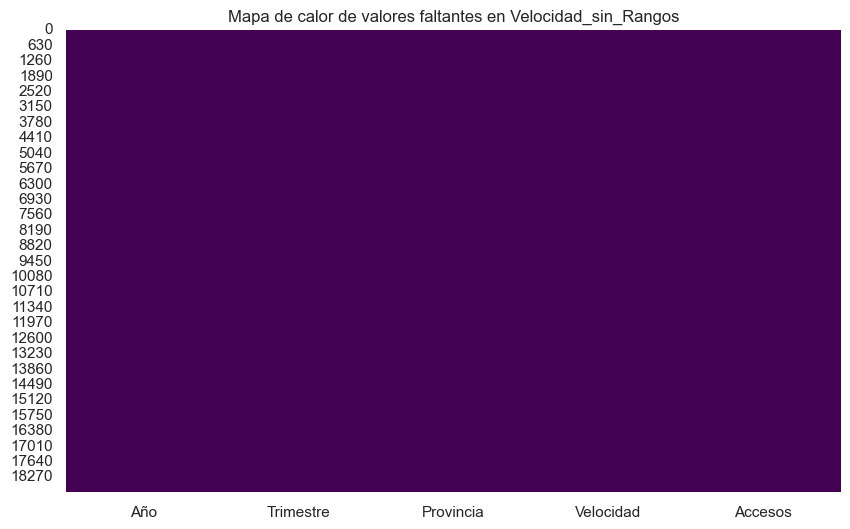

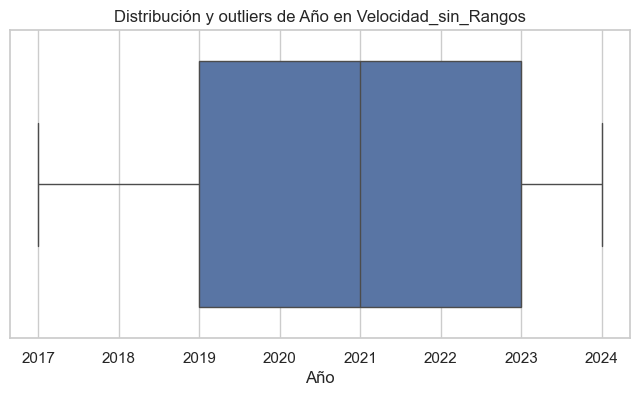

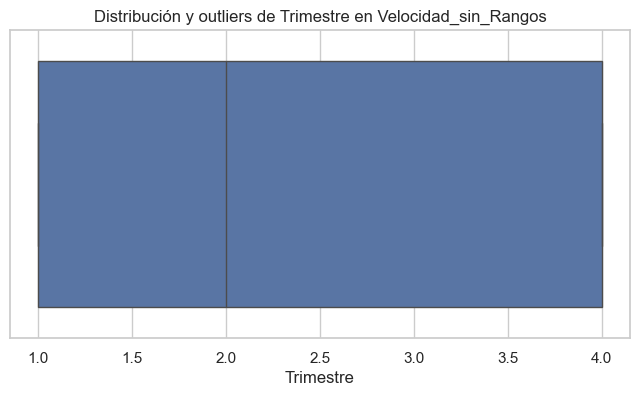

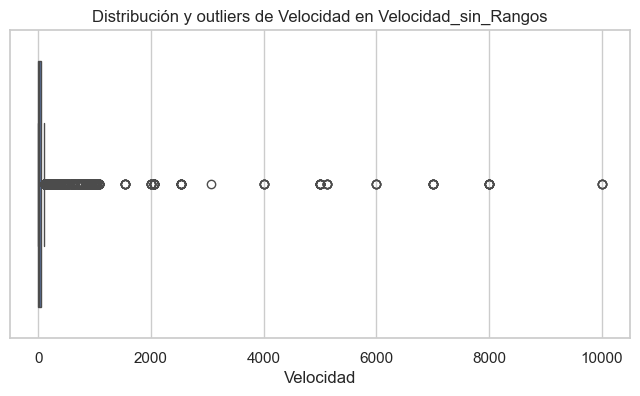

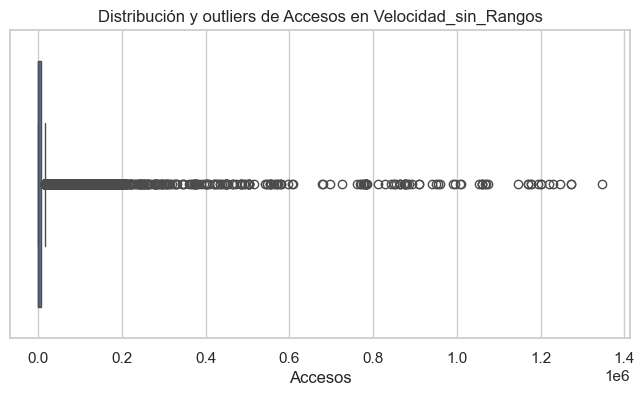

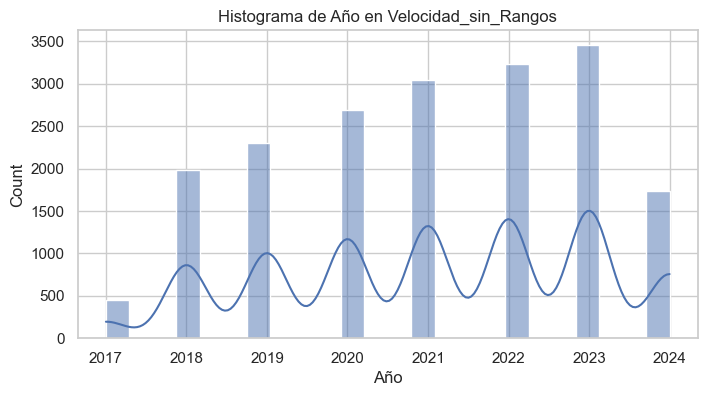

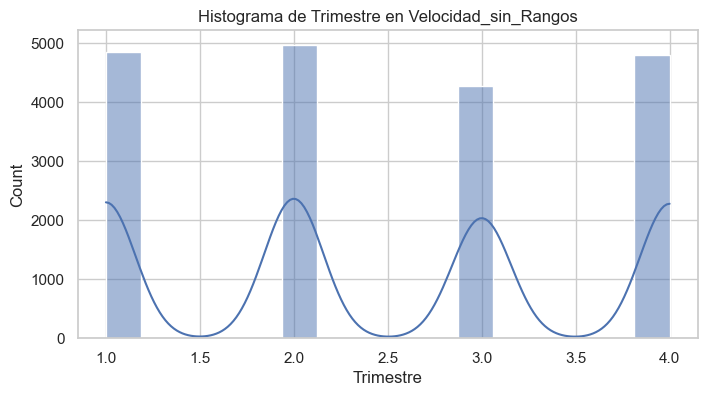

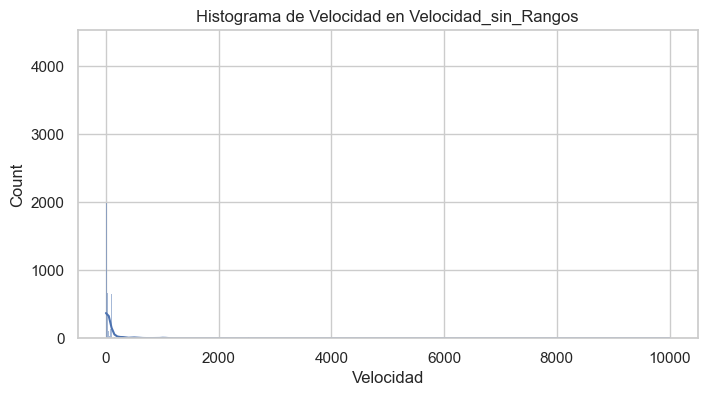

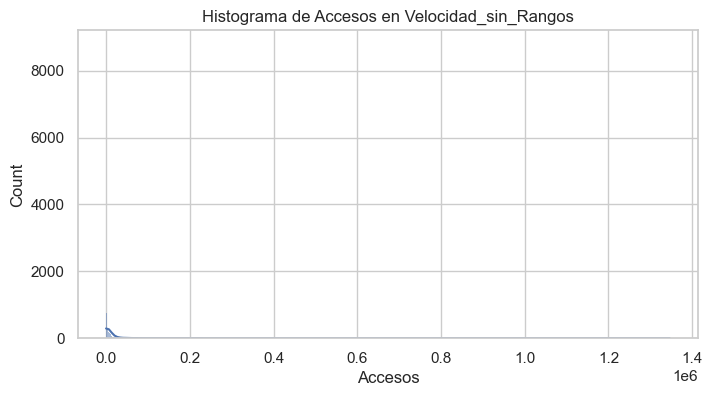


--- Análisis de la hoja: Accesos_tecnologia_localidad ---
Primeras filas:


Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


None


Estadísticas descriptivas:


Accesos
count  7.747000e+03
mean   1.491688e+03
std    1.520174e+04
min    0.000000e+00
25%    3.000000e+00
50%    5.900000e+01
75%    4.005000e+02
max    1.144781e+06


Valores faltantes por columna:


Accesos    6
dtype: int64

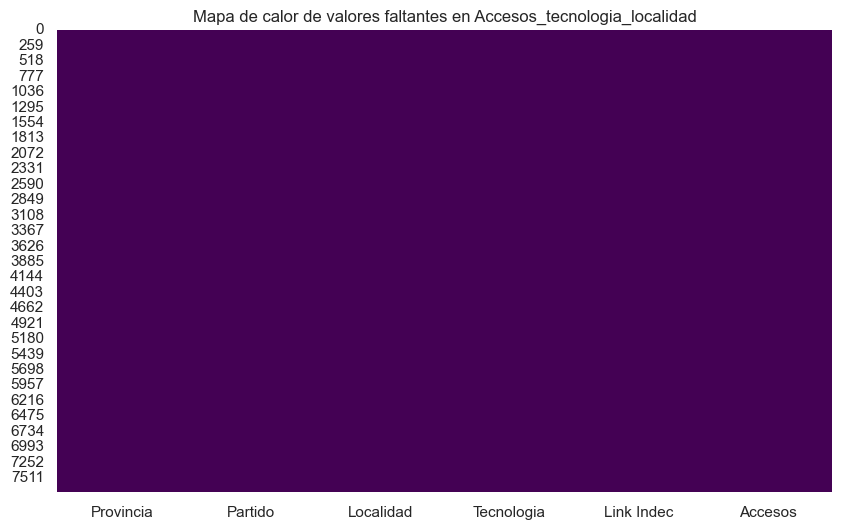

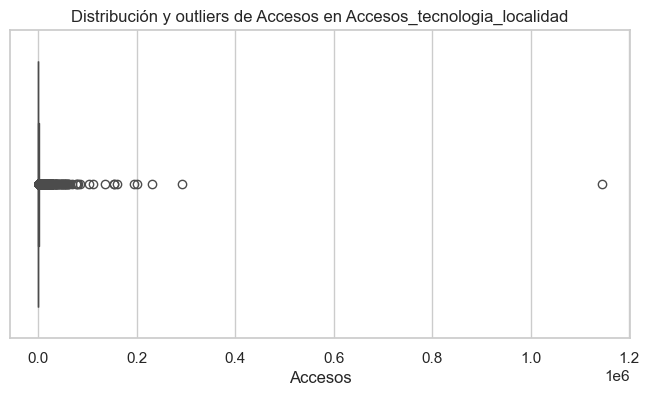

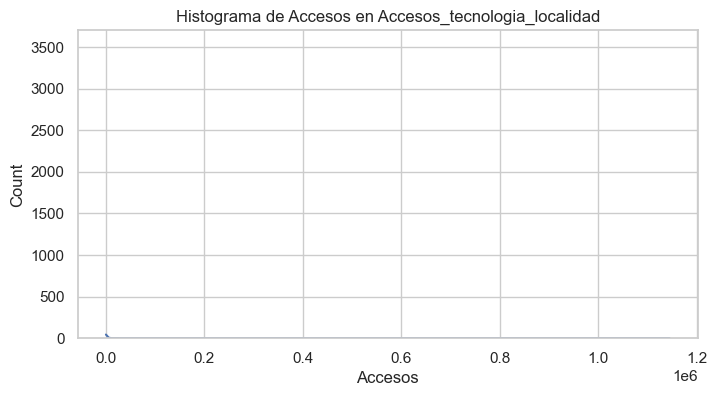


--- Análisis de la hoja: Velocidad % por prov ---
Primeras filas:


Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


None


Estadísticas descriptivas:


Año    Trimestre  Mbps (Media de bajada)
count  1008.000000  1008.000000             1008.000000
mean   2018.761905     2.452381               24.720245
std       3.039439     1.117574               33.660764
min    2014.000000     1.000000                2.573729
25%    2016.000000     1.000000                4.866698
50%    2019.000000     2.000000               10.089315
75%    2021.000000     3.000000               29.875292
max    2024.000000     4.000000              234.440000


Valores faltantes por columna:


Series([], dtype: int64)

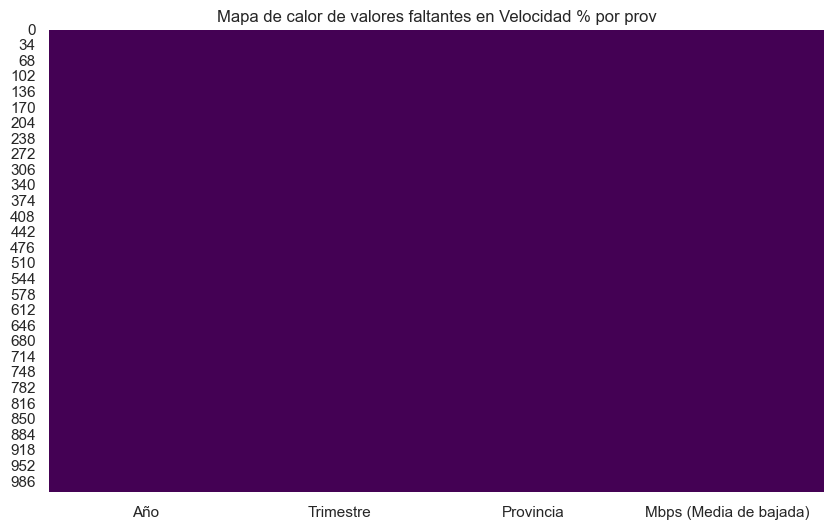

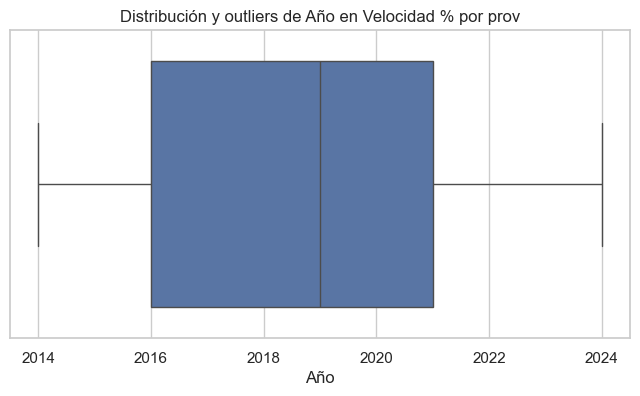

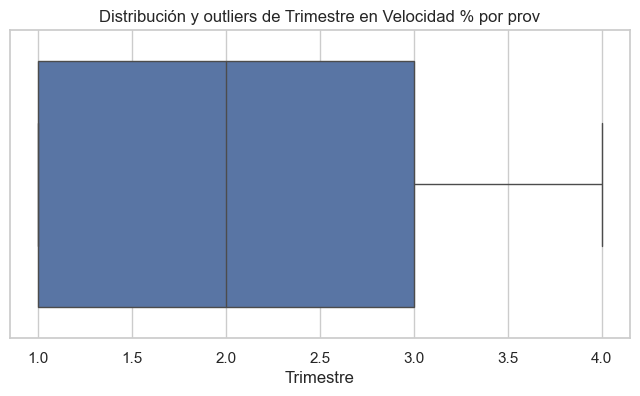

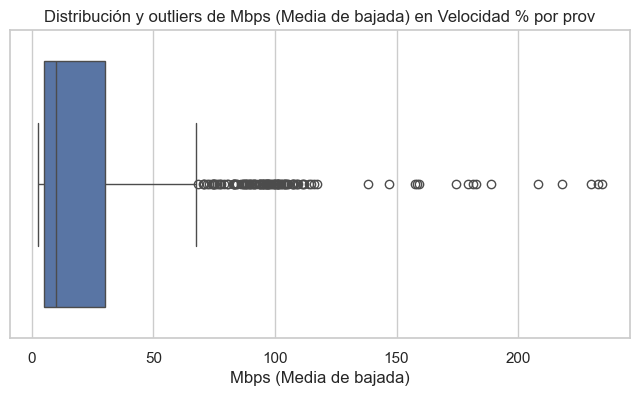

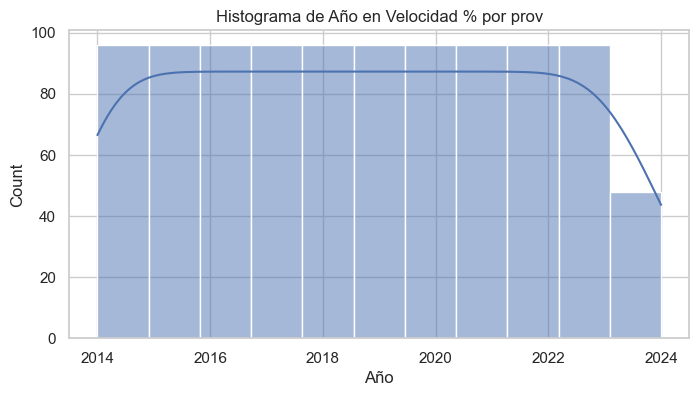

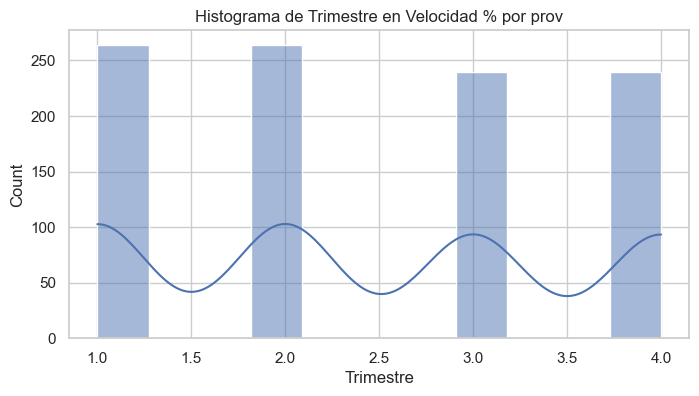

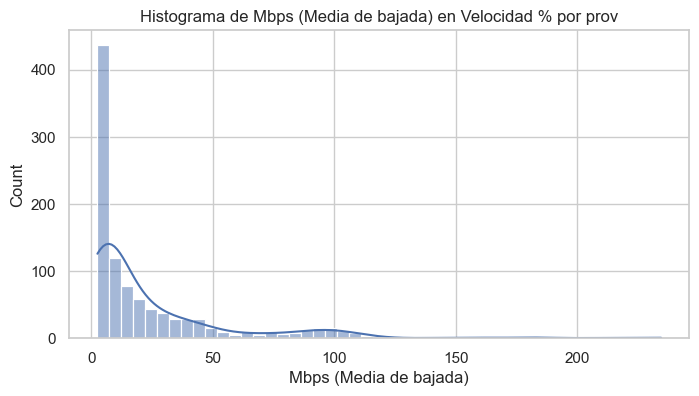


--- Análisis de la hoja: Totales VMD ---
Primeras filas:


Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          2                  139.25   Abr-Jun 2024
1  2024          1                  139.15   Ene-Mar 2024
2  2023          4                  139.04   Oct-Dic 2023
3  2023          3                  129.67  Jul-Sept 2023
4  2023          2                  123.95   Abr-Jun 2023


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


None


Estadísticas descriptivas:


Año  Trimestre  Mbps (Media de bajada)
count    42.000000  42.000000               42.000000
mean   2018.761905   2.452381               39.334762
std       3.074756   1.130560               43.643195
min    2014.000000   1.000000                3.617127
25%    2016.000000   1.250000                6.038428
50%    2019.000000   2.000000               18.855000
75%    2021.000000   3.000000               51.370000
max    2024.000000   4.000000              139.250000


Valores faltantes por columna:


Series([], dtype: int64)

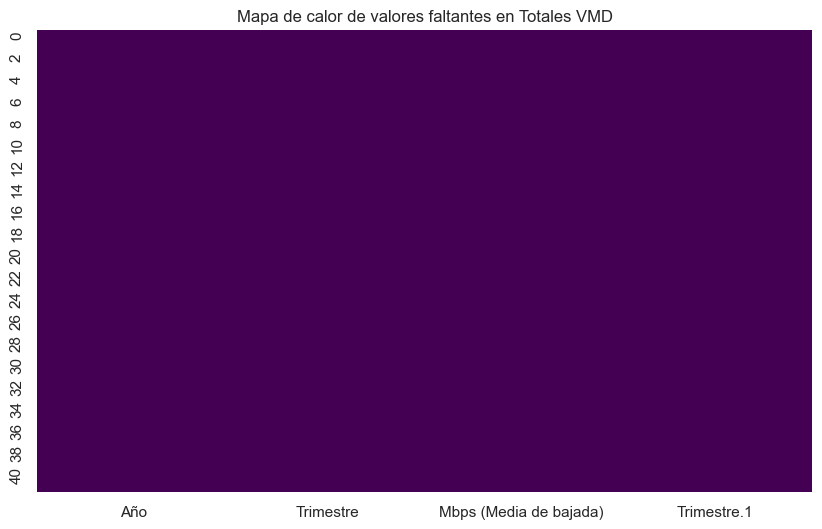

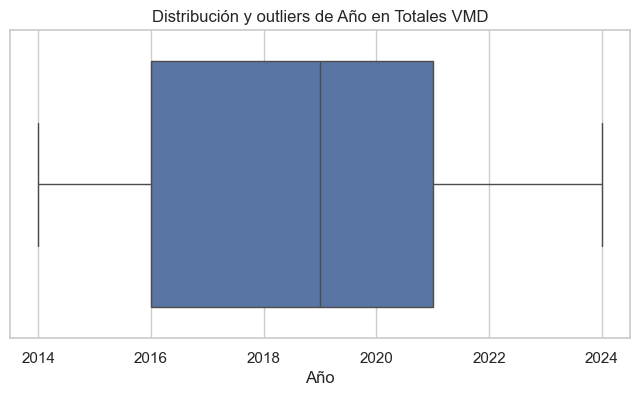

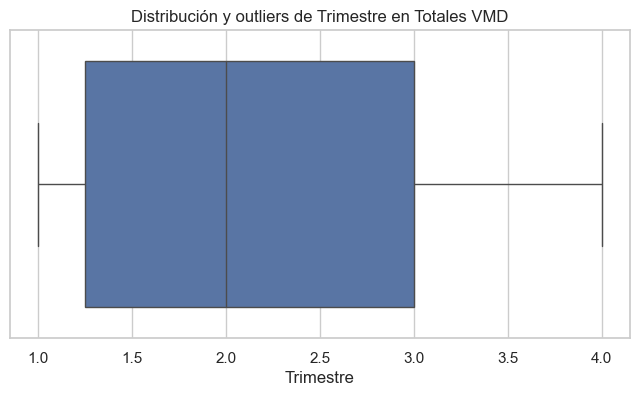

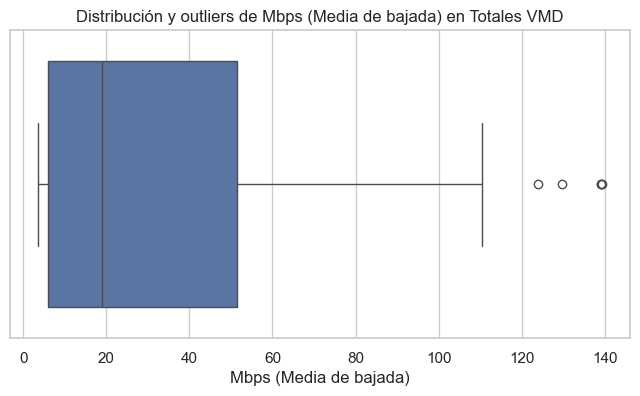

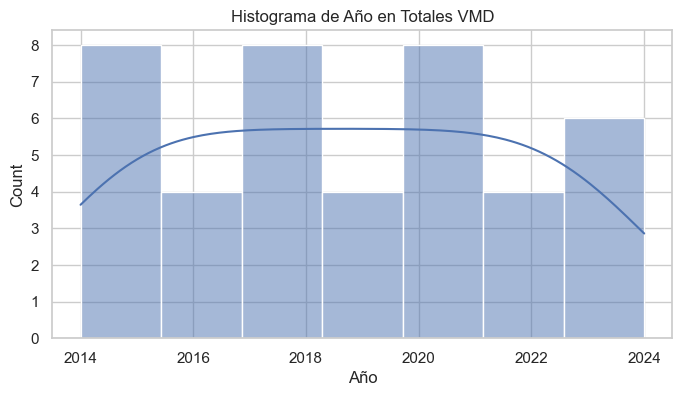

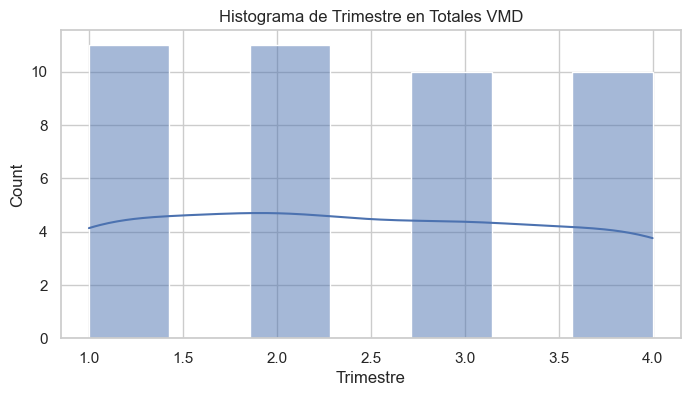

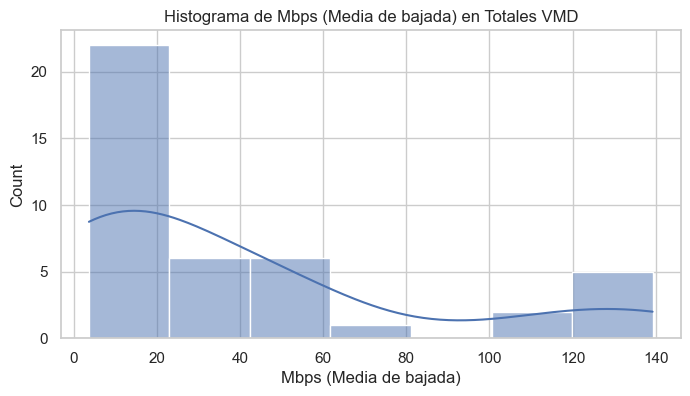


--- Análisis de la hoja: Totales Accesos Por Tecnología ---
Primeras filas:


Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  
0  11556107   Abr-Jun 2024  
1  11633156   Ene-Mar 2024  
2  11547661   Oct-Dic 2023  
3  11406908  Jul-Sept 2023  
4  11251897   Abr-Jun 2023


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


None


Estadísticas descriptivas:


Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%    2016.000000   1.250000  1.730869e+06  3.146292e+06  1.719410e+05   
50%    2019.000000   2.000000  3.061623e+06  4.535507e+06  6.989465e+05   
75%    2021.000000   3.000000  3.713298e+06  5.857192e+06  1.945689e+06   
max    2024.000000   4.000000  3.803024e+06  6.073426e+06  4.169958e+06   

            Wireless          Otros         Total  
count      42.000000      42.000000  4.200000e+01  
mean   304293.214286  158186.071429  8.815923e+06  
std    203202.399993   82363.507846  1.733189e+06  
min     70749.000000   54300.000000  6.398398e+06  
25%     85390.500000   70430.000000  7.218131e+06  
50%    292223.000000  185221.000000  8.720658e+06  
75%    515434.000000  244069.500000  1.038873e+07  
max    598682.000000  265328.000000  1.163316e+07


Valores faltantes por columna:


Series([], dtype: int64)

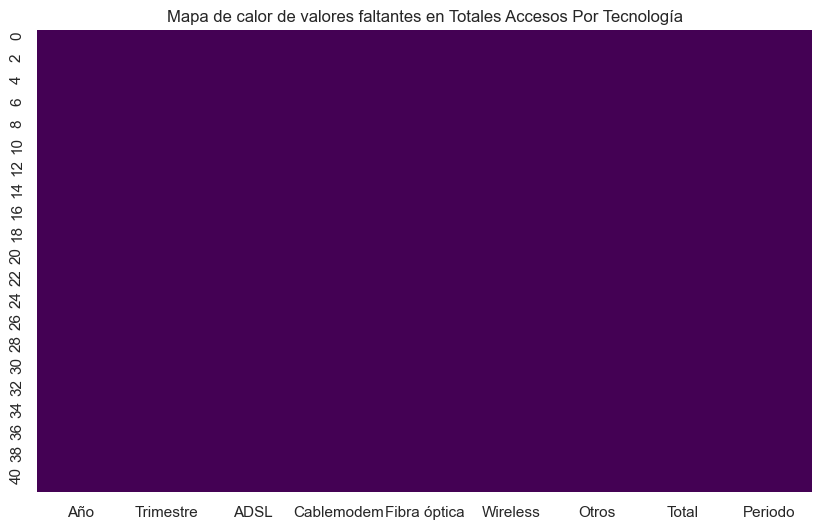

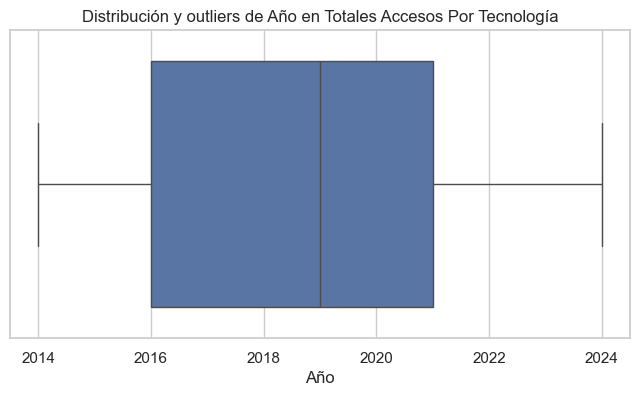

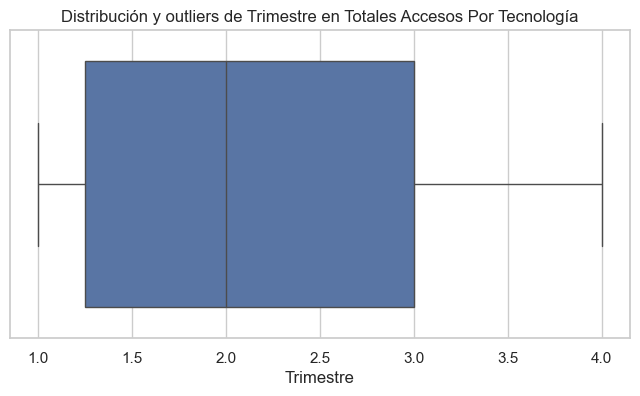

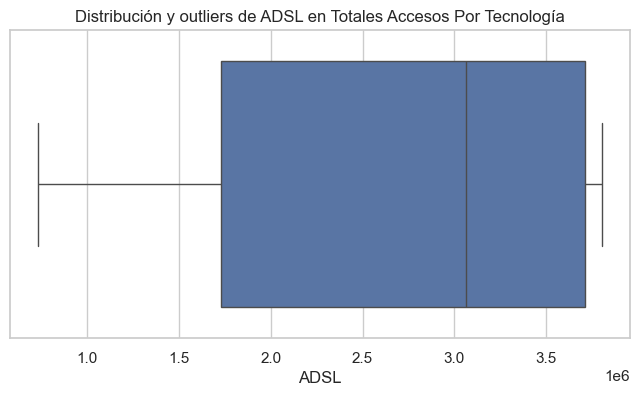

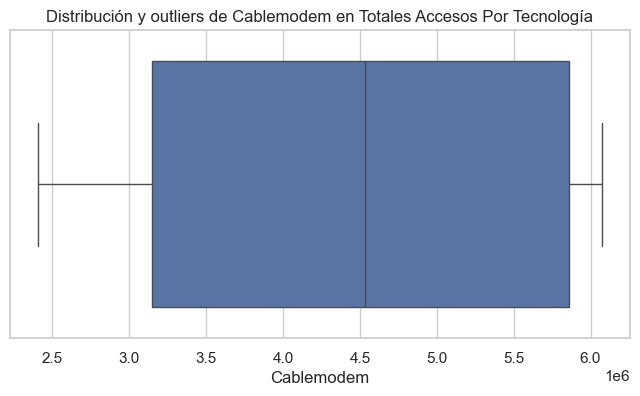

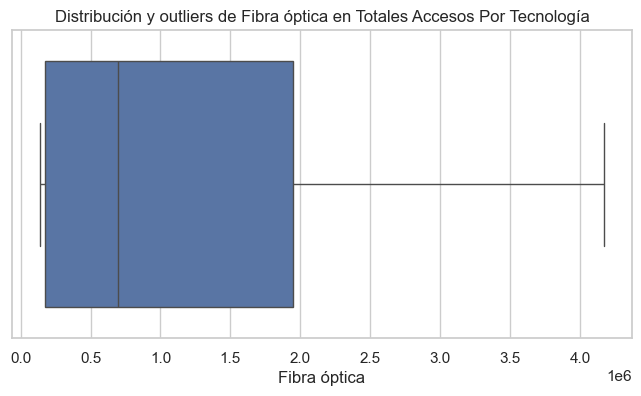

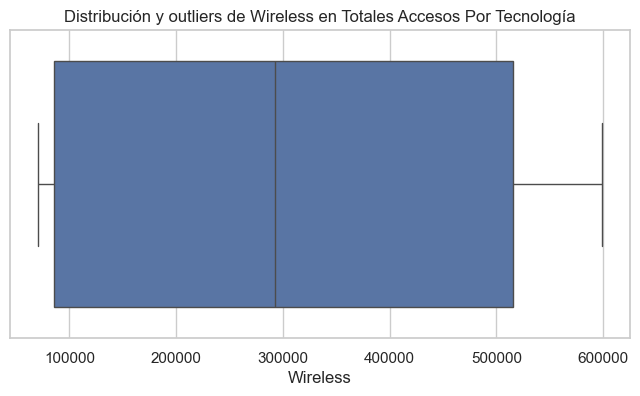

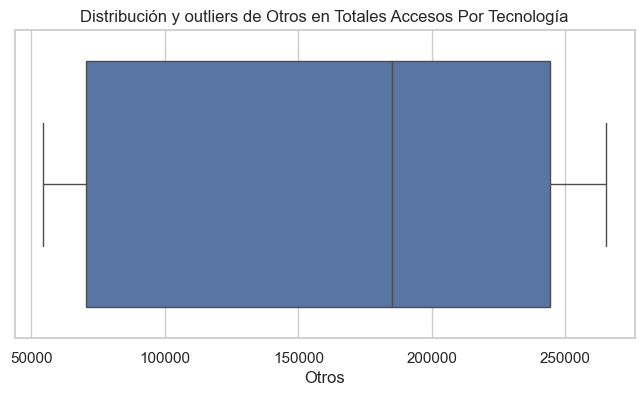

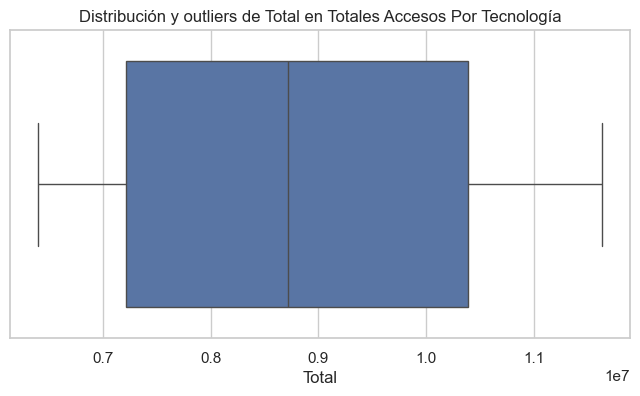

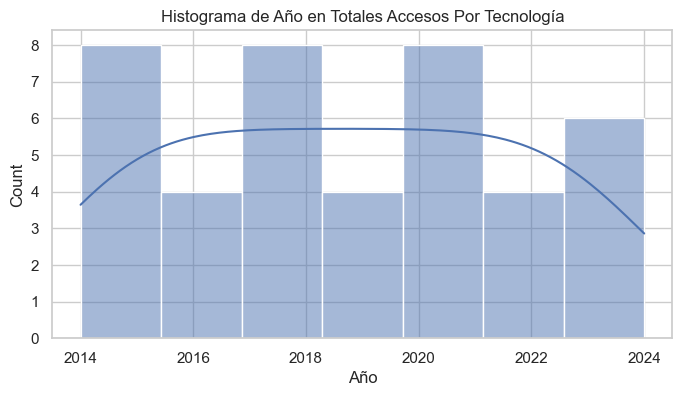

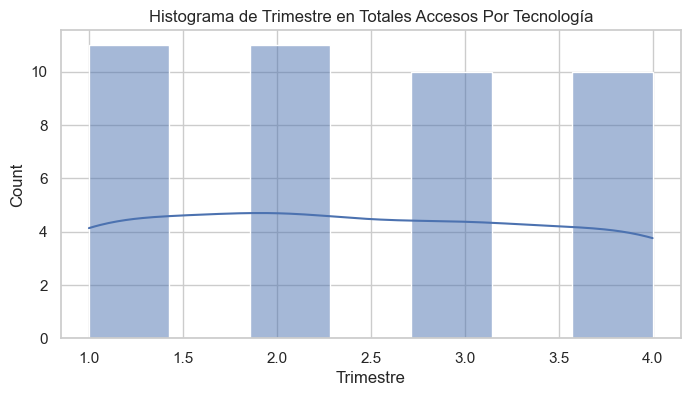

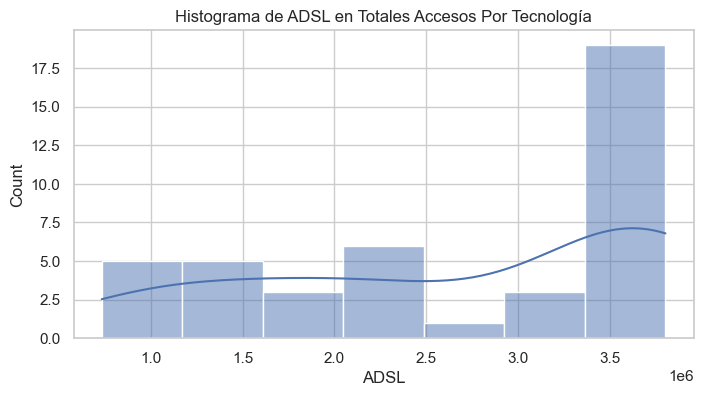

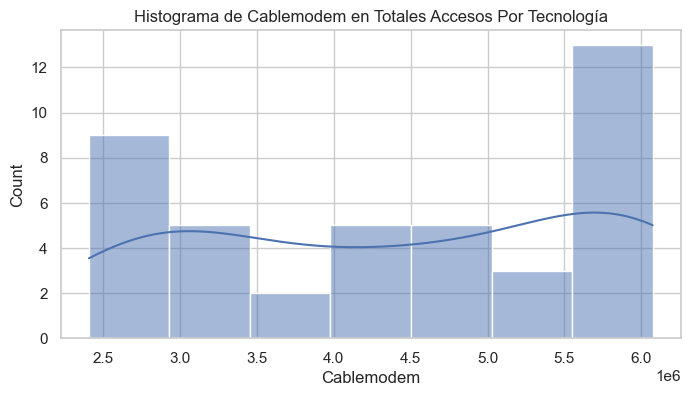

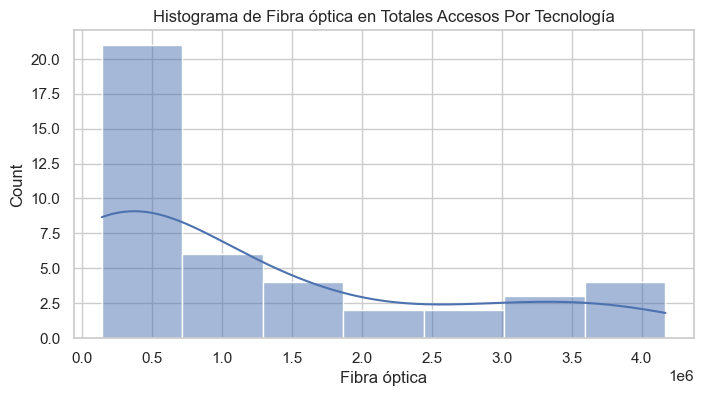

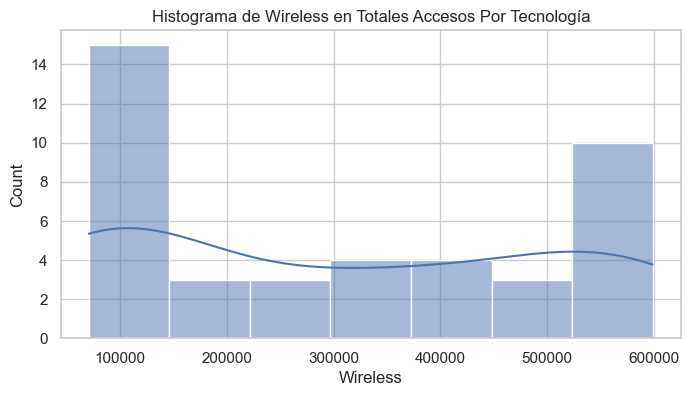

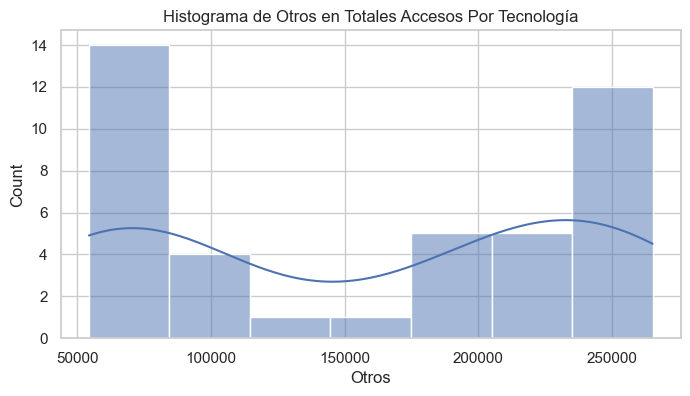

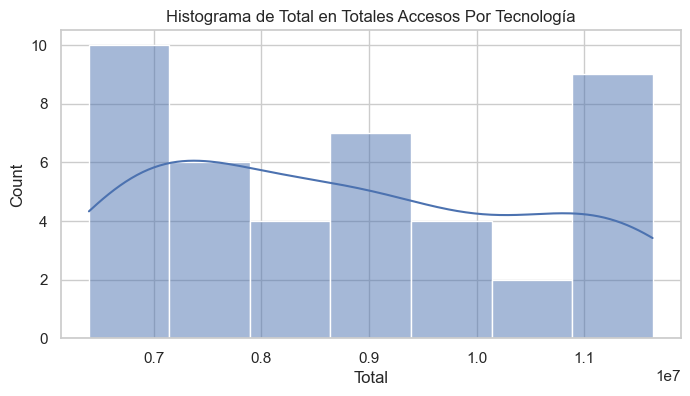


--- Análisis de la hoja: Accesos Por Tecnología ---
Primeras filas:


Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024         2        Catamarca    4951.0     10303.0       58355.0   
3  2024         2            Chaco    9448.0     57935.0       68944.0   
4  2024         2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


None


Estadísticas descriptivas:


ADSL    Cablemodem  Fibra óptica       Wireless         Otros  \
count  1.007000e+03  1.007000e+03  1.007000e+03    1007.000000   1007.000000   
mean   1.129309e+05  1.821583e+05  4.855699e+04   12542.229394   6497.041708   
std    2.362922e+05  4.460058e+05  1.758694e+05   20909.412762  11239.855091   
min    2.230000e+03  0.000000e+00  0.000000e+00       0.000000      2.000000   
25%    1.978950e+04  1.102050e+04  3.540000e+02     813.000000    334.500000   
50%    4.396700e+04  4.075000e+04  3.015000e+03    5224.000000   1920.000000   
75%    8.722000e+04  7.678350e+04  2.925700e+04   14367.500000   7548.000000   
max    1.586343e+06  2.797700e+06  1.849476e+06  138638.000000  73415.000000   

              Total  
count  1.007000e+03  
mean   3.626854e+05  
std    7.773137e+05  
min    1.255700e+04  
25%    6.241150e+04  
50%    1.139150e+05  
75%    1.956520e+05  
max    5.011620e+06


Valores faltantes por columna:


Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

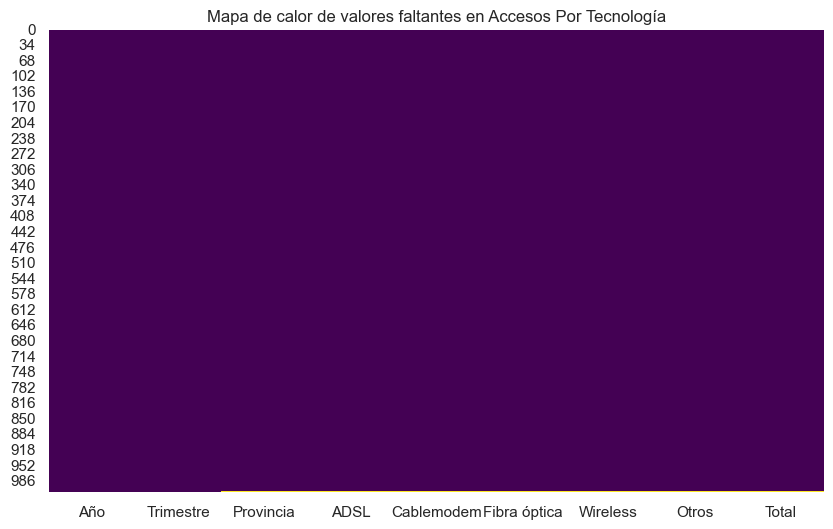

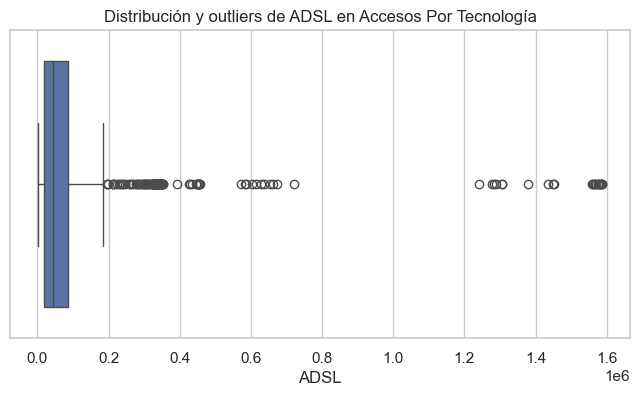

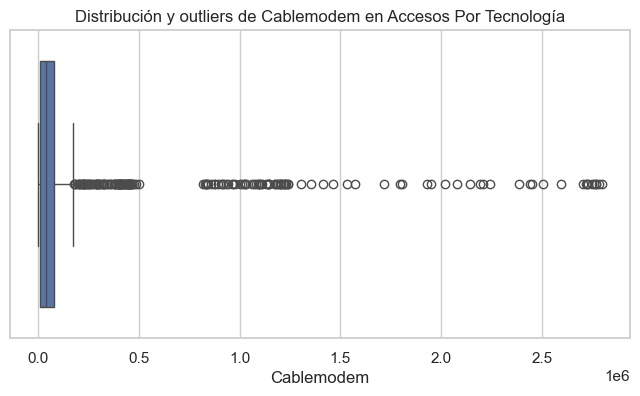

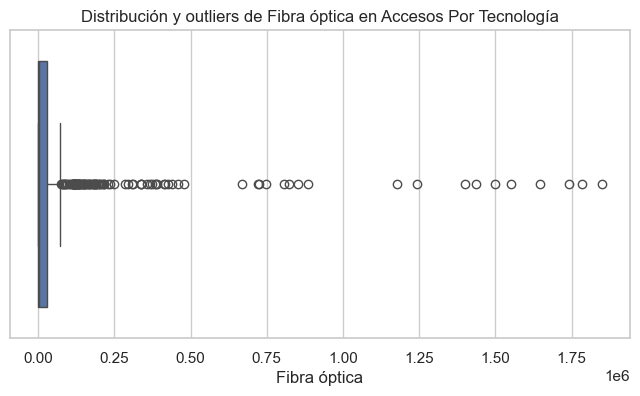

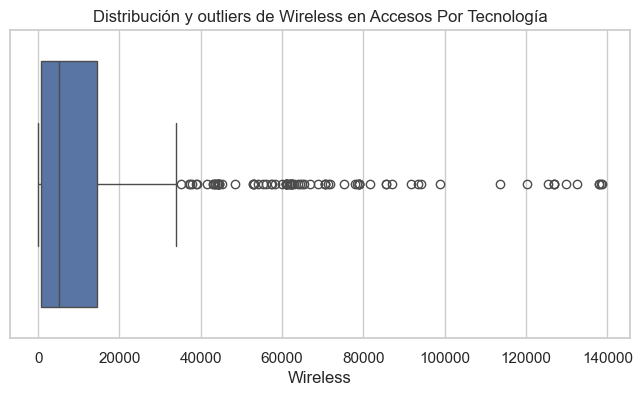

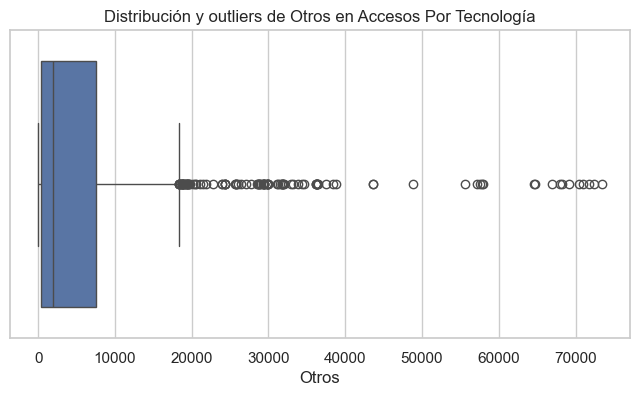

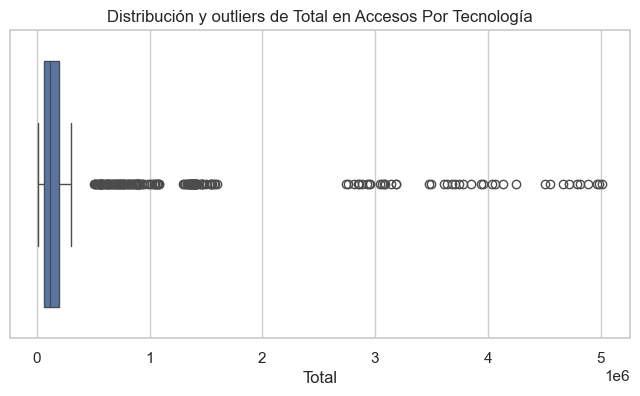

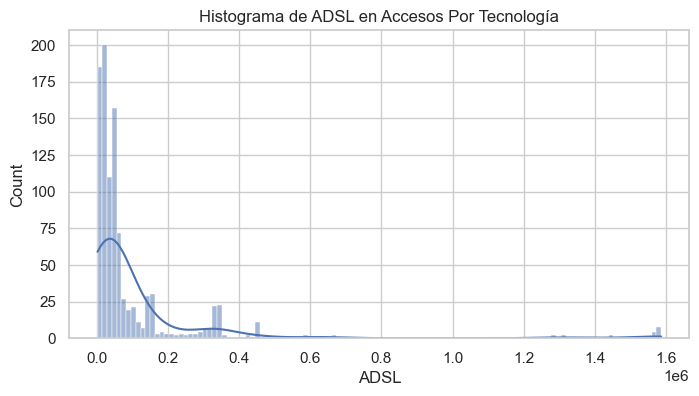

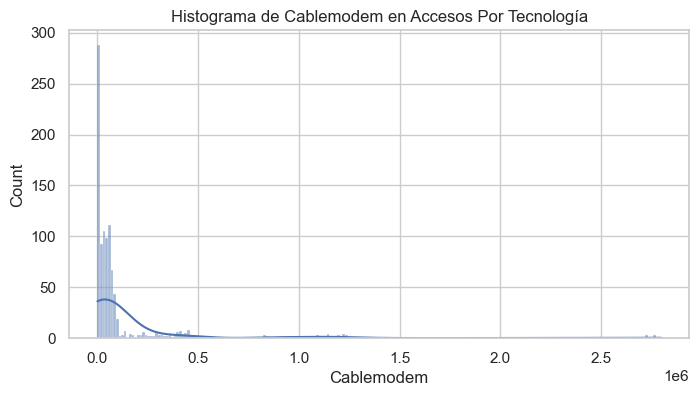

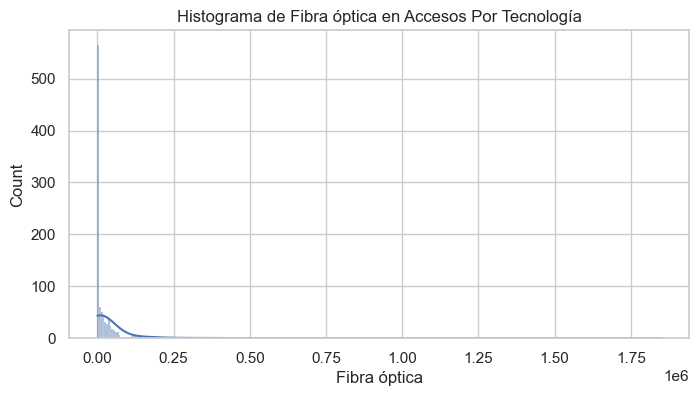

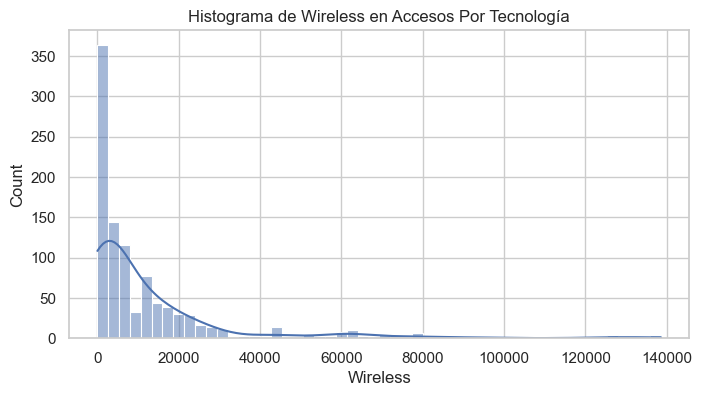

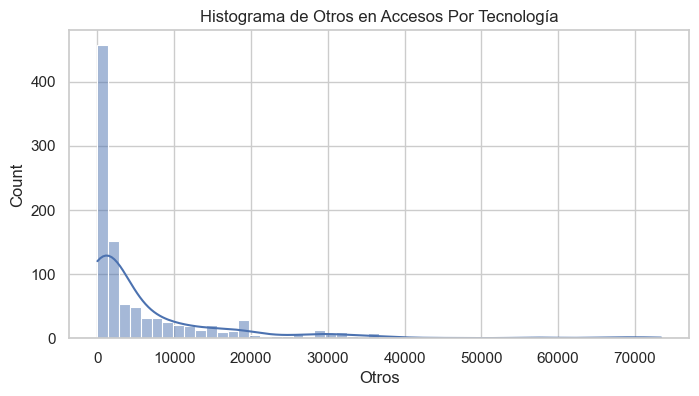

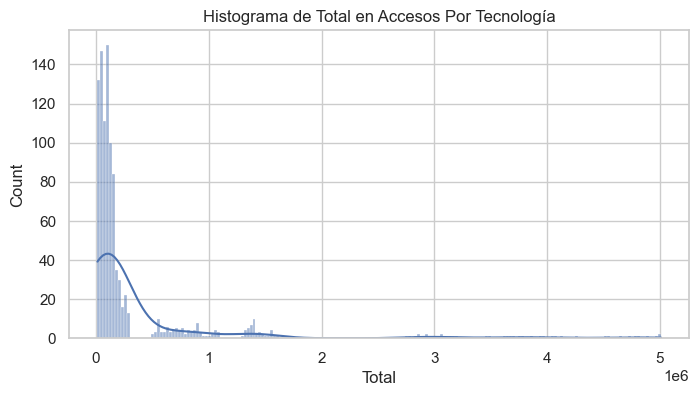


--- Análisis de la hoja: Penetración-poblacion ---
Primeras filas:


Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


None


Estadísticas descriptivas:


Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727248
std       3.021445     1.114426                  9.240063
min    2014.000000     1.000000                  2.723000
25%    2016.000000     1.000000                  9.018188
50%    2019.000000     2.000000                 13.674812
75%    2021.000000     3.000000                 20.323973
max    2024.000000     4.000000                 52.236739


Valores faltantes por columna:


Series([], dtype: int64)

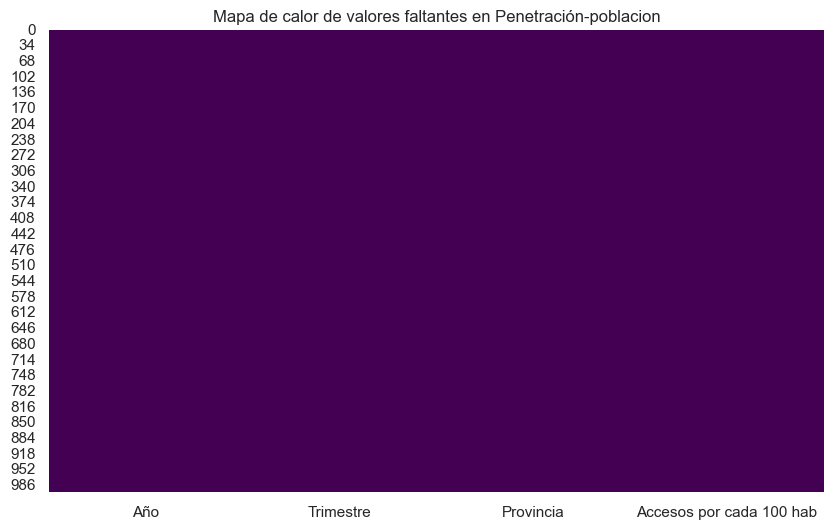

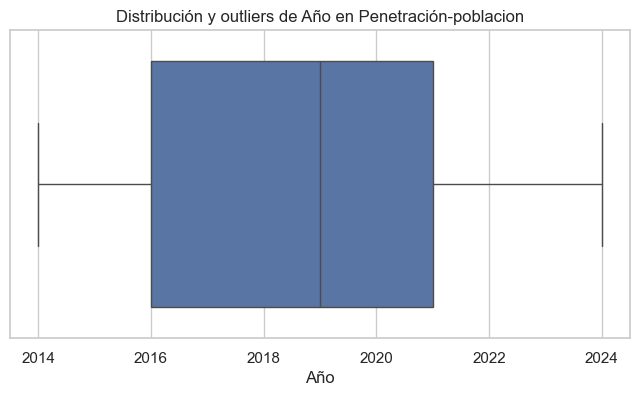

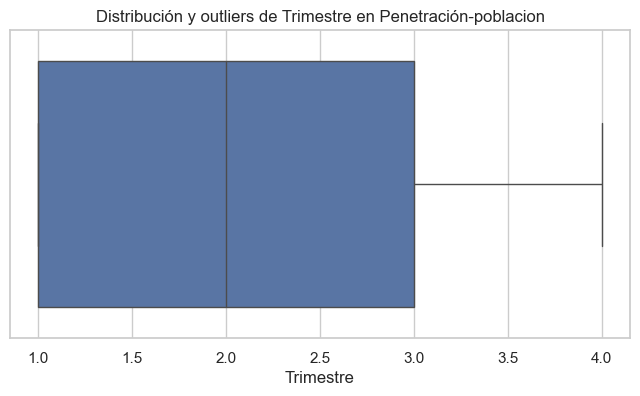

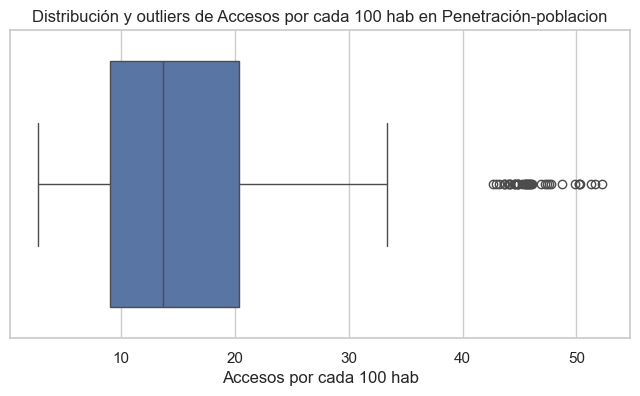

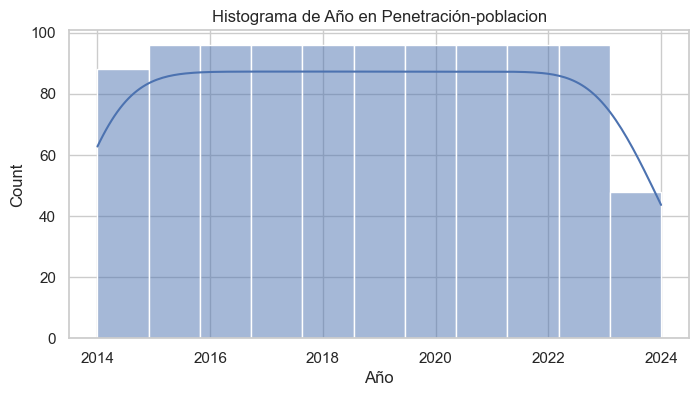

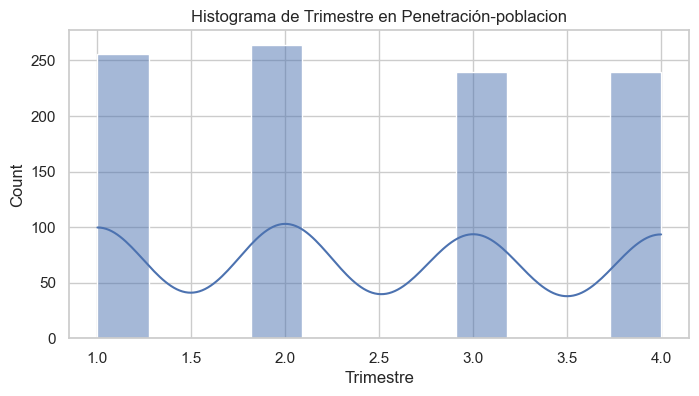

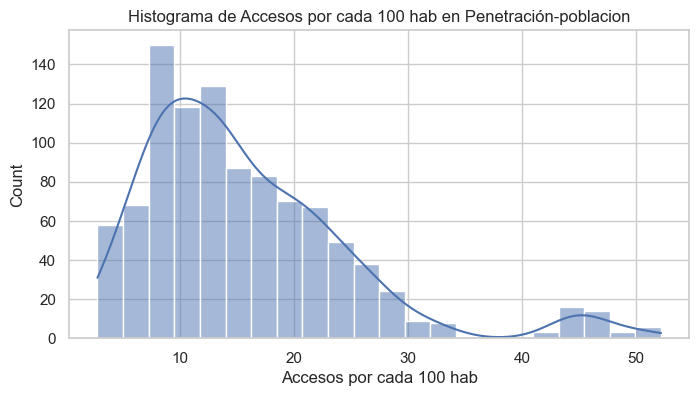


--- Análisis de la hoja: Penetracion-hogares ---
Primeras filas:


Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


None


Estadísticas descriptivas:


Año    Trimestre  Accesos por cada 100 hogares
count  1000.000000  1000.000000                   1000.000000
mean   2018.800000     2.464000                     52.794973
std       3.021445     1.114426                     24.135063
min    2014.000000     1.000000                      9.513970
25%    2016.000000     1.000000                     33.957657
50%    2019.000000     2.000000                     50.133004
75%    2021.000000     3.000000                     67.010861
max    2024.000000     4.000000                    124.061394


Valores faltantes por columna:


Series([], dtype: int64)

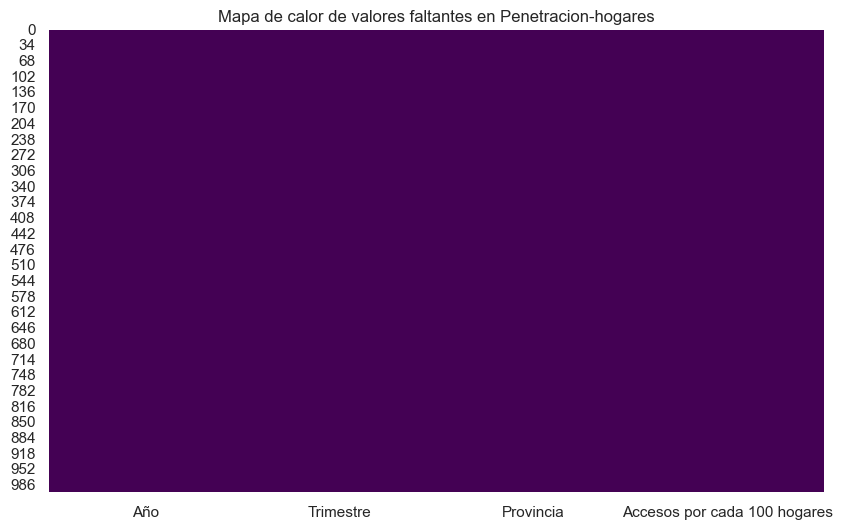

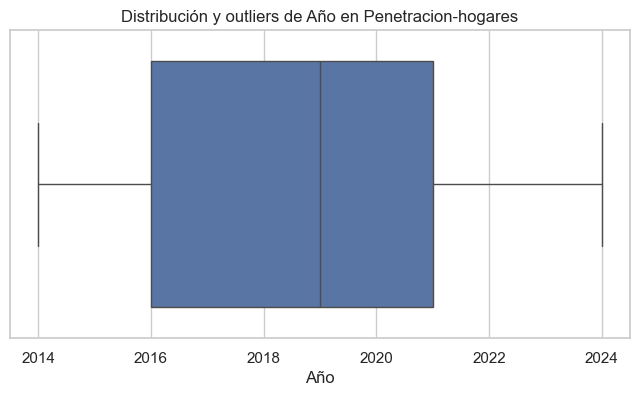

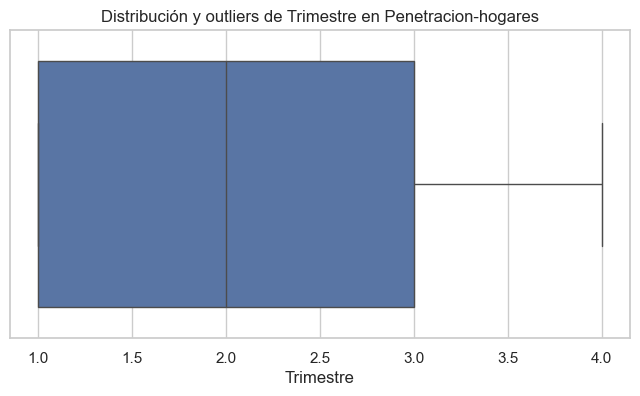

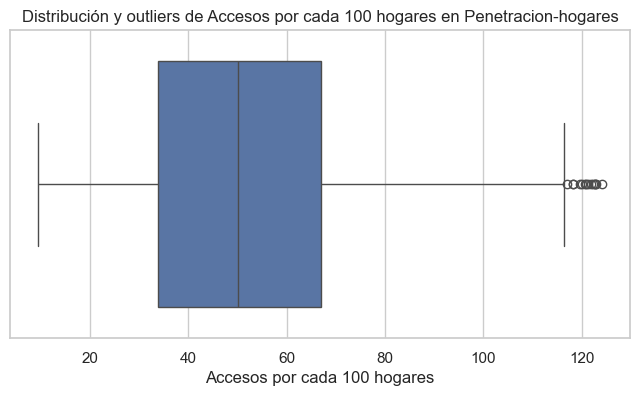

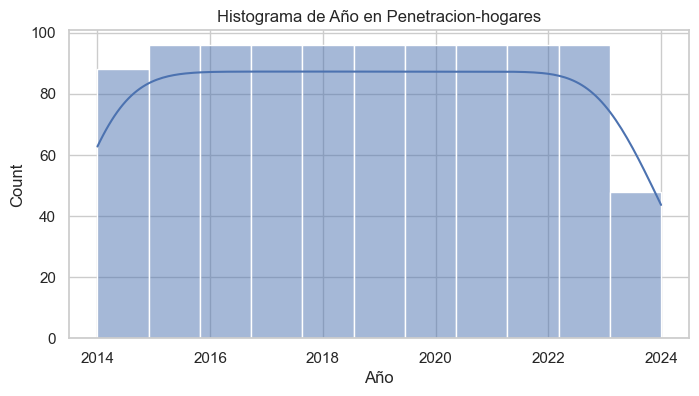

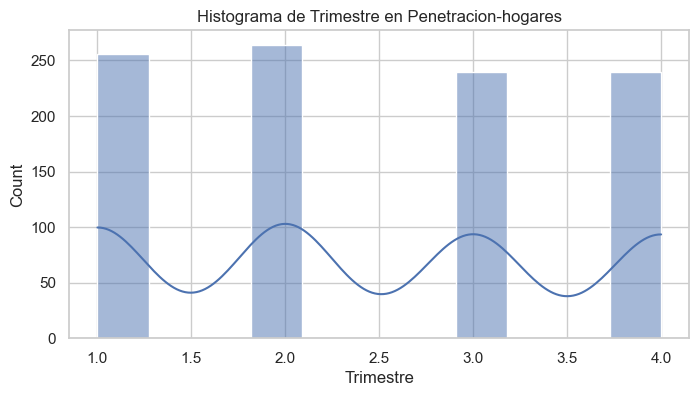

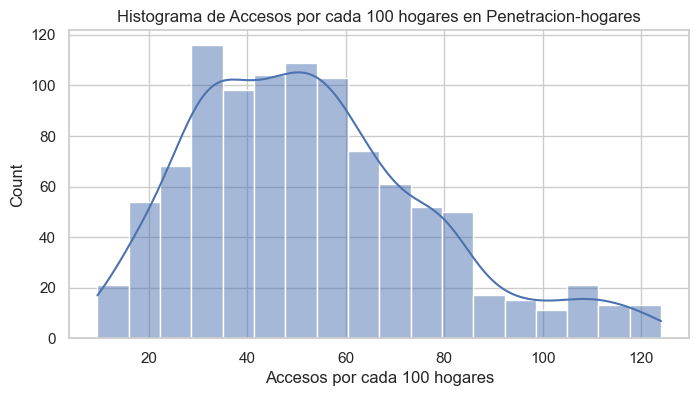


--- Análisis de la hoja: Penetracion-totales ---
Primeras filas:


Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


None


Estadísticas descriptivas:


Año  Trimestre  Accesos por cada 100 hogares  \
count    42.000000  42.000000                     42.000000   
mean   2018.761905   2.452381                     63.201813   
std       3.074756   1.130560                      9.950321   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.250000                     53.784644   
50%    2019.000000   2.000000                     62.667764   
75%    2021.000000   3.000000                     72.527011   
max    2024.000000   4.000000                     78.890000   

       Accesos por cada 100 hab  
count                 42.000000  
mean                  19.574600  
std                    3.268665  
min                   15.050104  
25%                   16.519507  
50%                   19.395586  
75%                   22.603664  
max                   24.790000


Valores faltantes por columna:


Series([], dtype: int64)

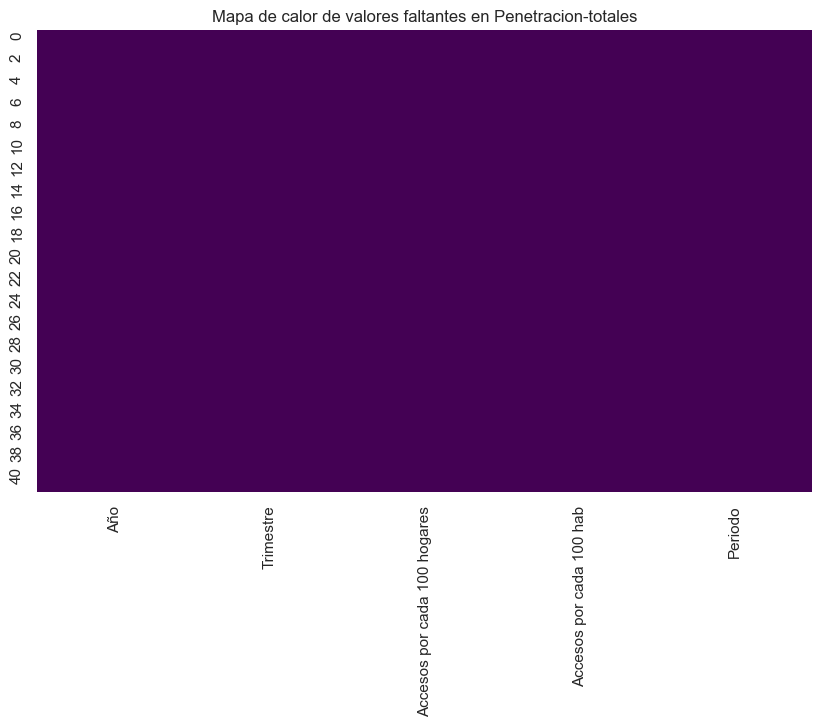

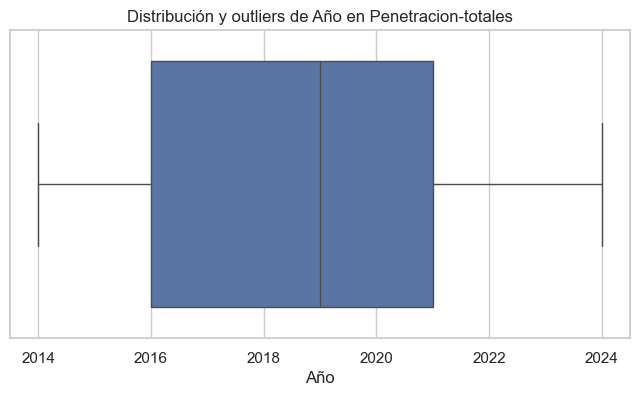

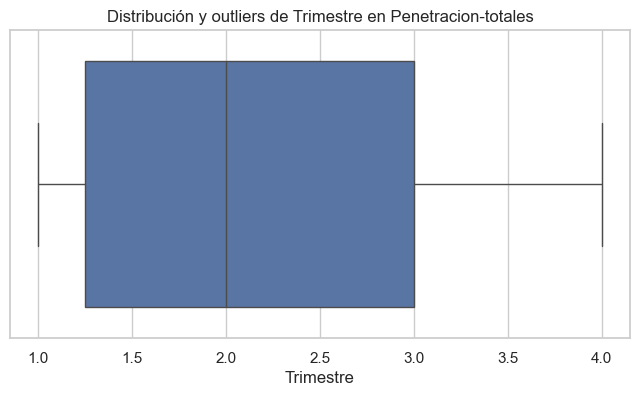

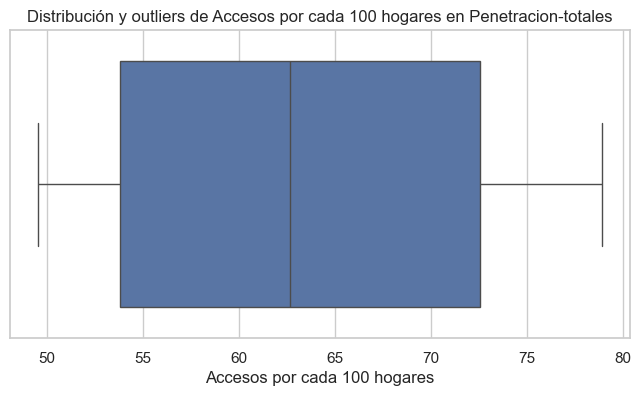

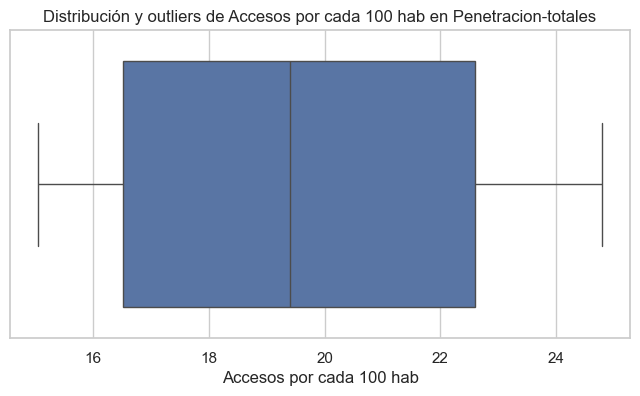

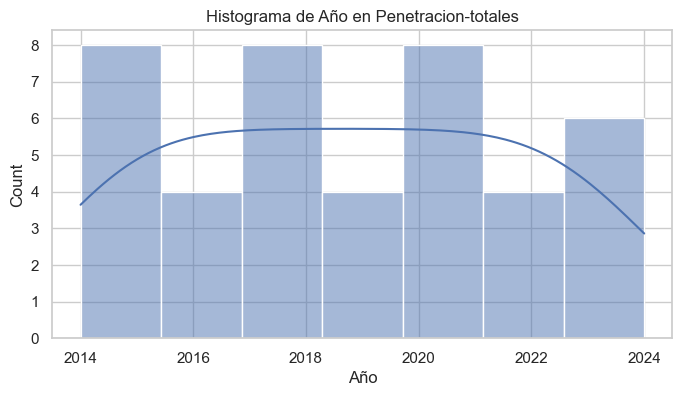

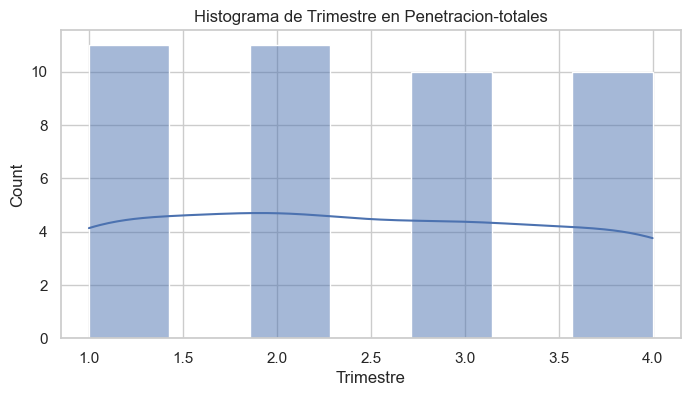

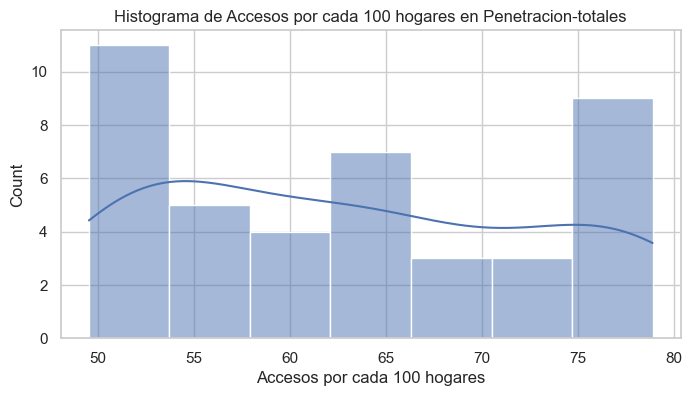

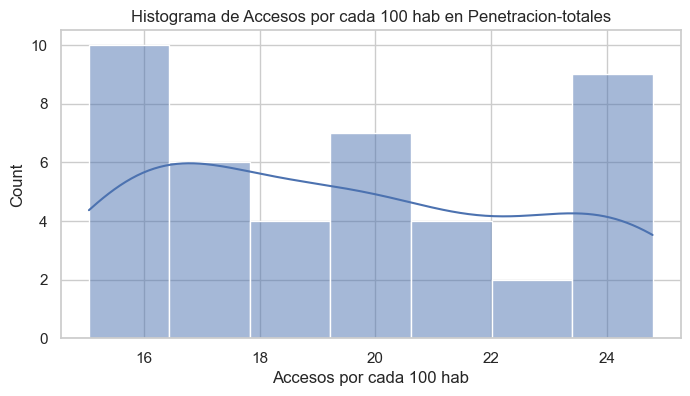


--- Análisis de la hoja: Totales Accesos por rango ---
Primeras filas:


Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          2           28151                    67024   
1  2024          1           28801                    69355   
2  2023          4           29708                    71742   
3  2023          3           30274                    80609   
4  2023          2           30827                    79405   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 840200                  911374                   662649   
1                 866152                  950930                   672155   
2                 900253                  978108                   697232   
3                 945608                  998725                   720084   
4                 963510                 1028250                   734125   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   348253         8357088  341368  11556107  
1                   353896         8363694  328173  11633156  
2                   350290         8224736  295592  11547661  
3                   350918         8003269  277421  11406908  
4                   364730         7775095  275955  11251897


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


None


Estadísticas descriptivas:


Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
count    42.000000  42.000000       42.000000                42.000000   
mean   2018.761905   2.452381    46756.595238            215615.285714   
std       3.074756   1.130560    48922.973593            192134.704593   
min    2014.000000   1.000000     5675.000000             28521.000000   
25%    2016.000000   1.250000    29027.750000             69951.750000   
50%    2019.000000   2.000000    34960.000000            150273.000000   
75%    2021.000000   3.000000    41057.500000            279159.250000   
max    2024.000000   4.000000   241713.000000            687619.000000   

       Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
count           4.200000e+01            4.200000e+01             4.200000e+01   
mean            3.176365e+06            9.154819e+05             8.844276e+05   
std             1.552136e+06            2.293758e+05             4.515900e+05   
min             8.402000e+05            2.891820e+05             1.011270e+05   
25%             1.692724e+06            8.623452e+05             6.774355e+05   
50%             3.313002e+06            9.787620e+05             7.929725e+05   
75%             4.780396e+06            1.058518e+06             1.022656e+06   
max             5.153437e+06            1.245333e+06             2.068087e+06   

       Entre 20 Mbps y 30 Mbps  Más de 30 Mbps          OTROS         Total  
count             4.200000e+01    4.200000e+01      42.000000  4.200000e+01  
mean              4.783656e+05    2.909772e+06  154081.071429  8.780865e+06  
std               4.334343e+05    3.138715e+06  132453.955052  1.772655e+06  
min               3.450000e+02    1.159500e+04       0.000000  6.272846e+06  
25%               1.358035e+05    3.291400e+04       0.000000  7.151638e+06  
50%               3.612495e+05    1.408279e+06  176235.500000  8.720658e+06  
75%               5.925450e+05    5.761285e+06  242214.000000  1.038873e+07  
max               1.688748e+06    8.363694e+06  414754.000000  1.163316e+07


Valores faltantes por columna:


Series([], dtype: int64)

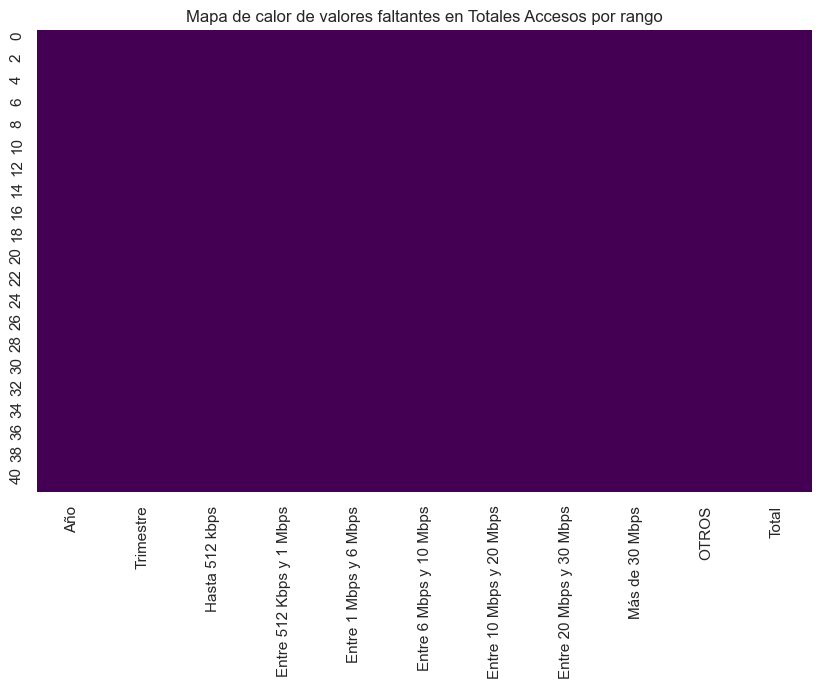

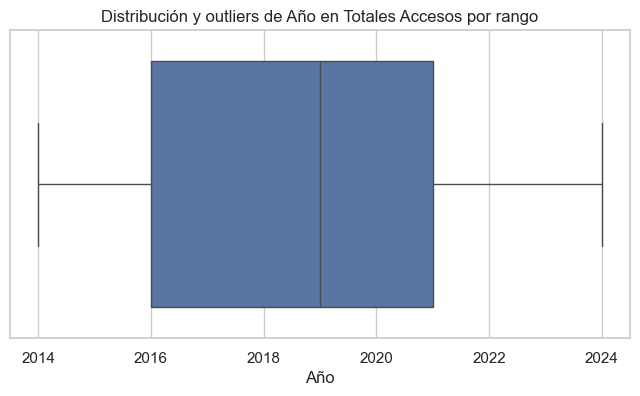

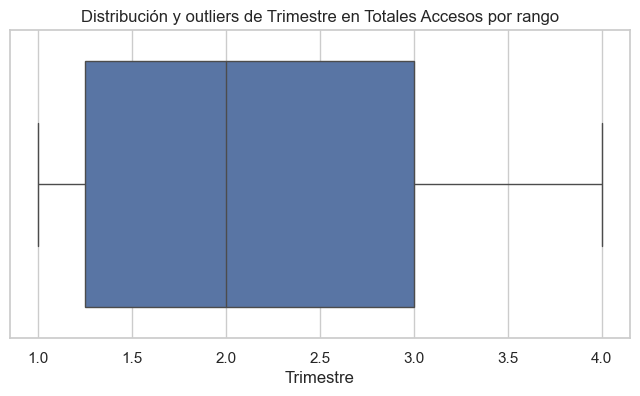

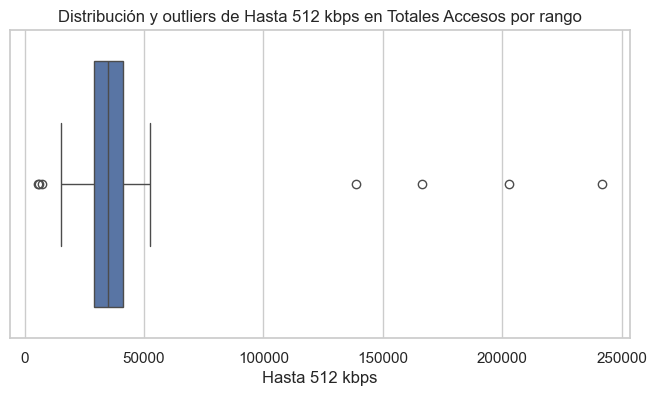

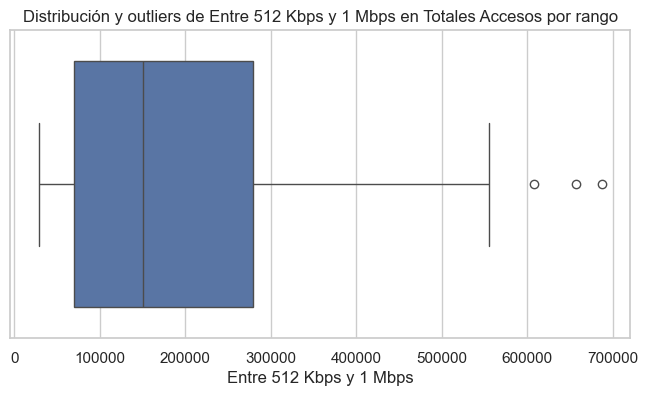

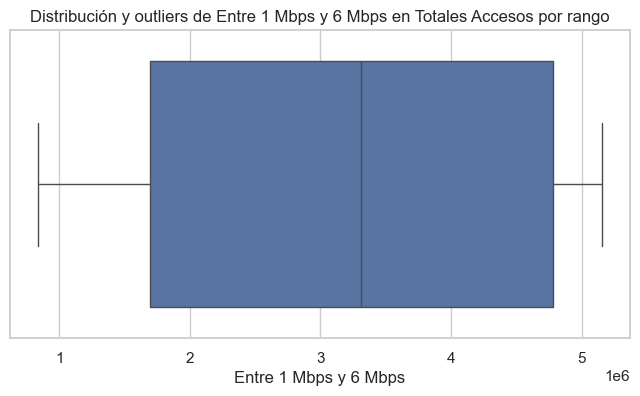

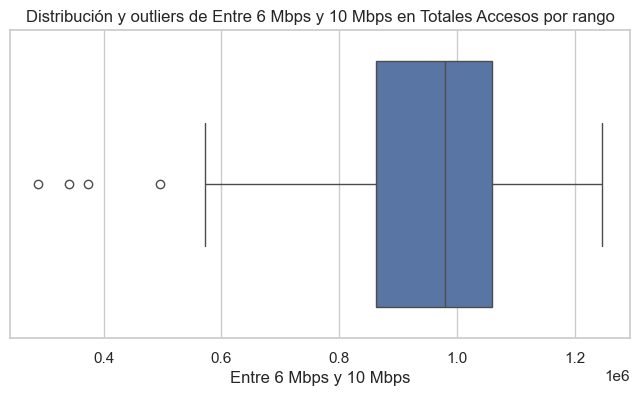

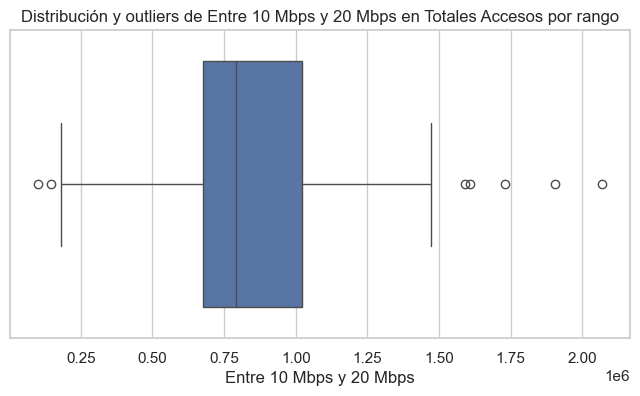

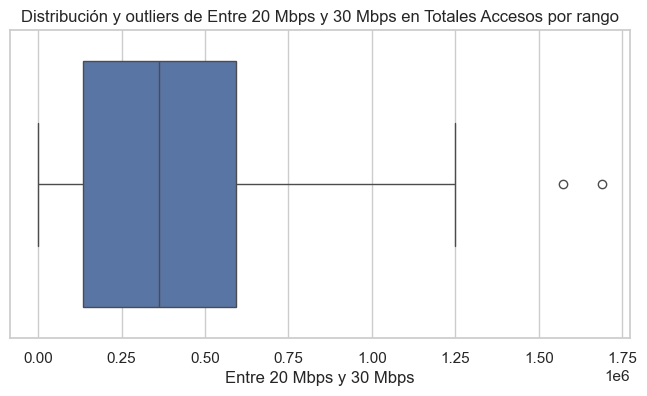

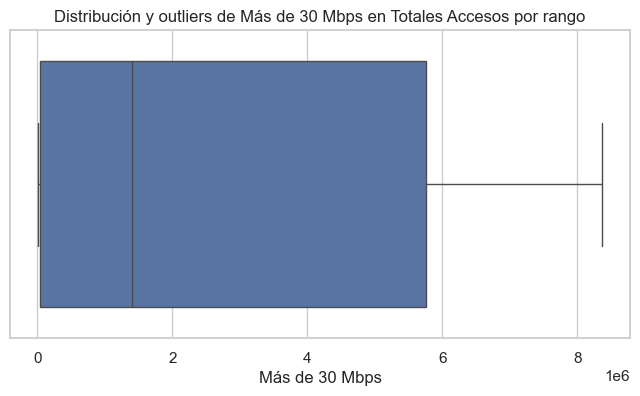

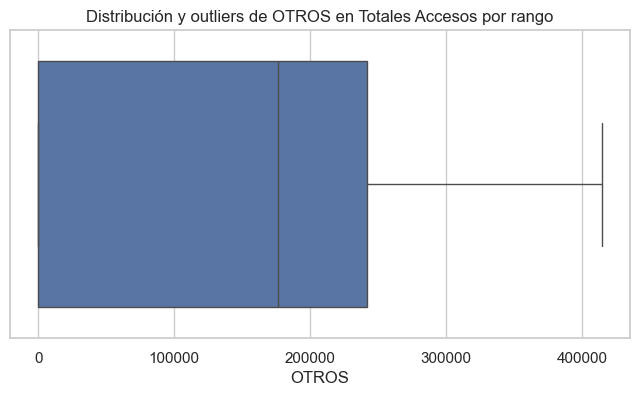

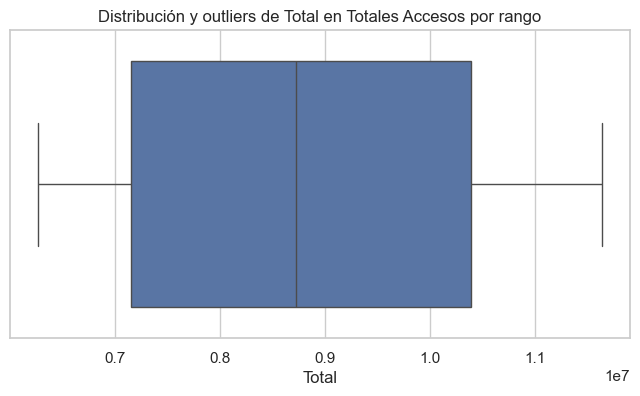

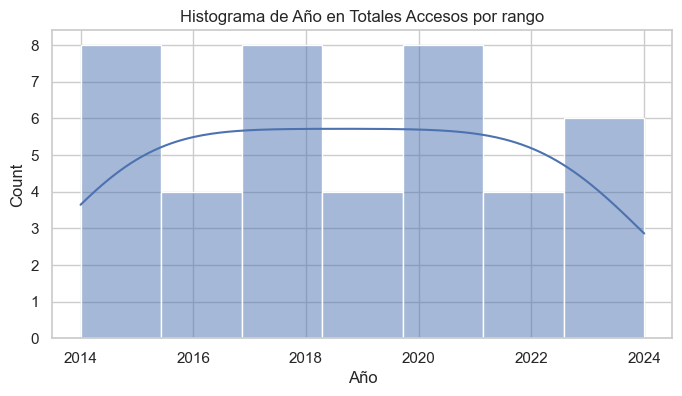

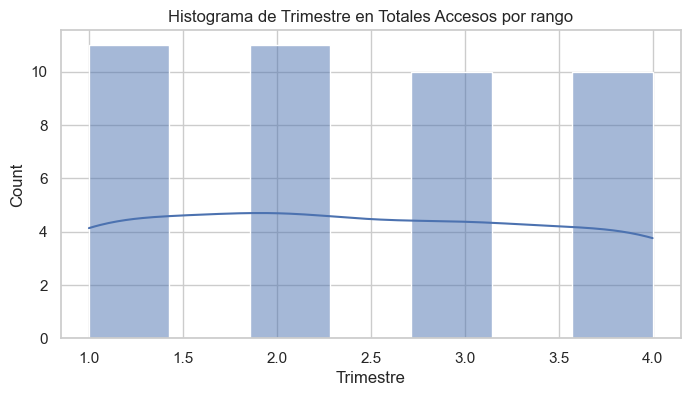

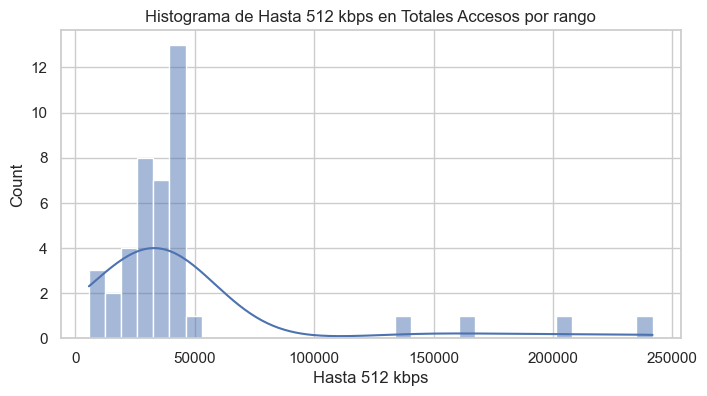

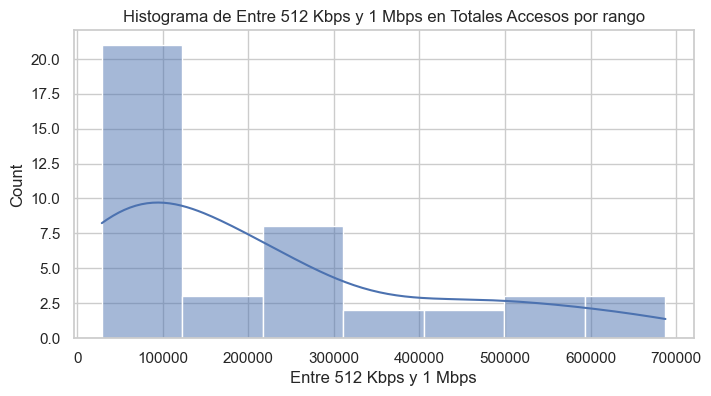

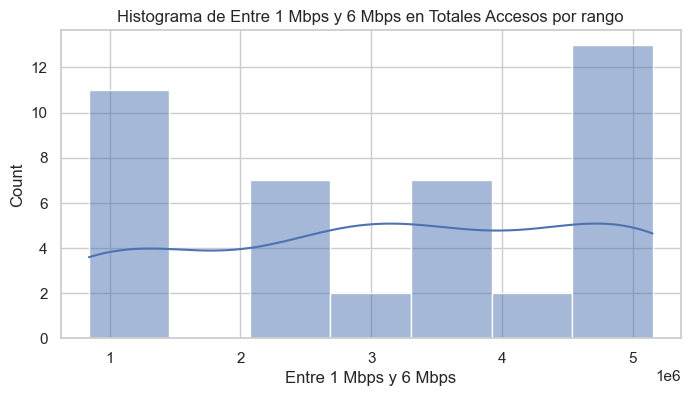

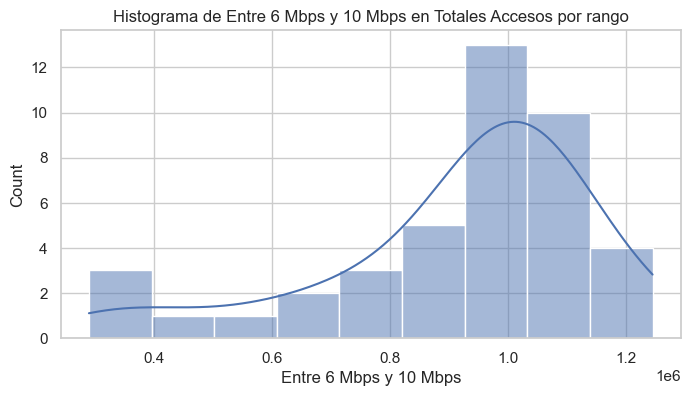

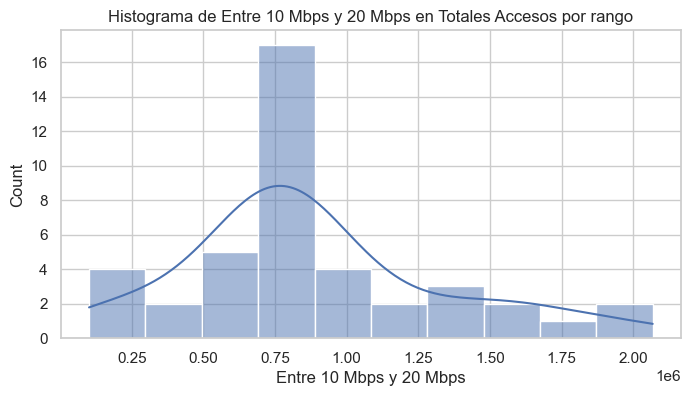

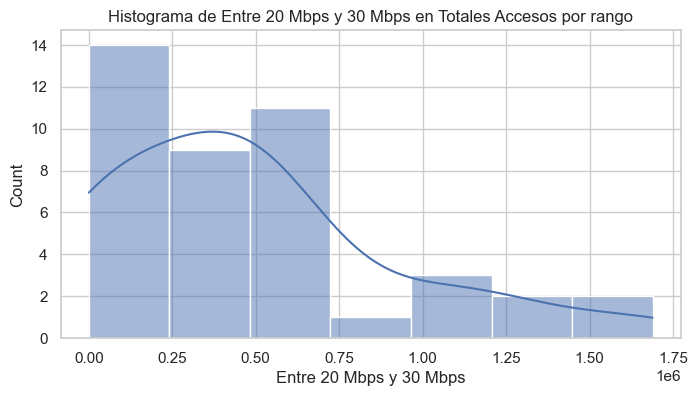

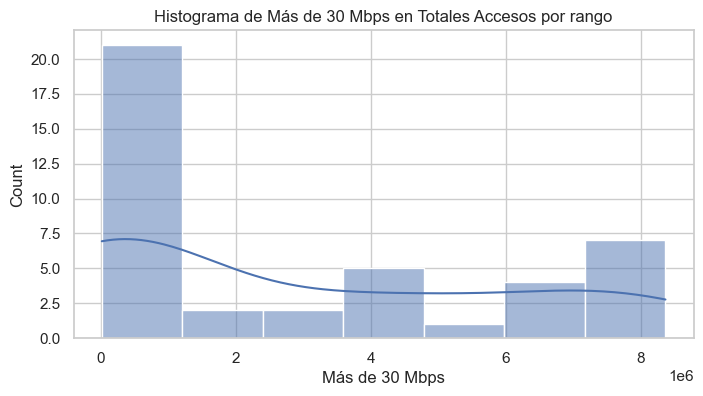

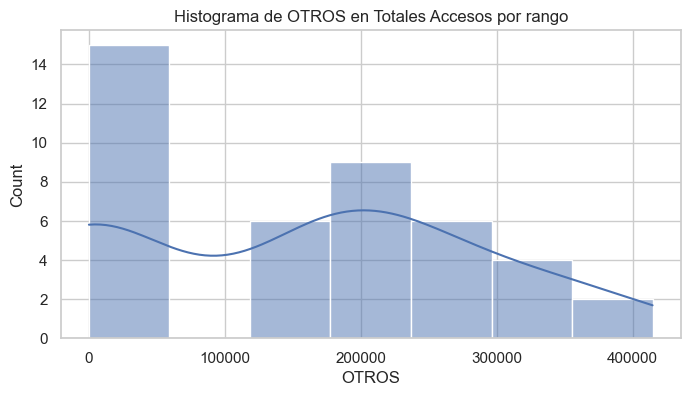

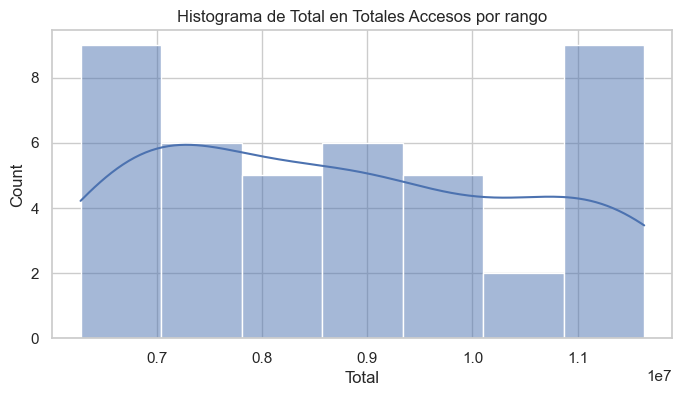


--- Análisis de la hoja: Accesos por rangos ---
Primeras filas:


Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   
3  2024          2            Chaco           236.0                349.0   
4  2024          2           Chubut           125.0               1139.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   
3            14594.0              8336.0               6208.0   
4            43699.0             31971.0              22696.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106302.0  4020395.0  125547.0  4989380.0  
1               5633.0  1355333.0       0.0  1463599.0  
2               1279.0    63954.0      53.0    75074.0  
3               6454.0   107707.0    3208.0   147092.0  
4              19827.0    38212.0   16554.0   174223.0


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


None


Estadísticas descriptivas:


Año    Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count  1000.000000  1000.000000     1000.000000          1000.000000   
mean   2018.824000     2.464000     1953.317000          8864.257000   
std       3.058493     1.114426    12676.575806         20312.520997   
min    2014.000000     1.000000        6.000000             0.000000   
25%    2016.000000     1.000000       43.250000           389.750000   
50%    2019.000000     2.000000      107.000000          2061.000000   
75%    2021.000000     3.000000      466.250000          6851.500000   
max    2024.000000     4.000000   238920.000000        171244.480000   

       + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
count       1.000000e+03         1000.000000          1000.000000   
mean        1.327725e+05        38408.510000         37138.329000   
std         3.222569e+05        64156.365883         88290.744464   
min         1.124000e+03            0.000000             0.000000   
25%         2.381250e+04         3876.750000          2706.750000   
50%         4.213250e+04        13932.000000         10503.000000   
75%         8.371025e+04        42593.500000         26463.750000   
max         2.299705e+06       403575.000000        886678.000000   

       + 20 Mbps - 30 Mbps     + 30 Mbps          OTROS         Total  
count          1000.000000  1.000000e+03     994.000000  1.000000e+03  
mean          20091.330000  1.222098e+05    6510.467807  3.679094e+05  
std           69299.281156  4.657500e+05   15344.465875  7.899348e+05  
min               0.000000  0.000000e+00   -1945.000000  1.240600e+04  
25%              43.750000  1.500000e+01       0.000000  6.234225e+04  
50%            1658.000000  4.253500e+03     346.500000  1.136205e+05  
75%           10109.250000  4.339925e+04    6830.750000  1.969198e+05  
max          949093.000000  4.068292e+06  125547.000000  5.044557e+06


Valores faltantes por columna:


OTROS    6
dtype: int64

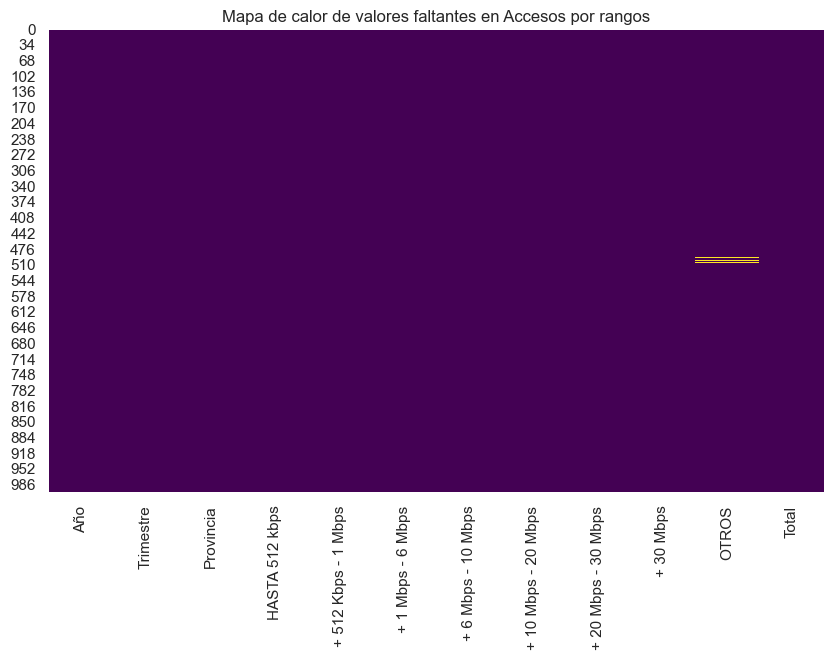

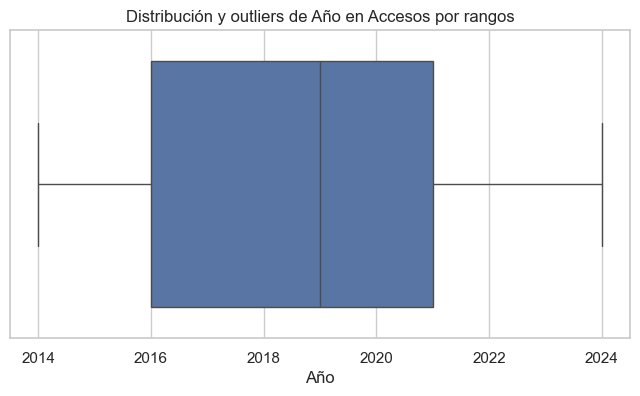

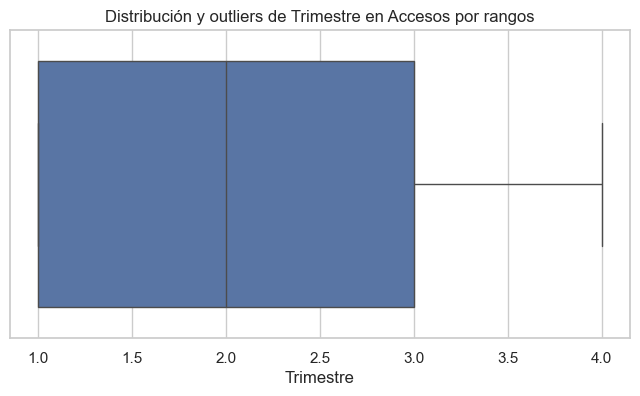

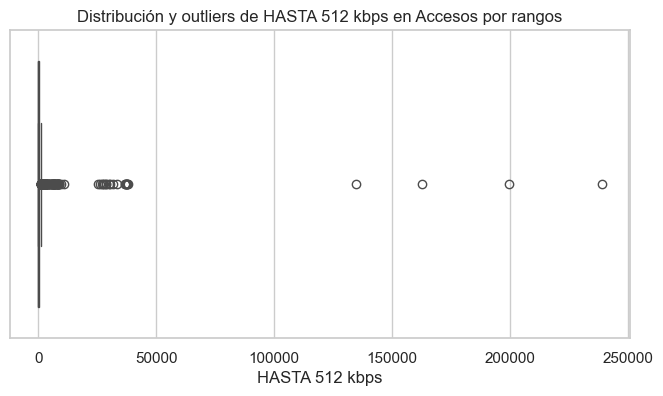

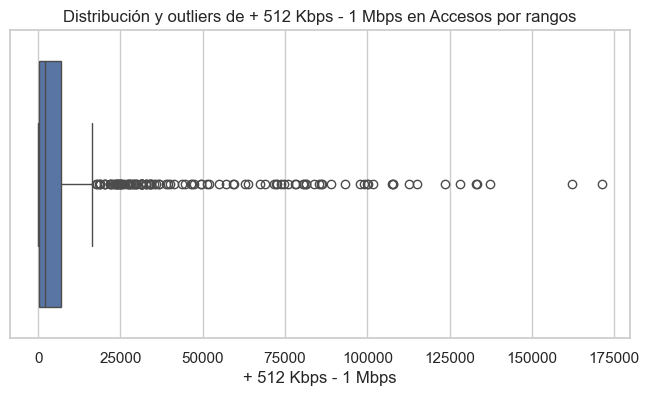

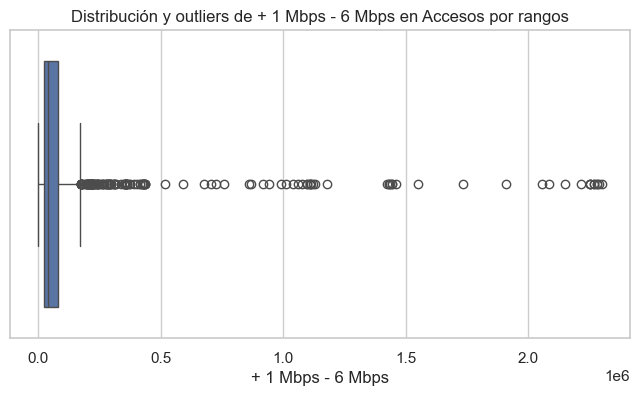

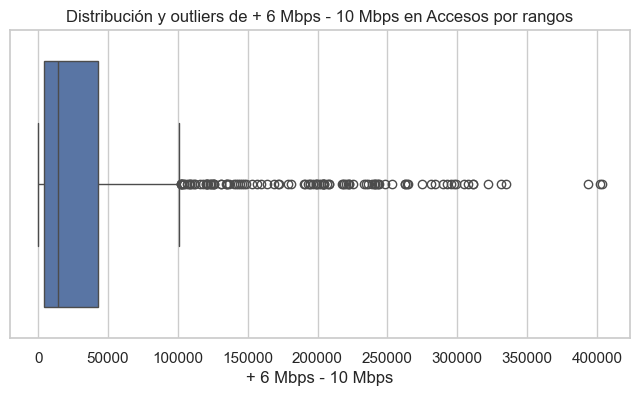

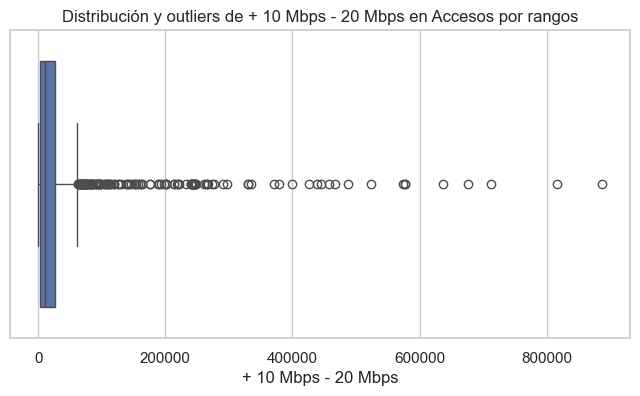

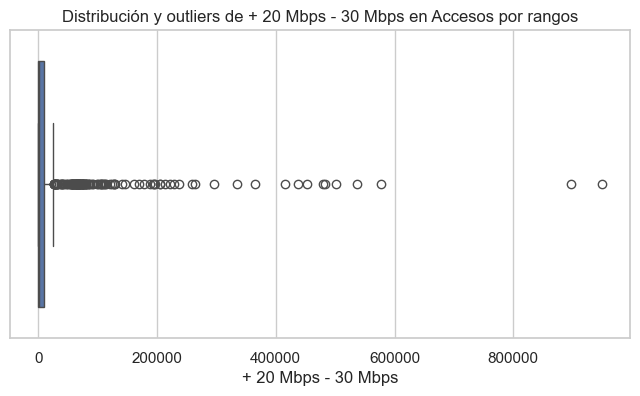

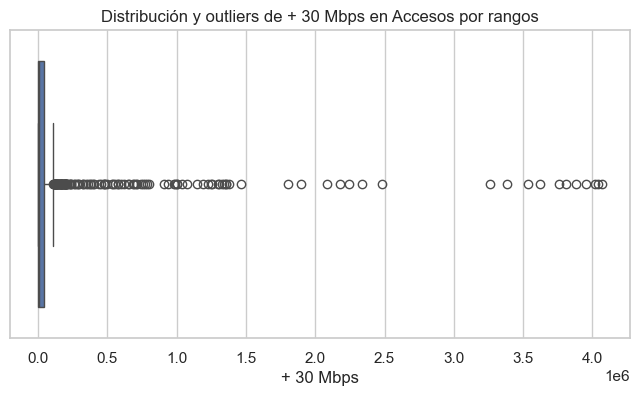

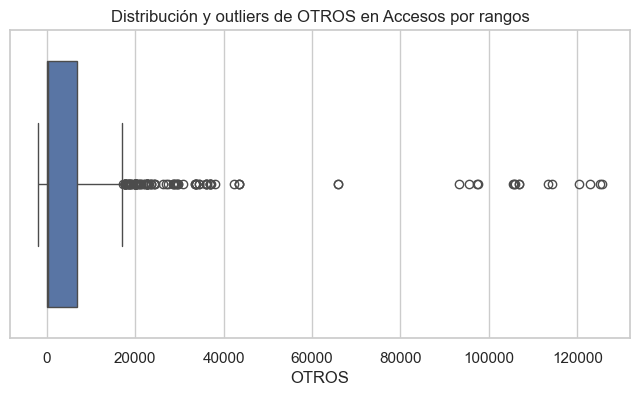

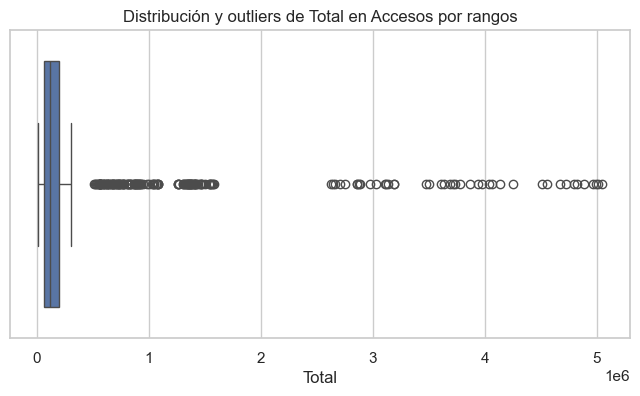

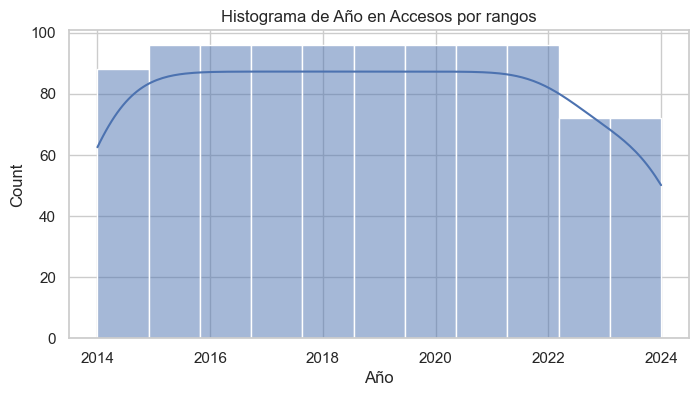

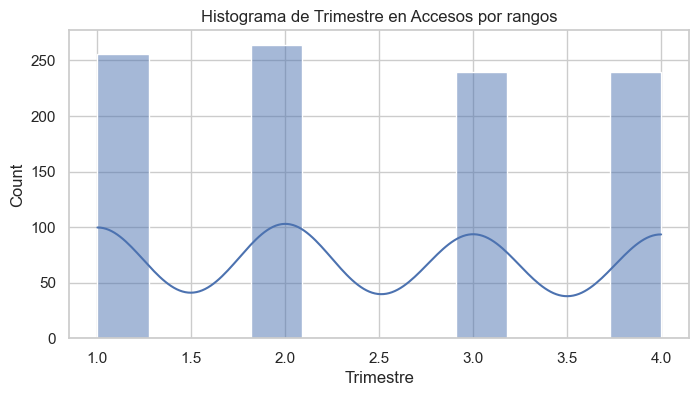

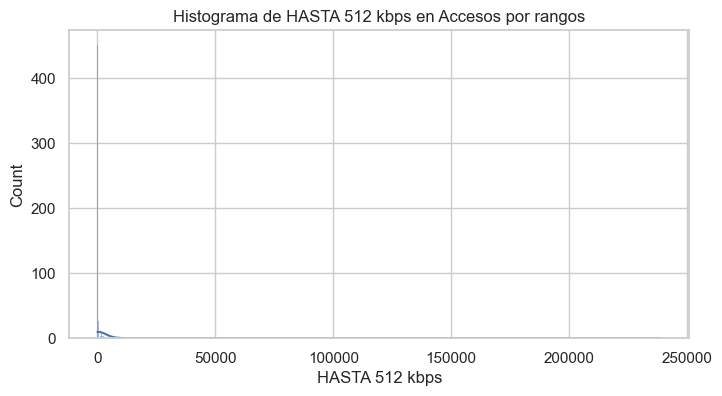

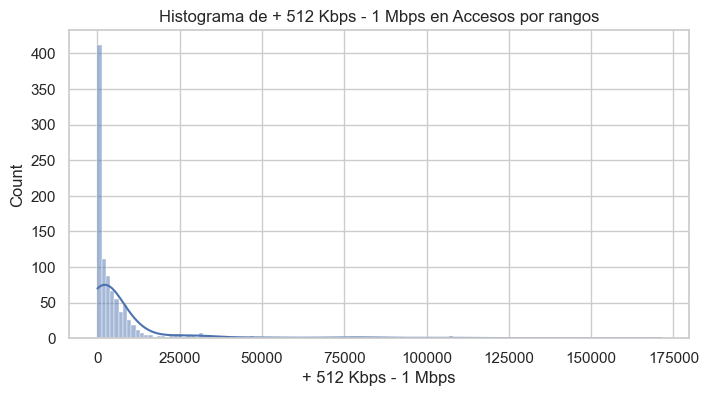

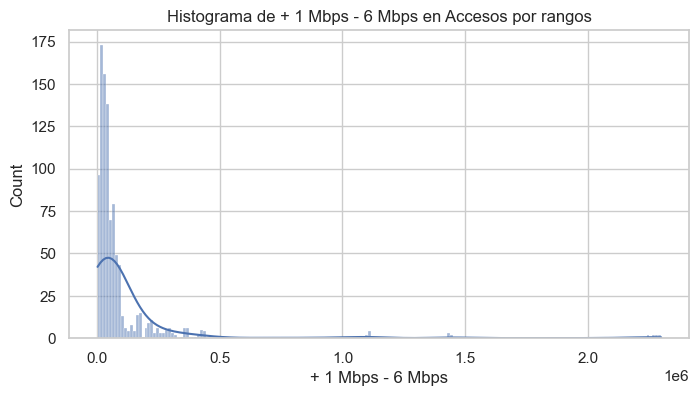

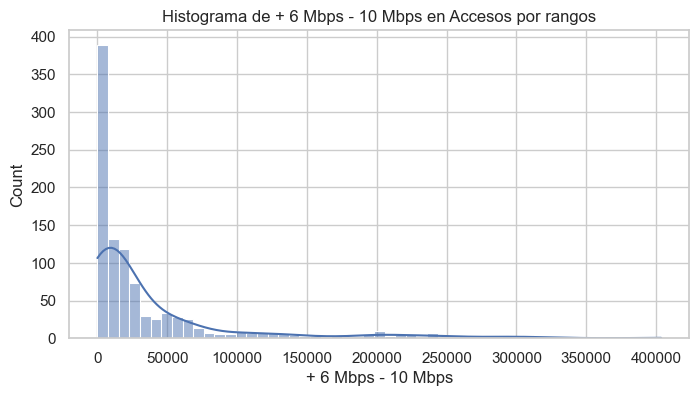

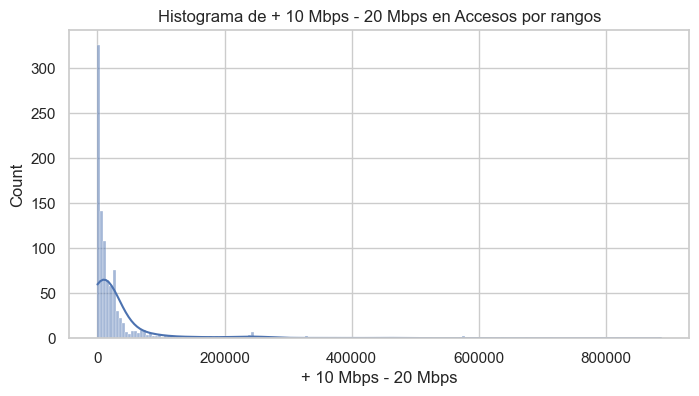

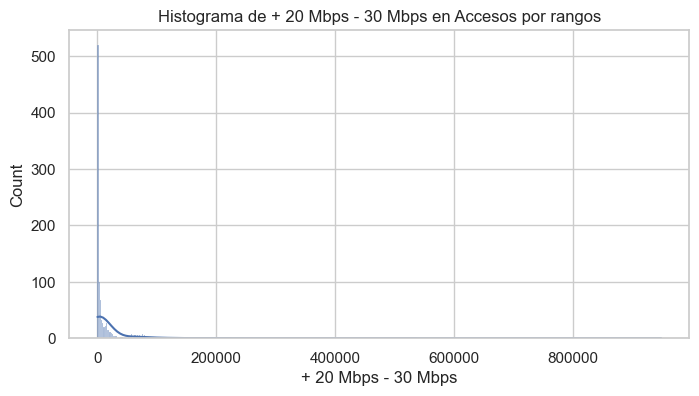

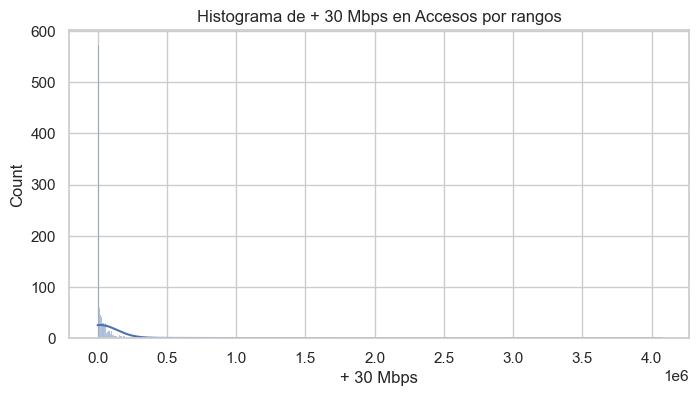

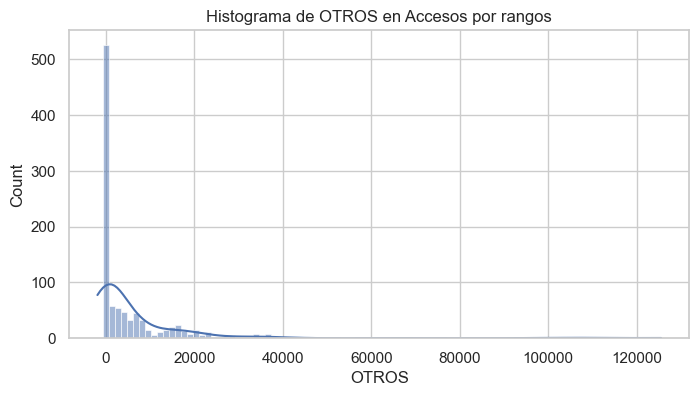

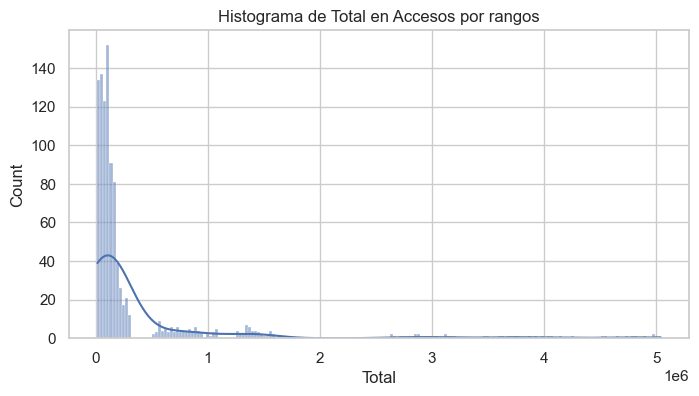


--- Análisis de la hoja: Dial-BAf ---
Primeras filas:


Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2024          2     Buenos Aires           4983480   5900.0  4989380
1  2024          2  Capital Federal           1461549   2050.0  1463599
2  2024          2        Catamarca             75073      1.0    75074
3  2024          2            Chaco            147087      5.0   147092
4  2024          2           Chubut            173366    857.0   174223


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1992 non-null   int64  
 1   Trimestre         1992 non-null   int64  
 2   Provincia         1992 non-null   object 
 3   Banda ancha fija  1992 non-null   int64  
 4   Dial up           1988 non-null   float64
 5   Total             1992 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.5+ KB


None


Estadísticas descriptivas:


Año    Trimestre  Banda ancha fija       Dial up         Total
count  1992.000000  1992.000000      1.992000e+03   1988.000000  1.992000e+03
mean   2018.698795     2.457831      3.650542e+05    902.104125  3.659545e+05
std       3.001697     1.122899      7.858852e+05   2281.691033  7.876088e+05
min    2014.000000     1.000000      1.219300e+04      0.000000  1.255700e+04
25%    2016.000000     1.000000      6.183400e+04      5.000000  6.223600e+04
50%    2019.000000     2.000000      1.123150e+05    137.000000  1.136630e+05
75%    2021.000000     3.000000      1.954710e+05    615.000000  1.954710e+05
max    2024.000000     4.000000      5.038657e+06  15229.000000  5.044557e+06


Valores faltantes por columna:


Dial up    4
dtype: int64

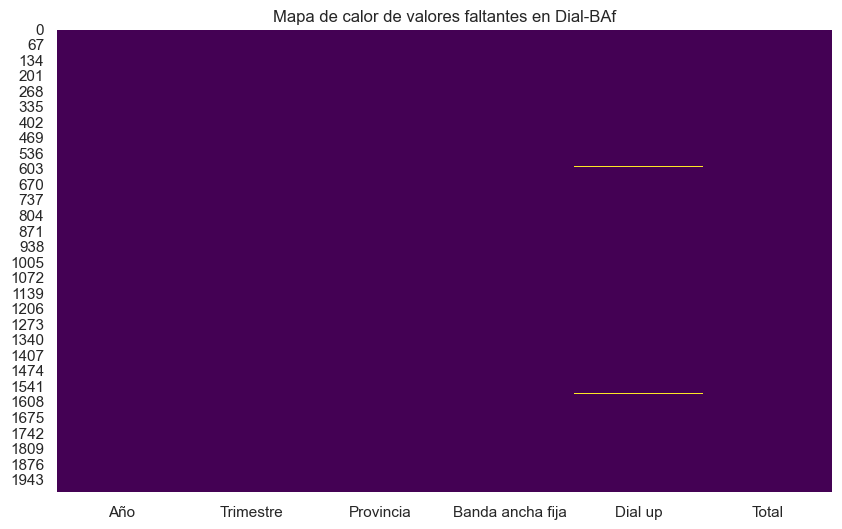

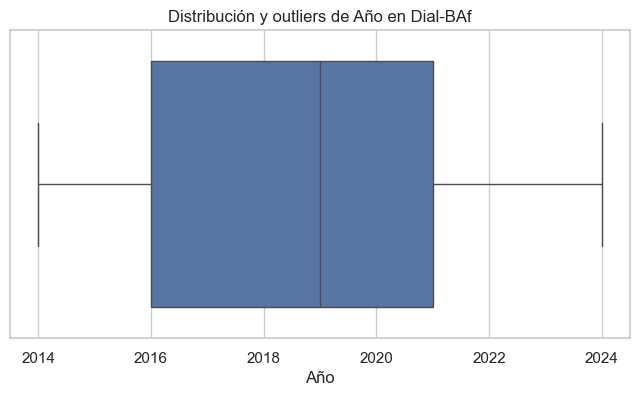

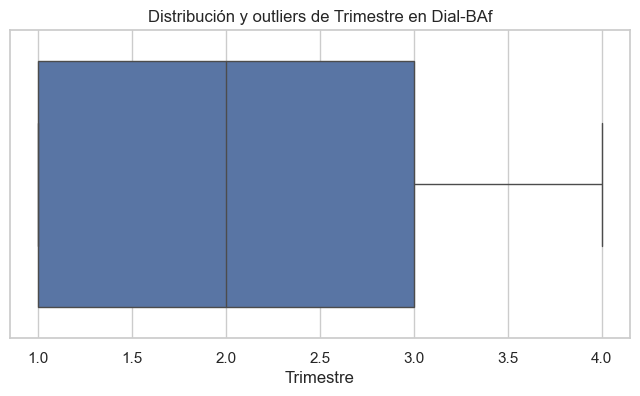

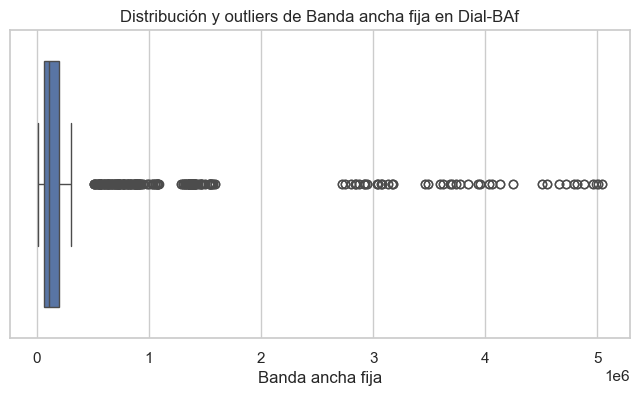

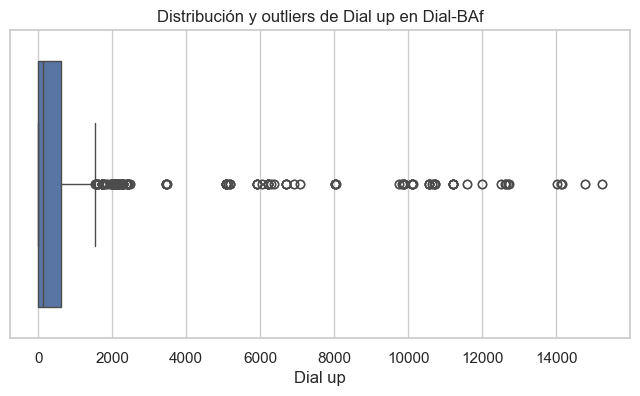

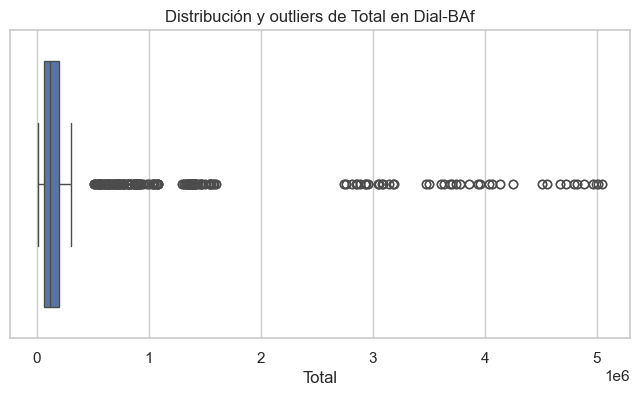

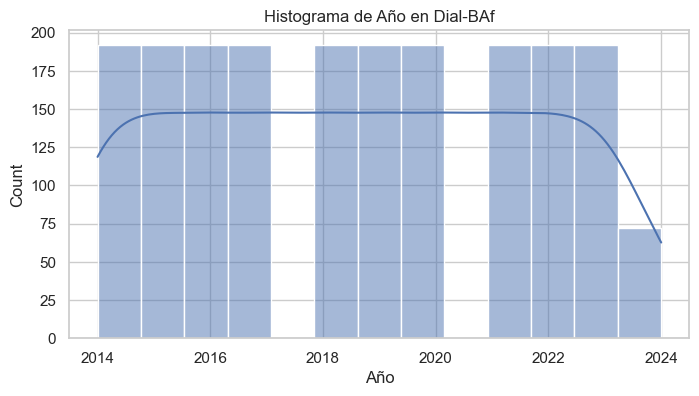

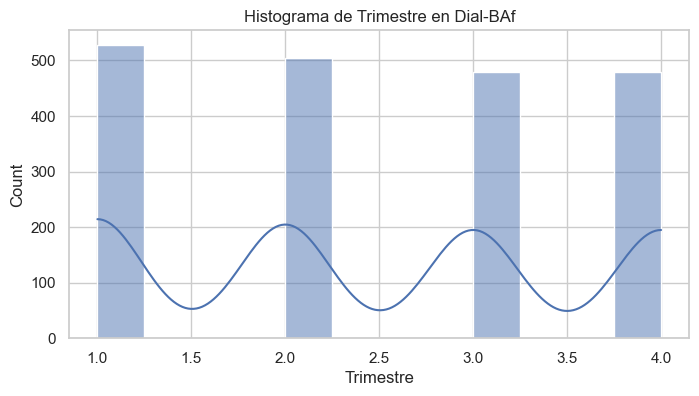

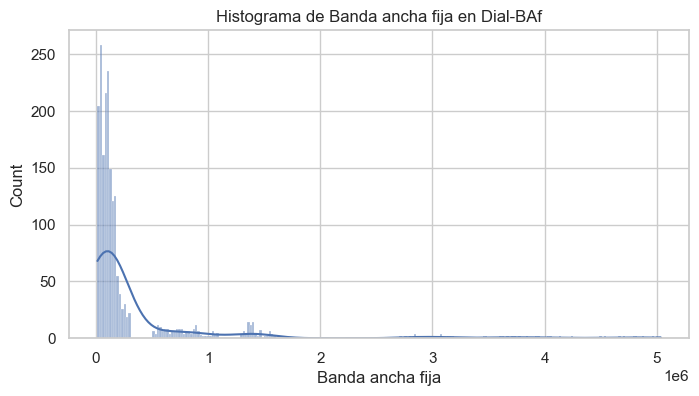

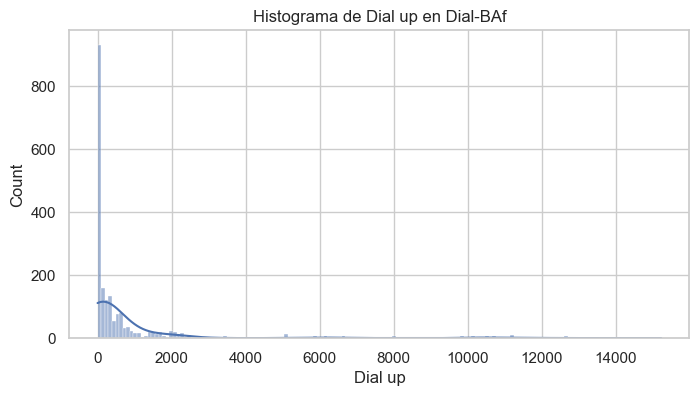

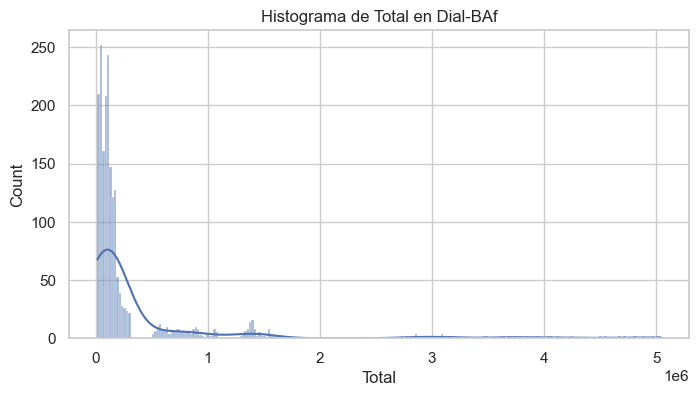


--- Análisis de la hoja: Totales Dial-BAf ---
Primeras filas:


Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2024          2          11544314    11793  11556107   Abr-Jun 2024
1  2024          1          11621363    11793  11633156   Ene-Mar 2024
2  2023          4          11535868    11793  11547661   Oct-Dic 2023
3  2023          3          11395115    11793  11406908  Jul-Sept 2023
4  2023          2          11239781    12116  11251897   Abr-Jun 2023


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               42 non-null     int64 
 1   Trimestre         42 non-null     int64 
 2   Banda ancha fija  42 non-null     int64 
 3   Dial up           42 non-null     int64 
 4   Total             42 non-null     int64 
 5   Periodo           42 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


None


Estadísticas descriptivas:


Año  Trimestre  Banda ancha fija       Dial up         Total
count    42.000000  42.000000      4.200000e+01     42.000000  4.200000e+01
mean   2018.761905   2.452381      8.794433e+06  21490.190476  8.815923e+06
std       3.074756   1.130560      1.742229e+06  10136.781243  1.733189e+06
min    2014.000000   1.000000      6.362108e+06   9991.000000  6.398398e+06
25%    2016.000000   1.250000      7.189537e+06  11793.000000  7.218131e+06
50%    2019.000000   2.000000      8.704688e+06  21802.500000  8.720658e+06
75%    2021.000000   3.000000      1.037650e+07  28593.750000  1.038873e+07
max    2024.000000   4.000000      1.162136e+07  39324.000000  1.163316e+07


Valores faltantes por columna:


Series([], dtype: int64)

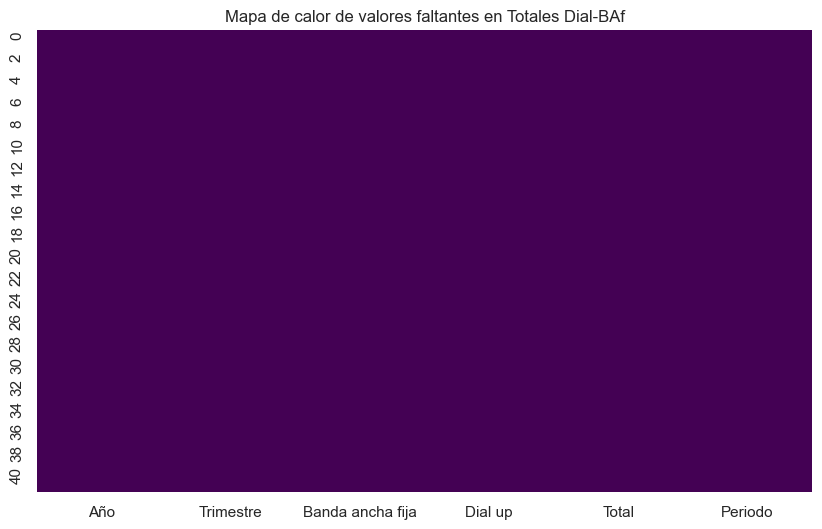

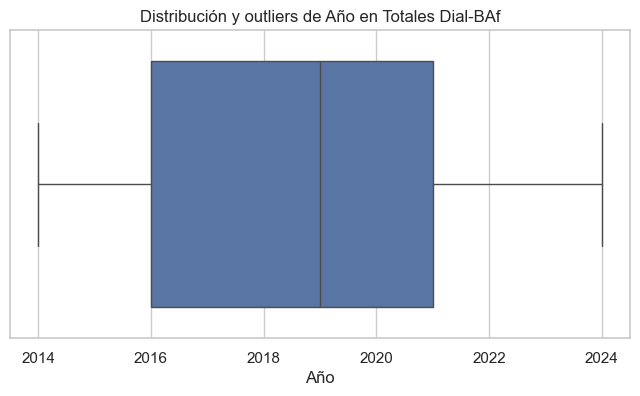

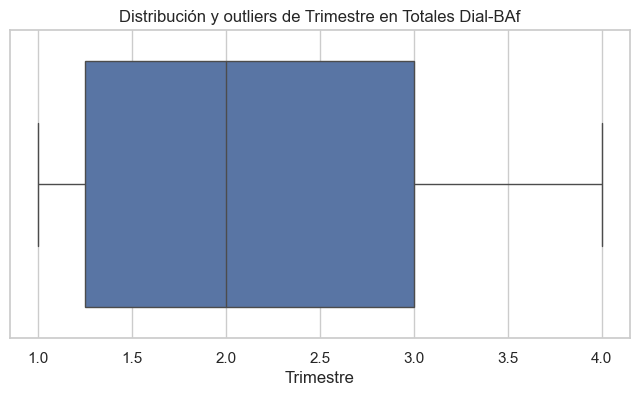

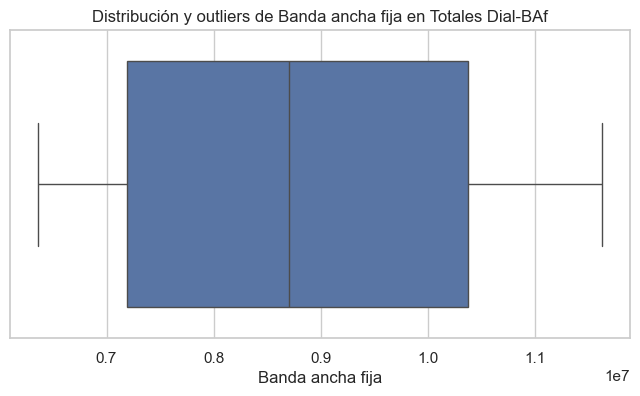

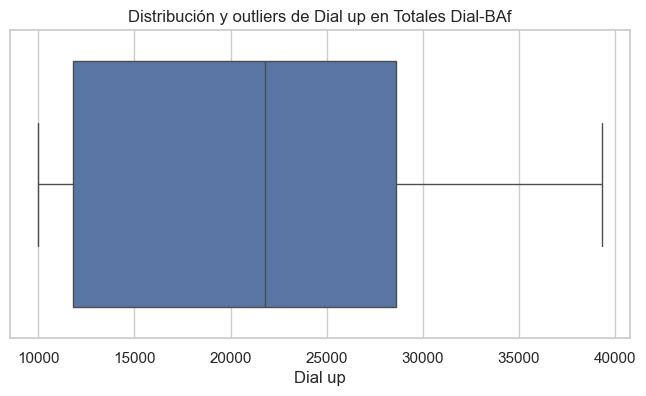

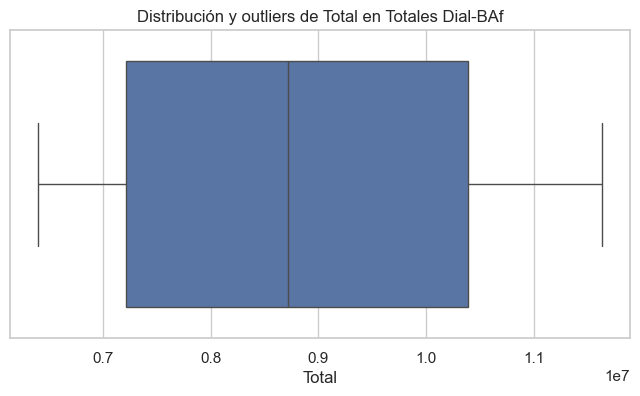

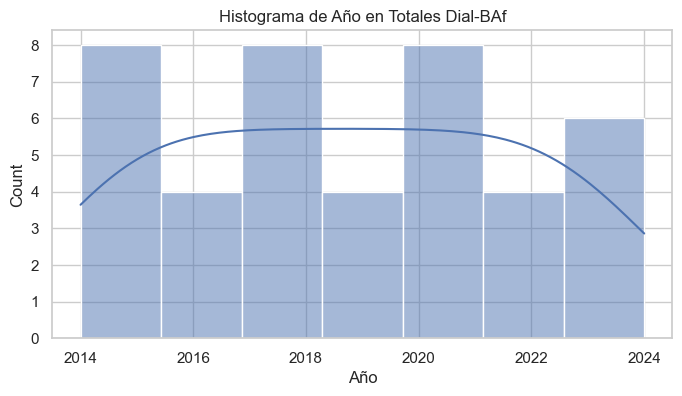

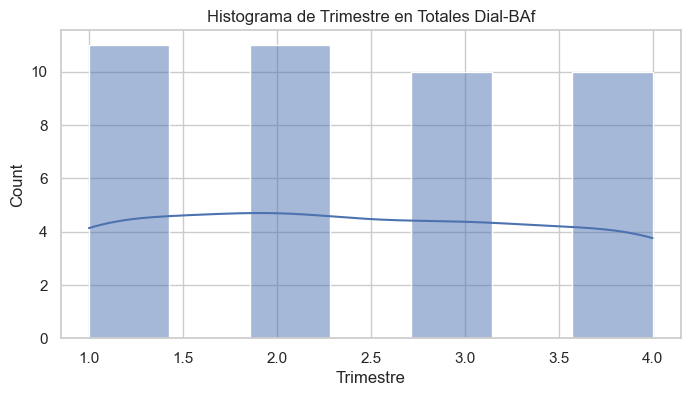

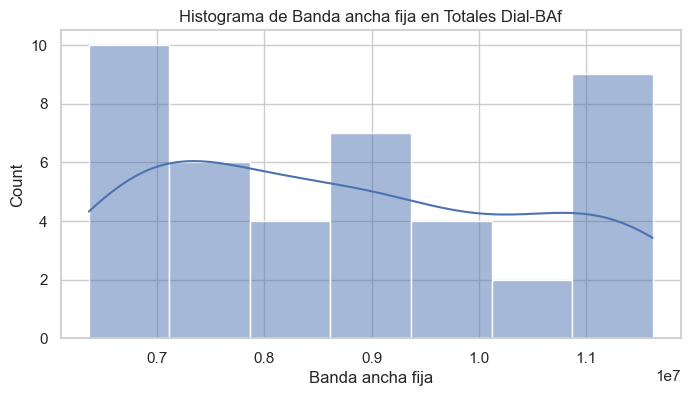

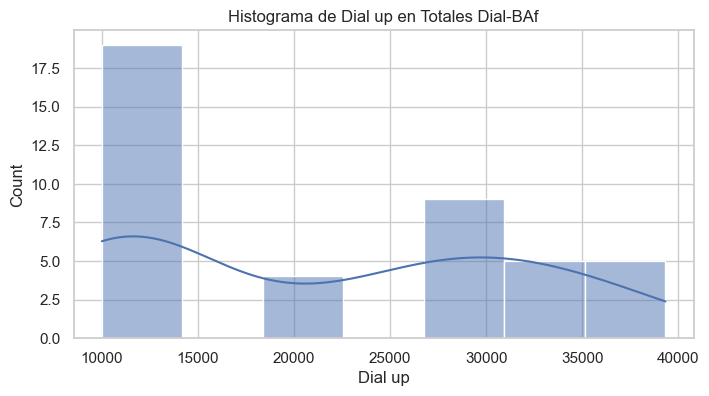

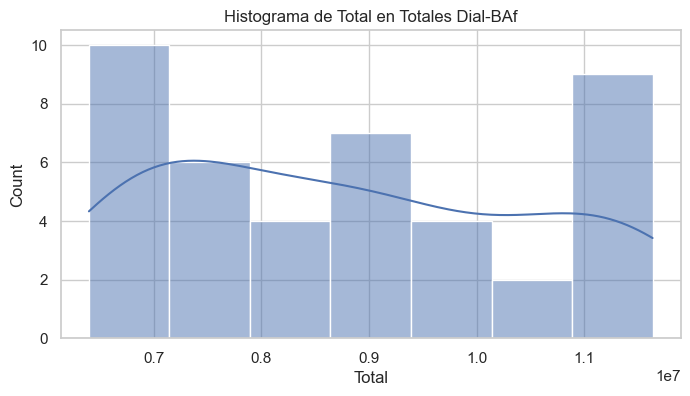


--- Análisis de la hoja: Ingresos  ---
Primeras filas:


Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          2               4.420322e+08   Abr-Jun 2024
1  2024          1               3.461990e+08   Ene-Mar 2024
2  2023          4               1.673760e+08   Oct-Dic 2023
3  2023          3               1.331066e+08  Jul-Sept 2023
4  2023          2               1.180603e+08   Jun-Mar 2023


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


None


Estadísticas descriptivas:


Año  Trimestre  Ingresos (miles de pesos)
count    42.000000  42.000000               4.200000e+01
mean   2019.000000   2.452381               5.001648e+07
std       3.728597   1.130560               8.710208e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.250000               7.055326e+06
50%    2019.000000   2.000000               2.047527e+07
75%    2021.000000   3.000000               4.485090e+07
max    2033.000000   4.000000               4.420322e+08


Valores faltantes por columna:


Series([], dtype: int64)

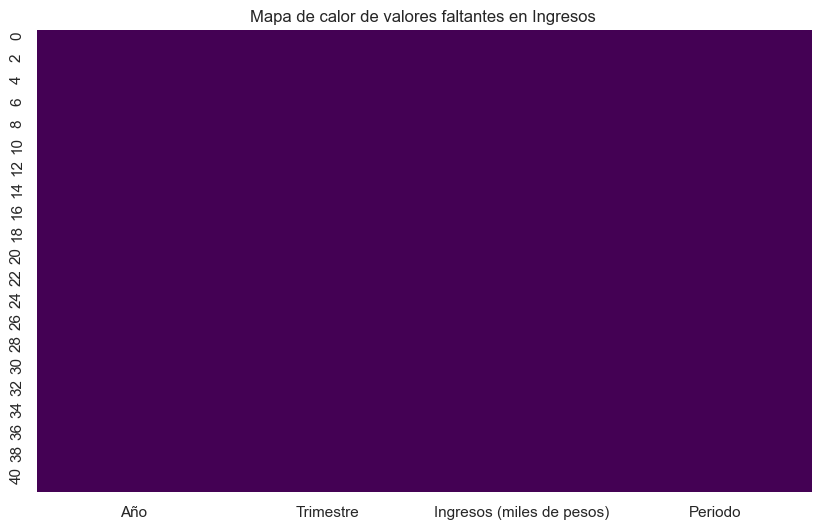

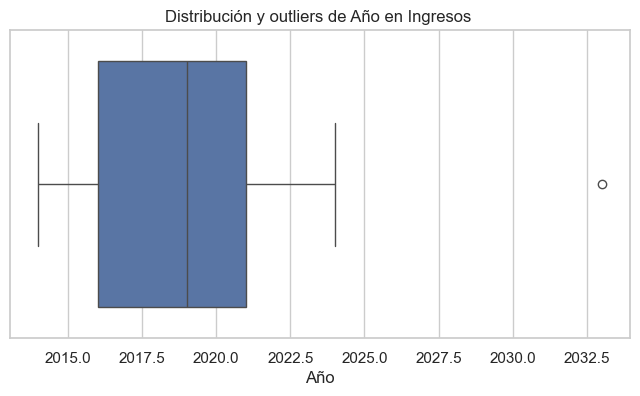

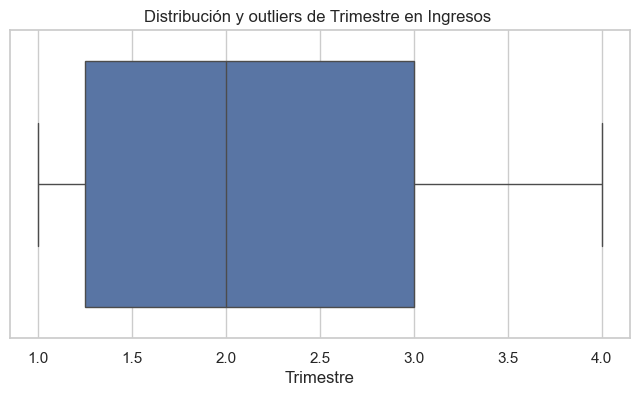

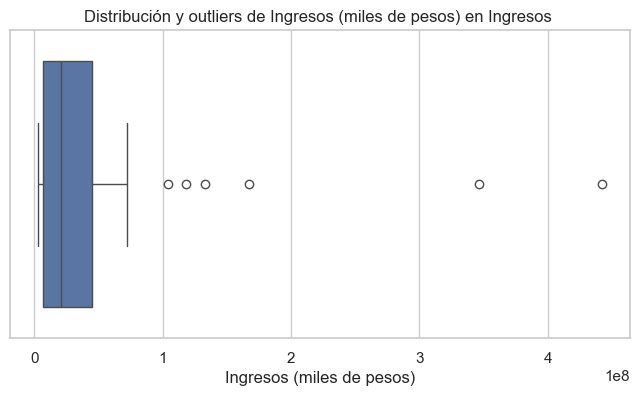

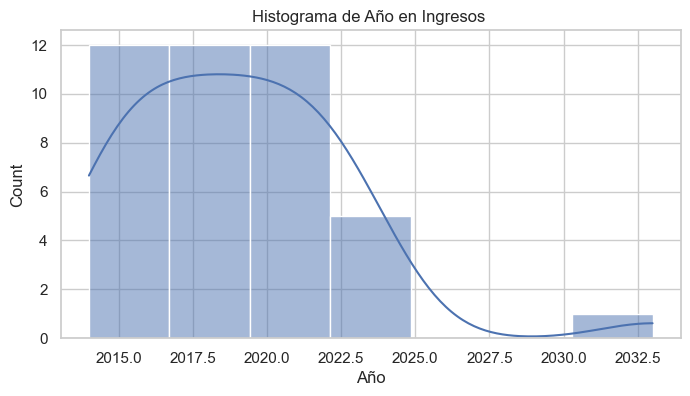

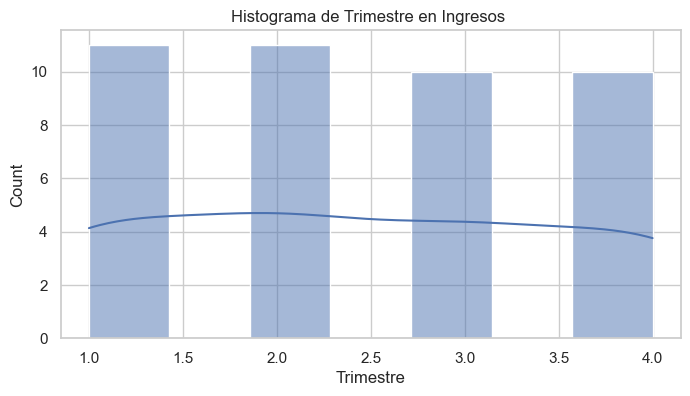

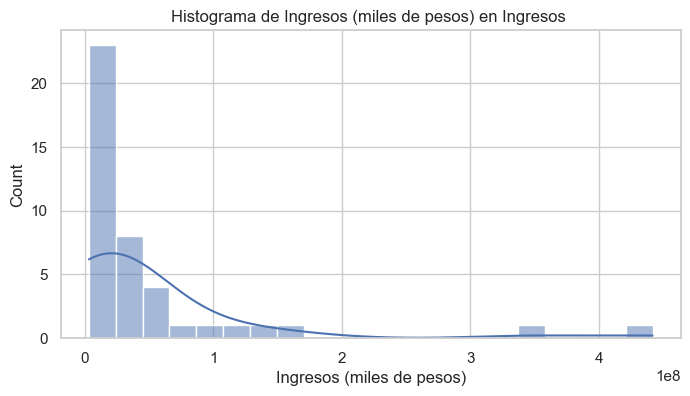

In [ ]:
# Cargar y analizar cada hoja del archivo
excel_path = 'data/Internet.xlsx'  # Cambia la ruta a la de tu archivo
excel_data = pd.ExcelFile(excel_path)

# Iterar sobre cada hoja y realizar un análisis inicial
for sheet_name in excel_data.sheet_names:
    print(f"\n--- Análisis de la hoja: {sheet_name} ---")
    
    # Cargar la hoja
    df_sheet = pd.read_excel(excel_data, sheet_name=sheet_name)
    
    # Exploración inicial
    print("Primeras filas:")
    display(df_sheet.head())
    
    print("\nInformación del dataset:")
    display(df_sheet.info())
    
    print("\nEstadísticas descriptivas:")
    display(df_sheet.describe())
    
    # Valores faltantes
    print("\nValores faltantes por columna:")
    missing_values = df_sheet.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    display(missing_values)
    
    # Visualización de valores nulos
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_sheet.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Mapa de calor de valores faltantes en {sheet_name}")
    plt.show()

    # Outliers y distribuciones: puede ser útil si hay columnas numéricas
    num_columns = df_sheet.select_dtypes(include=['float64', 'int64']).columns
    
    for column in num_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df_sheet, x=column)
        plt.title(f'Distribución y outliers de {column} en {sheet_name}')
        plt.show()
    
    for column in num_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df_sheet, x=column, kde=True)
        plt.title(f'Histograma de {column} en {sheet_name}')
        plt.show()